In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    RobustScaler,
    StandardScaler
)
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_validate,
    cross_val_predict
)
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance

from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score
)

from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks

In [43]:
# Read the excel dataset
df = pd.read_excel('gallstone_data.xlsx', sheet_name='Sheet1')
df

Gallstone Status  Age  Gender  Comorbidity  \
0                   0   50       0            0   
1                   0   47       0            1   
2                   0   61       0            0   
3                   0   41       0            0   
4                   0   42       0            0   
..                ...  ...     ...          ...   
314                 1   49       0            0   
315                 1   31       1            0   
316                 1   58       0            0   
317                 1   37       1            0   
318                 1   60       1            0   

     Coronary Artery Disease (CAD)  Hypothyroidism  Hyperlipidemia  \
0                                0               0               0   
1                                0               0               0   
2                                0               0               0   
3                                0               0               0   
4                                0               0               0   
..                             ...             ...             ...   
314                              0               0               0   
315                              0               0               0   
316                              0               0               0   
317                              0               0               0   
318                              0               0               0   

     Diabetes Mellitus (DM)  Height  Weight  ...  \
0                         0     185    92.8  ...   
1                         0     176    94.5  ...   
2                         0     171    91.1  ...   
3                         0     168    67.7  ...   
4                         0     178    89.6  ...   
..                      ...     ...     ...  ...   
314                       0     178    88.8  ...   
315                       0     157    53.4  ...   
316                       0     172    96.6  ...   
317                       0     177    88.4  ...   
318                       0     154    63.5  ...   

     High Density Lipoprotein (HDL)  Triglyceride  \
0                              40.0         134.0   
1                              43.0         103.0   
2                              43.0          69.0   
3                              59.0          53.0   
4                              30.0         326.0   
..                              ...           ...   
314                            55.0          81.0   
315                            58.0          64.0   
316                            45.0         168.0   
317                            33.0         253.0   
318                           273.0          19.0   

     Aspartat Aminotransferaz (AST)  Alanin Aminotransferaz (ALT)  \
0                              20.0                          22.0   
1                              14.0                          13.0   
2                              18.0                          14.0   
3                              20.0                          12.0   
4                              27.0                          54.0   
..                              ...                           ...   
314                            28.0                          50.0   
315                            24.0                          16.0   
316                            21.0                          27.0   
317                            40.0                          22.0   
318                            25.0                          73.0   

     Alkaline Phosphatase (ALP)  Creatinine  Glomerular Filtration Rate (GFR)  \
0                          87.0        0.82                            112.47   
1                          46.0        0.87                            107.10   
2                          66.0        1.25                             65.51   
3                          34.0        1.02                             94.10   
4                          71.0        0.82            

Gallstone Status Dataframe Exploration:

### Target Value description:
- Gallstone status : If the patient has a status of 0, that means no gallstone was found otherwise if 1, he has gallstone
### Categorial attributes: 
- Gender
- Comorbidity
- Coronary Artery Disease (CAD)
- Hypothyroidism
- Hyperlipidemia
- Diabetes Mellitus (DM)
- Hepatic Fat Accumulation (HFA)
### Numerical attributes:
- Age
- Height
- Weight
- Body Mass Index (BMI)
- Total Body Water (TBW)
- Extracellular Water (ECW)
- Intracellular Water (ICW)
- Extracellular Fluid/Total Body Water (ECF/TBW)
- Total Body Fat Ratio (TBFR) (%)
- Lean Mass (LM) (%)
- Body Protein Content (Protein) (%)
- Visceral Fat Rating (VFR)
- Bone Mass (BM)
- Muscle Mass (MM)
- Obesity (%)
- Total Fat Content (TFC)
- Visceral Fat Area (VFA)
- Visceral Muscle Area (VMA) (Kg)
- Glucose
- Total Cholesterol (TC)
- Low Density Lipoprotein (LDL)
- High Density Lipoprotein (HDL)
- Triglyceride
- Aspartat Aminotransferaz (AST)
- Alanin Aminotransferaz (ALT)
- Alkaline Phosphatase (ALP)
- Creatinine
- Glomerular Filtration Rate (GFR)
- C-Reactive Protein (CRP)
- Hemoglobin (HGB)
- Vitamin D

You can find more information about this dataset [**here**](https://archive.ics.uci.edu/dataset/1150/gallstone-1)

Splitting the Data:

In [44]:
#Splitting the columns
#Categories:
df_cat = df[[col for col in df.columns
             if col != "Gallstone Status"
             and pd.api.types.is_numeric_dtype(df[col])
             and df[col].nunique(dropna=True) <= 10]]

#Continious:
df_cont = df[[col for col in df.columns
              if col not in df_cat.columns
              and col != "Gallstone Status"
              and pd.api.types.is_numeric_dtype(df[col])]]

# Show results
print("Categorical columns:", list(df_cat.columns))
print("Continuous columns:", list(df_cont.columns))


Categorical columns: ['Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Hepatic Fat Accumulation (HFA)']
Continuous columns: ['Age', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']


In [45]:
# Missing value check
print("NA in Gallstone Status:", df["Gallstone Status"].isna().sum())
print("Total NA:", df.isna().sum().sum())

# Target Classe balance
print(df["Gallstone Status"].value_counts(dropna=False))


NA in Gallstone Status: 0
Total NA: 0
Gallstone Status
0    161
1    158
Name: count, dtype: int64


Summary of numerical features:

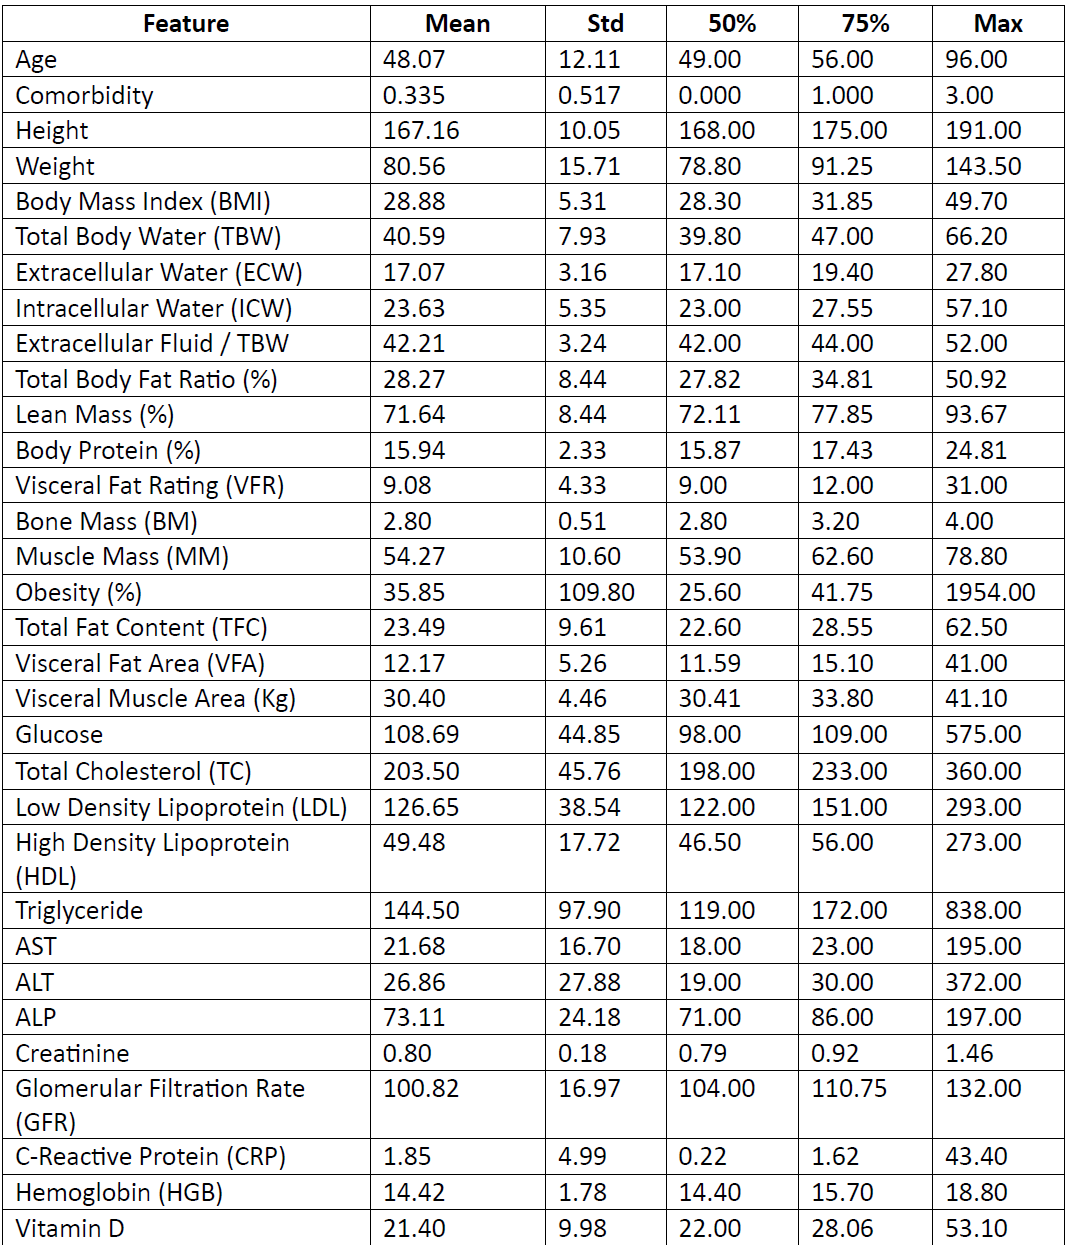

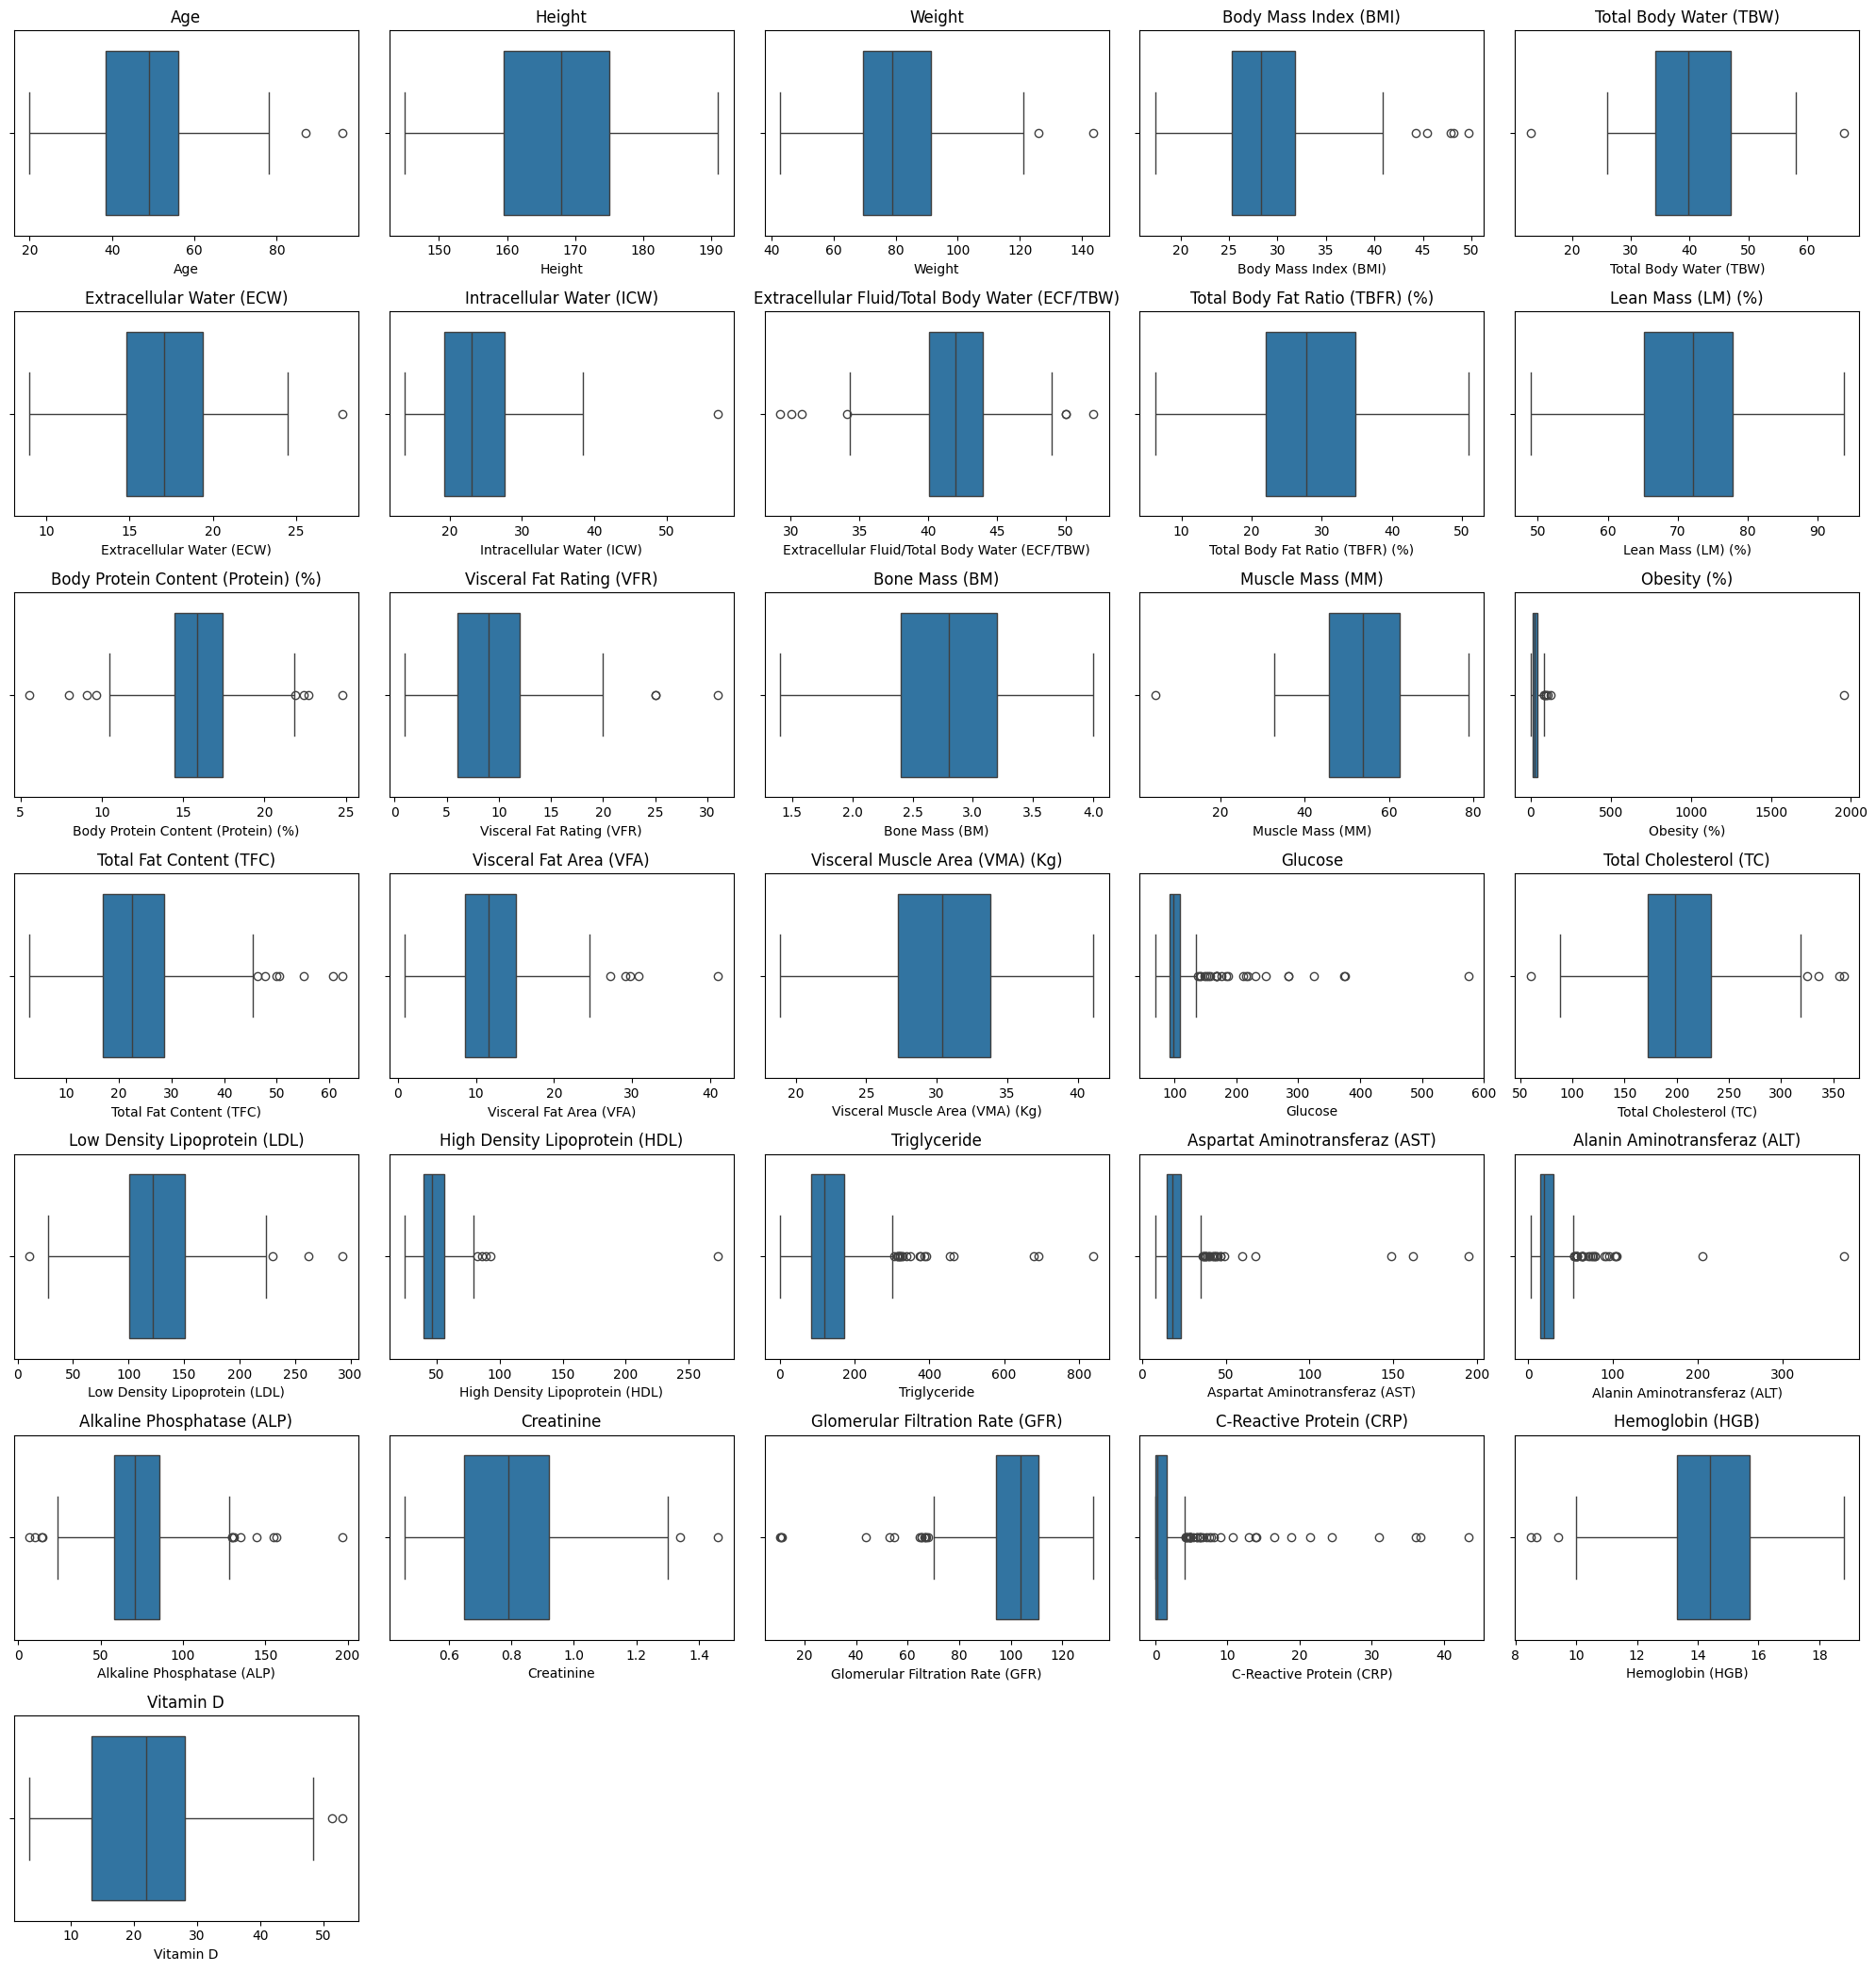

In [46]:
cols = df_cont.columns  # or df_cont.columns if you want only continuous
n = len(cols)
rows = math.ceil(n/5)

plt.figure(figsize=(20, rows*3))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 5, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

Correlation Matrices:

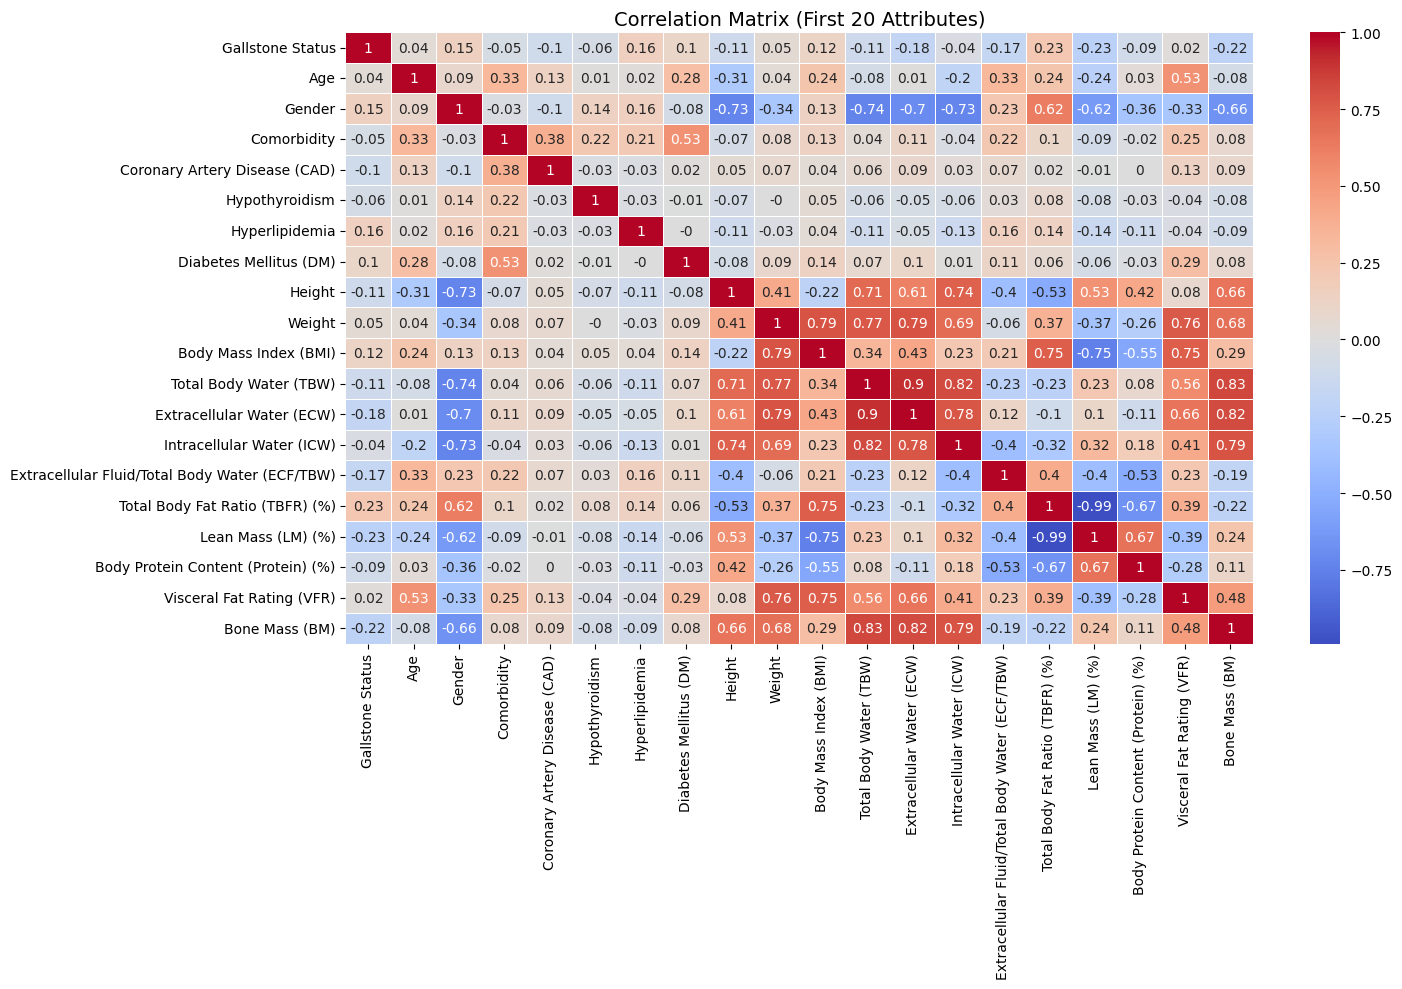

In [47]:
# Correlation matrix for the first 20 attributes
corr_mat = df.iloc[:, :20].corr().round(2)
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix (First 20 Attributes)", fontsize=14)
plt.tight_layout()
plt.show()

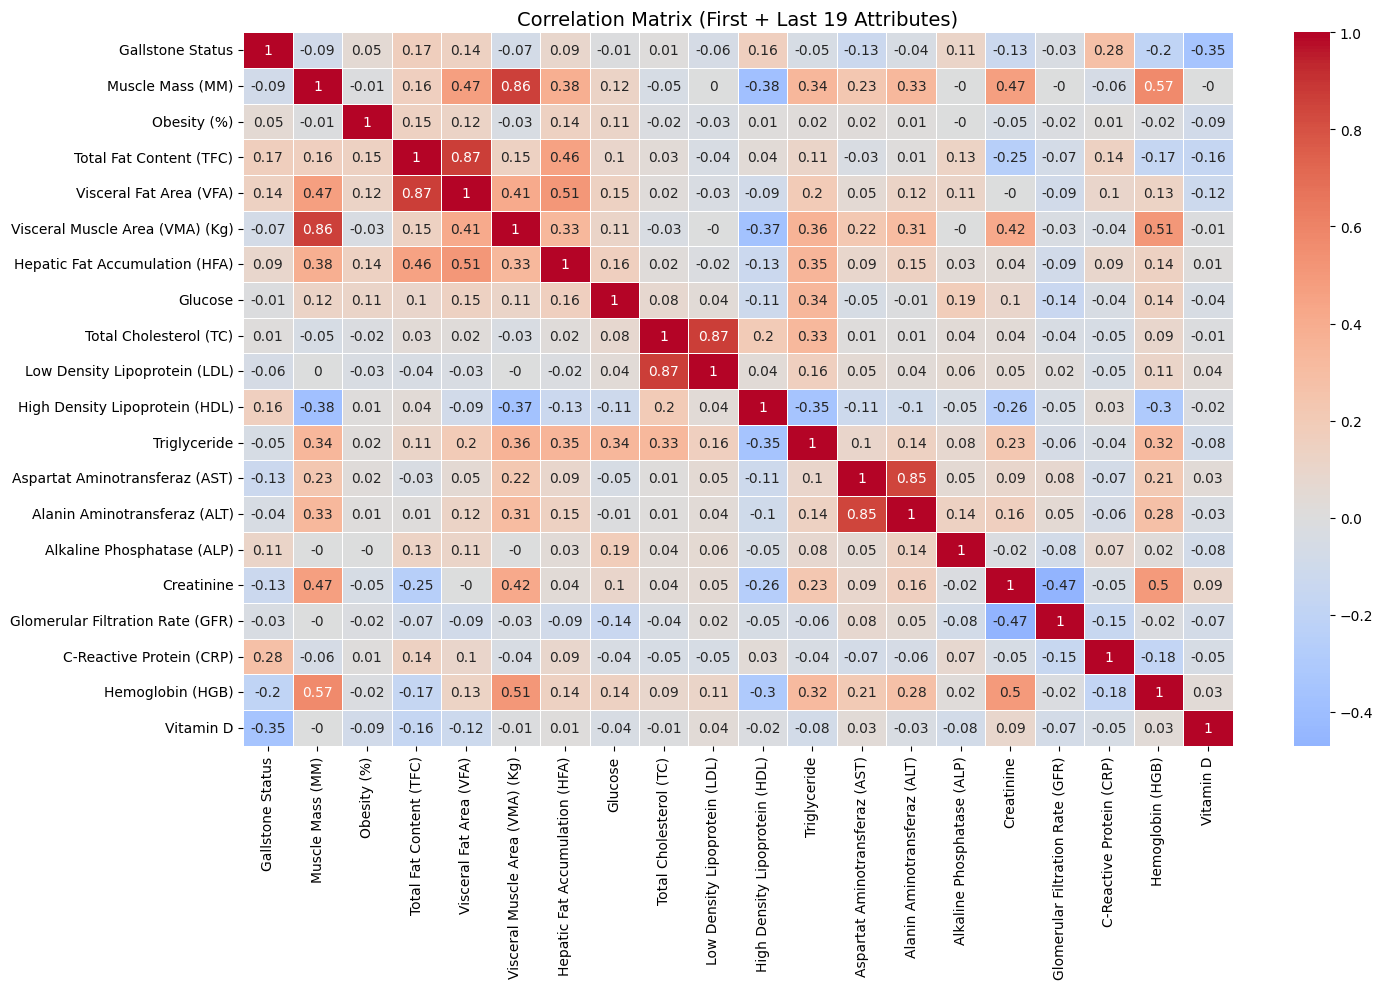

In [48]:
cols_to_use = df.columns[[0] + list(range(20, df.shape[1]))]
corr_mat = df[cols_to_use].corr().round(2)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix (First + Last 19 Attributes)", fontsize=14)
plt.tight_layout()
plt.show()

In [49]:
#HIGHLIGHTING THE IMPORTANT FEATURES ACCORDING TO HEATMAP GRAPHS
continuous = ["C-Reactive Protein (CRP)", "Alkaline Phosphatase (ALP)", "High Density Lipoprotein (HDL)", "Visceral Fat Area (VFA)", "Total Body Fat Ratio (TBFR) (%)"] #TFC and BMI althought high are redundant concepts
categorical = ["Hepatic Fat Accumulation (HFA)", "Hyperlipidemia", "Gender"]

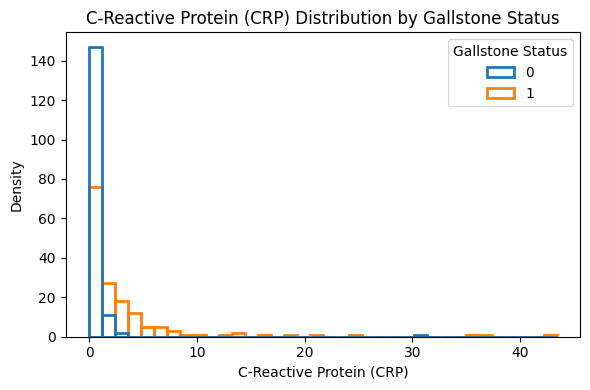

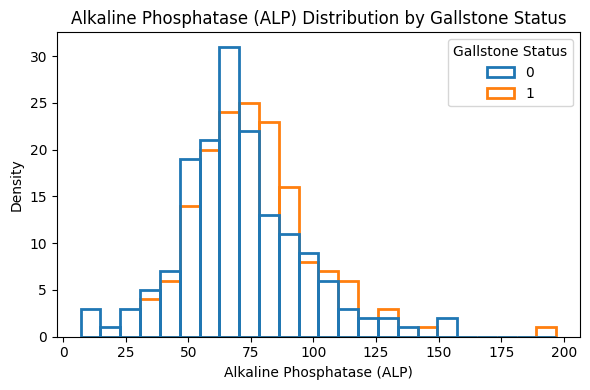

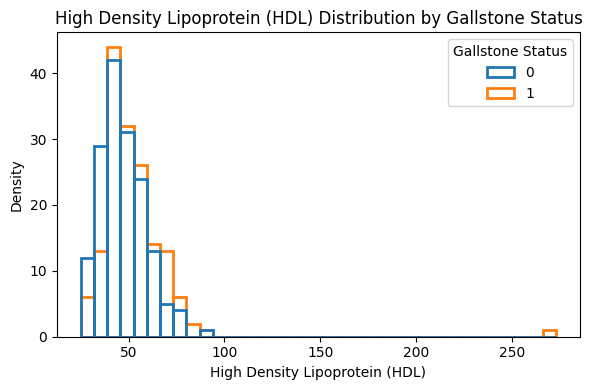

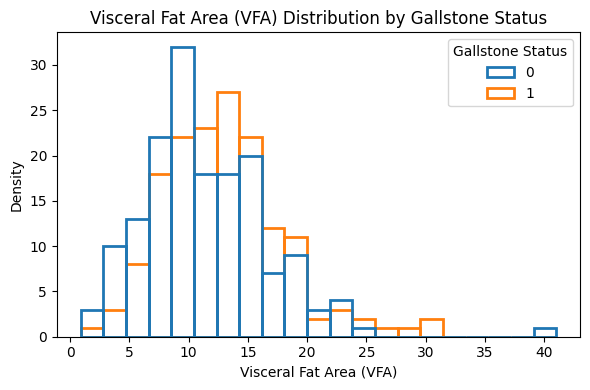

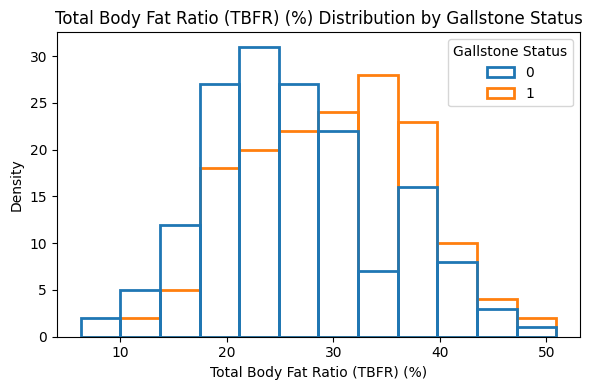

In [50]:
# ---------------------------
# HISTOGRAMS (continuous)
# ---------------------------
for col in continuous:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="Gallstone Status", fill=False, linewidth=2)
    plt.title(f"{col} Distribution by Gallstone Status")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

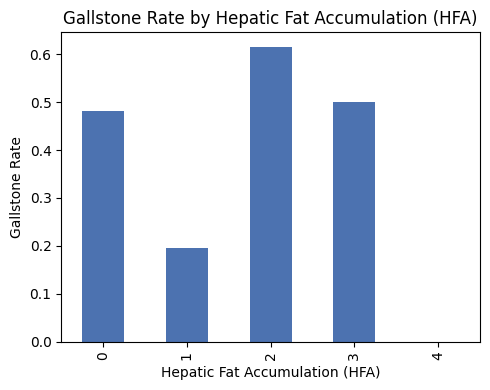

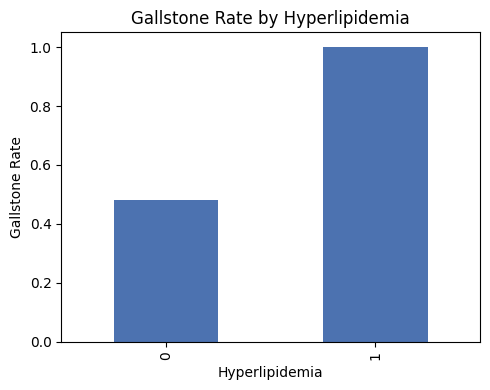

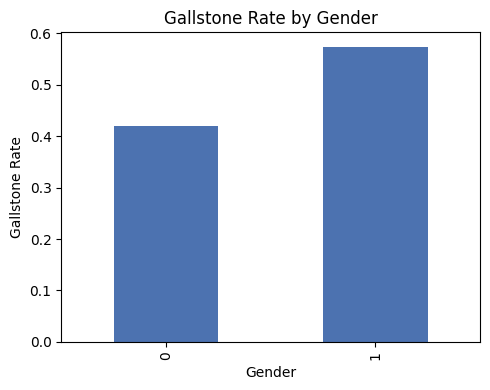

In [51]:
# ---------------------------
# BAR GRAPHS (categorical)
# ---------------------------
for col in categorical:
    plt.figure(figsize=(5,4))
    df.groupby(col)["Gallstone Status"].mean().plot(kind="bar", color=["#4C72B0"])
    plt.title(f"Gallstone Rate by {col}")
    plt.ylabel("Gallstone Rate")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

END OF DATA EXPLORATION

In [52]:
# STEP 2: PREPROCESSING - HANDLE MISSING VALUES

print("\n" + "="*80)
print("STEP 2: HANDLING MISSING VALUES")
print("="*80)

# Define categorical and numerical columns
categorical_cols = [
    'Gender',
    'Comorbidity',
    'Coronary Artery Disease (CAD)',
    'Hypothyroidism',
    'Hyperlipidemia',
    'Diabetes Mellitus (DM)',
    'Hepatic Fat Accumulation (HFA)'
]

numerical_cols = [col for col in df.columns
                  if col not in categorical_cols + ['Gallstone Status']]

print(f"\nCategorical columns: {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

# Create a copy for preprocessing
df_processed = df.copy()

# Handle categorical missing values (mode imputation)
for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        mode_value = df_processed[col].mode()[0]
        df_processed[col].fillna(mode_value, inplace=True)
        print(f"Imputed {col} with mode: {mode_value}")

# Handle numerical missing values (KNN imputation - better for correlated features)
if df_processed[numerical_cols].isnull().sum().sum() > 0:
    print("\nApplying KNN imputation for numerical features...")
    knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
    df_processed[numerical_cols] = knn_imputer.fit_transform(df_processed[numerical_cols])
    print("KNN imputation completed.")

# Verify no missing values remain
print(f"\nRemaining missing values: {df_processed.isnull().sum().sum()}")

# Remove outlier in the dataset from incorrect data entry - Replace patient obesity in Excel row 241 with mean value
# Print obesity value before replacement
print(f"Obesity value at row 239 before replacement: {df_processed.at[239, 'Obesity (%)']}")
mean_obesity = df_processed['Obesity (%)'].mean()
df_processed.at[239, 'Obesity (%)'] = mean_obesity

# Remove outlier in the dataset from incorrect data entry - Replace patient HDL in Excel row 320 with mean value
# Print HDL value before replacement
print(f"HDL value at row 318 before replacement: {df_processed.at[318, 'High Density Lipoprotein (HDL)']}")
mean_hdl = df_processed['High Density Lipoprotein (HDL)'].mean()
df_processed.at[318, 'High Density Lipoprotein (HDL)'] = mean_hdl


STEP 2: HANDLING MISSING VALUES

Categorical columns: ['Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Hepatic Fat Accumulation (HFA)']

Numerical columns (31): ['Age', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)'

In [53]:
# STEP 3: ENCODE CATEGORICAL VARIABLES


print("\n" + "="*80)
print("STEP 3: ENCODING CATEGORICAL VARIABLES")
print("="*80)

# All categorical variables are binary, so we can use label encoding
le = LabelEncoder()
for col in categorical_cols:
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    print(f"Encoded {col}: {df_processed[col].unique()}")



STEP 3: ENCODING CATEGORICAL VARIABLES
Encoded Gender: [0 1]
Encoded Comorbidity: [0 1 3 2]
Encoded Coronary Artery Disease (CAD): [0 1]
Encoded Hypothyroidism: [0 1]
Encoded Hyperlipidemia: [0 1]
Encoded Diabetes Mellitus (DM): [0 1]
Encoded Hepatic Fat Accumulation (HFA): [0 1 2 3 4]



STEP 4: CORRELATION & MULTICOLLINEARITY ANALYSIS


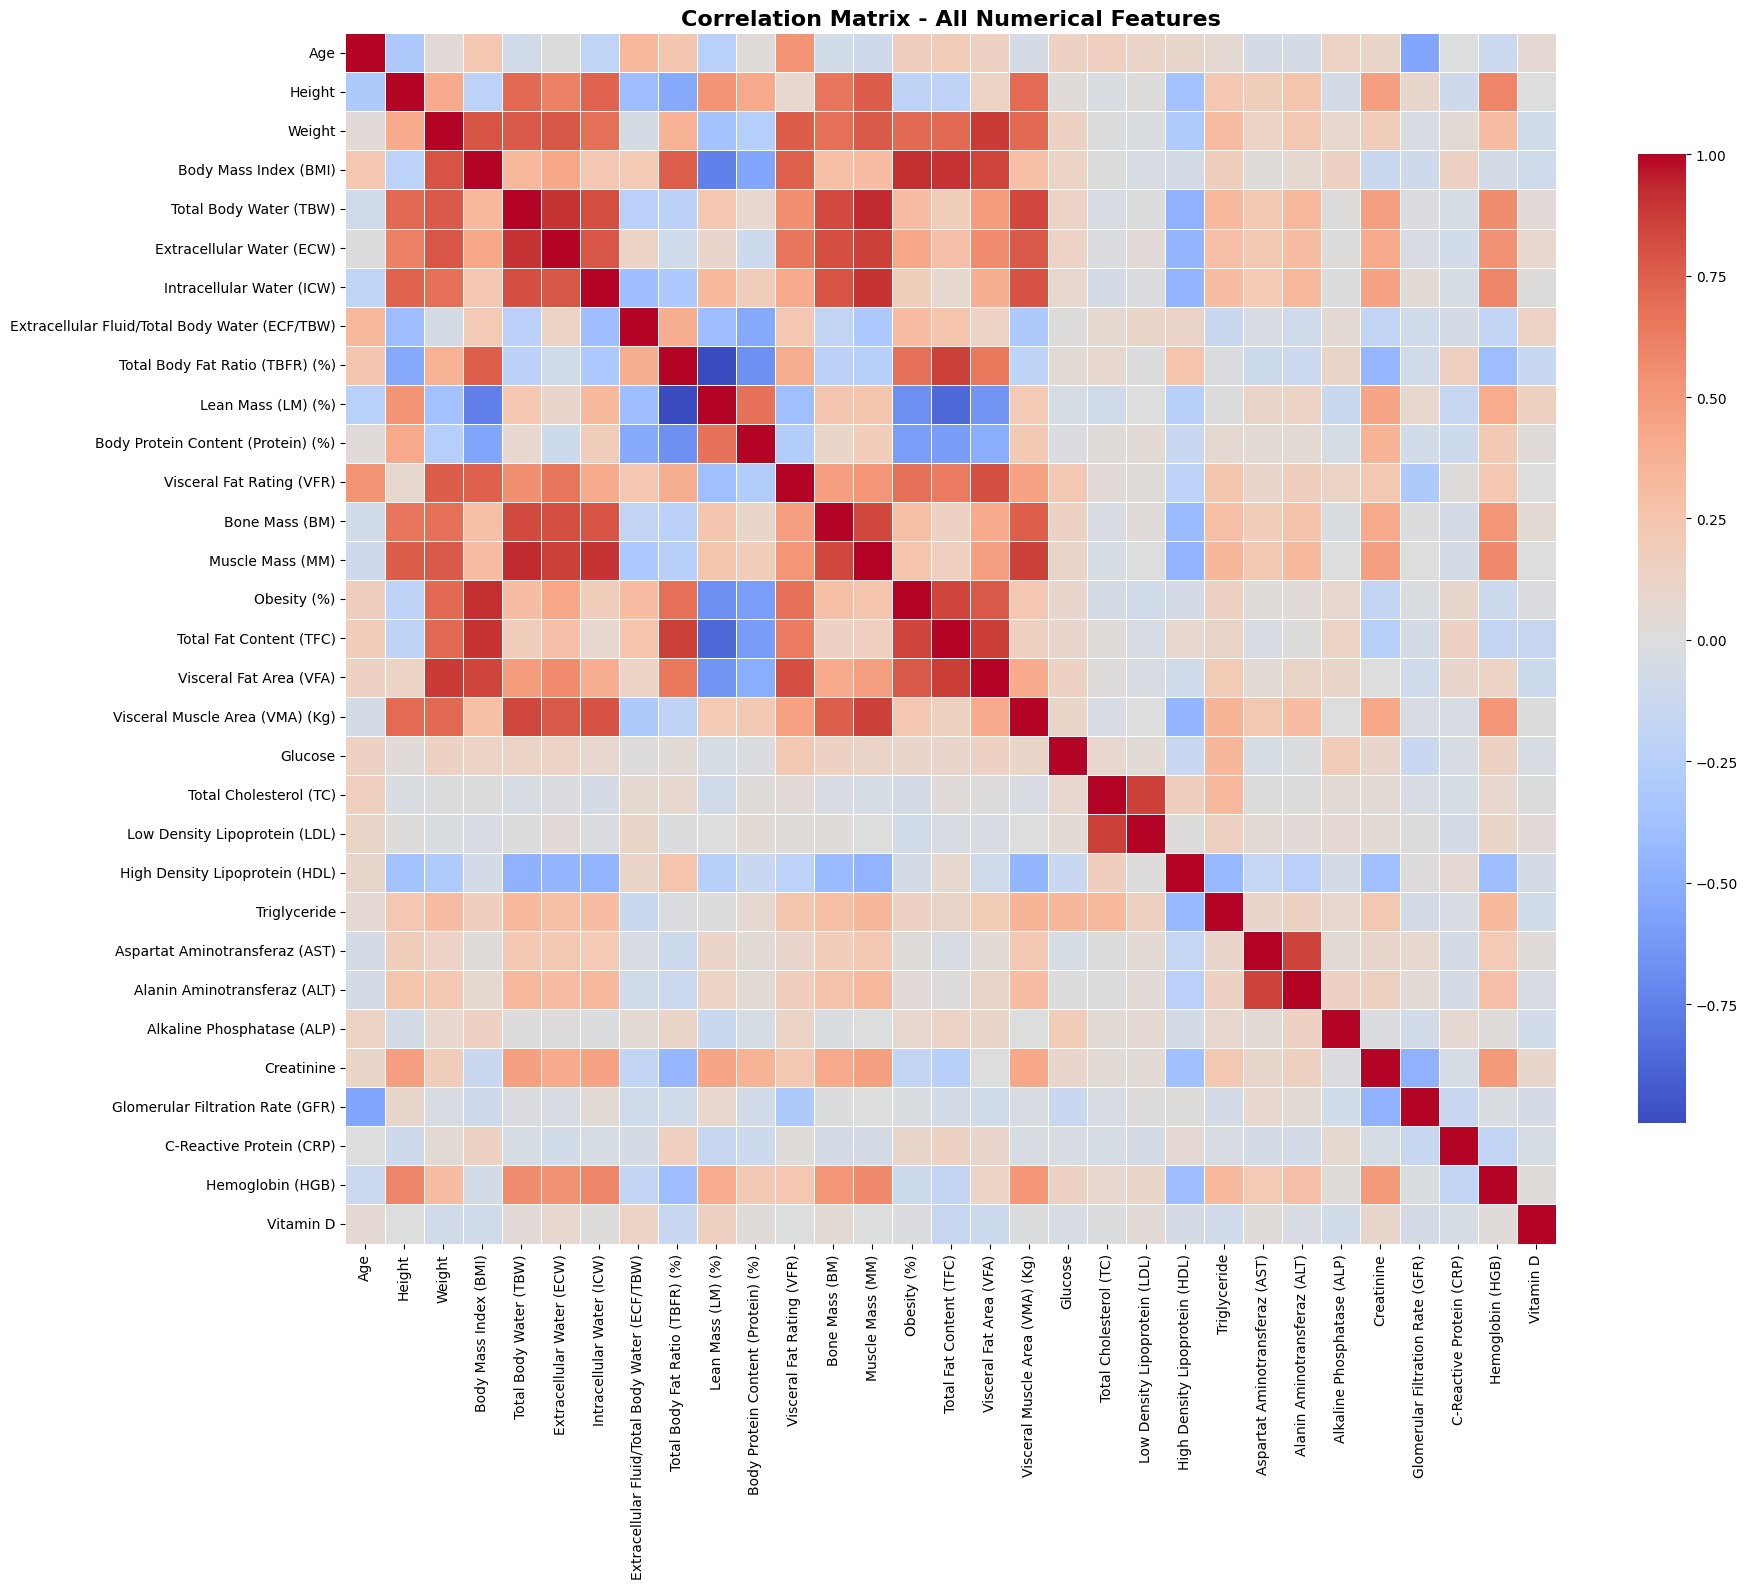


Highly Correlated Feature Pairs (|r| > 0.75):
                          Feature 1                        Feature 2  \
24  Total Body Fat Ratio (TBFR) (%)               Lean Mass (LM) (%)   
15           Total Body Water (TBW)                 Muscle Mass (MM)   
9             Body Mass Index (BMI)                      Obesity (%)   
12           Total Body Water (TBW)        Extracellular Water (ECW)   
22        Intracellular Water (ICW)                 Muscle Mass (MM)   
10            Body Mass Index (BMI)          Total Fat Content (TFC)   
6                            Weight          Visceral Fat Area (VFA)   
33          Total Fat Content (TFC)          Visceral Fat Area (VFA)   
25  Total Body Fat Ratio (TBFR) (%)          Total Fat Content (TFC)   
34           Total Cholesterol (TC)    Low Density Lipoprotein (LDL)   
19        Extracellular Water (ECW)                 Muscle Mass (MM)   
30                 Muscle Mass (MM)  Visceral Muscle Area (VMA) (Kg)   
26               

In [54]:
# STEP 4: CORRELATION & MULTICOLLINEARITY ANALYSIS

print("\n" + "="*80)
print("STEP 4: CORRELATION & MULTICOLLINEARITY ANALYSIS")
print("="*80)

# Compute correlation matrix for all numerical features
numerical_data = df_processed[numerical_cols]
correlation_matrix = numerical_data.corr()

# Visualize correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Matrix - All Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix_full.png', dpi=300, bbox_inches='tight')
plt.show()

# Find highly correlated pairs (|r| > 0.75)
print("\nHighly Correlated Feature Pairs (|r| > 0.75):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values(
    'Correlation',
    key=abs,
    ascending=False
)
print(high_corr_df)

# Identify multicollinearity groups (for interpretation)
print("\n" + "-"*80)
print("MULTICOLLINEARITY GROUPS IDENTIFIED:")
print("-"*80)

groups = {
    'Body Composition - Water': [
        'Total Body Water (TBW)',
        'Extracellular Water (ECW)',
        'Intracellular Water (ICW)',
        'Weight'
    ],
    'Body Composition - Fat/Obesity': [
        'Body Mass Index (BMI)',
        'Total Body Fat Ratio (TBFR) (%)',
        'Obesity (%)',
        'Total Fat Content (TFC)',
        'Visceral Fat Area (VFA)',
        'Weight'
    ],
    'Lean Mass Related': [
        'Lean Mass (LM) (%)',
        'Body Protein Content (Protein) (%)',
        'Muscle Mass (MM)',
        'Bone Mass (BM)'
    ],
    'Cholesterol/Lipids': [
        'Total Cholesterol (TC)',
        'Low Density Lipoprotein (LDL)'
    ],
    'Liver Enzymes': [
        'Aspartat Aminotransferaz (AST)',
        'Alanin Aminotransferaz (ALT)'
    ]
}

for group_name, features in groups.items():
    print(f"\n{group_name}:")
    existing = [f for f in features if f in correlation_matrix.columns]
    group_corr = correlation_matrix.loc[existing, existing]
    print(group_corr)

In [55]:
# STEP 5: FEATURE ENGINEERING


print("\n" + "="*80)
print("STEP 5: FEATURE ENGINEERING")
print("="*80)

df_engineered = df_processed.copy()

# 1. BMI Categories (WHO classification)
df_engineered['BMI_Category'] = pd.cut(
    df_engineered['Body Mass Index (BMI)'],
    bins=[0, 18.5, 25, 30, 100],
    labels=[0, 1, 2, 3]
).astype(int)
print("Created: BMI_Category (0=underweight, 1=normal, 2=overweight, 3=obese)")

# 2. Lipid Ratios
df_engineered['TC_HDL_Ratio'] = df_engineered['Total Cholesterol (TC)'] / (
    df_engineered['High Density Lipoprotein (HDL)'] + 1e-5
)
df_engineered['TG_HDL_Ratio'] = df_engineered['Triglyceride'] / (
    df_engineered['High Density Lipoprotein (HDL)'] + 1e-5
)
df_engineered['LDL_HDL_Ratio'] = df_engineered['Low Density Lipoprotein (LDL)'] / (
    df_engineered['High Density Lipoprotein (HDL)'] + 1e-5
)
df_engineered['NonHDL_Cholesterol'] = (
    df_engineered['Total Cholesterol (TC)'] -
    df_engineered['High Density Lipoprotein (HDL)']
)
print("Created: TC/HDL, TG/HDL, LDL/HDL ratios, Non-HDL cholesterol")

# 3. Liver Function Markers
df_engineered['AST_ALT_Ratio'] = df_engineered['Aspartat Aminotransferaz (AST)'] / (
    df_engineered['Alanin Aminotransferaz (ALT)'] + 1e-5
)
df_engineered['Liver_Enzyme_Sum'] = (
    df_engineered['Aspartat Aminotransferaz (AST)'] +
    df_engineered['Alanin Aminotransferaz (ALT)']
)
print("Created: AST/ALT ratio (De Ritis), Liver enzyme sum")

# 4. Metabolic Syndrome Indicators
df_engineered['High_TG'] = (df_engineered['Triglyceride'] > 150).astype(int)

df_engineered['Low_HDL'] = (
    ((df_engineered['Gender'] == 1) & (df_engineered['High Density Lipoprotein (HDL)'] < 40)) |
    ((df_engineered['Gender'] == 0) & (df_engineered['High Density Lipoprotein (HDL)'] < 50))
).astype(int)

df_engineered['High_Glucose'] = (df_engineered['Glucose'] > 100).astype(int)

df_engineered['MetS_Score'] = (
    df_engineered['High_TG'] +
    df_engineered['Low_HDL'] +
    df_engineered['High_Glucose']
)
print("Created: Metabolic Syndrome components and score")

# 5. Age-related interactions
df_engineered['Age_BMI_Interaction'] = (
    df_engineered['Age'] * df_engineered['Body Mass Index (BMI)']
)
df_engineered['Age_Diabetes'] = (
    df_engineered['Age'] * df_engineered['Diabetes Mellitus (DM)']
)
df_engineered['Age_VFA'] = (
    df_engineered['Age'] * df_engineered['Visceral Fat Area (VFA)']
)
print("Created: Age × BMI, Age × Diabetes, Age × VFA interactions")

# 6. Visceral adiposity index (proxy)
df_engineered['VAI_Proxy'] = (
    df_engineered['Visceral Fat Area (VFA)'] * df_engineered['Triglyceride']
) / (df_engineered['High Density Lipoprotein (HDL)'] + 1e-5)
print("Created: Visceral Adiposity Index (proxy)")

# 7. Body composition ratios
df_engineered['ViscMuscle_Ratio'] = (
    df_engineered['Visceral Fat Area (VFA)'] /
    (df_engineered['Muscle Mass (MM)'] + 1e-5)
)
df_engineered['Fat_Muscle_Ratio'] = (
    df_engineered['Total Body Fat Ratio (TBFR) (%)'] /
    (df_engineered['Muscle Mass (MM)'] + 1e-5)
)
print("Created: Visceral fat/muscle ratio, Fat/muscle ratio")

# 8. Comorbidity burden
df_engineered['Comorbidity_Count'] = (
    df_engineered['Coronary Artery Disease (CAD)'] +
    df_engineered['Hypothyroidism'] +
    df_engineered['Hyperlipidemia'] +
    df_engineered['Diabetes Mellitus (DM)']
)
df_engineered['Obesity_Comorbidity'] = (
    df_engineered['BMI_Category'] * df_engineered['Comorbidity_Count']
)
print("Created: Comorbidity count, Obesity × Comorbidity interaction")

# 9. Inflammation marker
df_engineered['Inflam_Risk'] = (
    df_engineered['C-Reactive Protein (CRP)'] > 3
).astype(int)
print("Created: Inflammation risk (CRP > 3)")

# 10. Kidney function category
df_engineered['CKD_Stage'] = pd.cut(
    df_engineered['Glomerular Filtration Rate (GFR)'],
    bins=[0, 30, 60, 90, 200],
    labels=[3, 2, 1, 0]
).astype(int)
print("Created: CKD stage (based on GFR)")

print(f"\nTotal new features created: {len(df_engineered.columns) - len(df_processed.columns)}")
print(f"New feature names: {[col for col in df_engineered.columns if col not in df_processed.columns]}")



STEP 5: FEATURE ENGINEERING
Created: BMI_Category (0=underweight, 1=normal, 2=overweight, 3=obese)
Created: TC/HDL, TG/HDL, LDL/HDL ratios, Non-HDL cholesterol
Created: AST/ALT ratio (De Ritis), Liver enzyme sum
Created: Metabolic Syndrome components and score
Created: Age × BMI, Age × Diabetes, Age × VFA interactions
Created: Visceral Adiposity Index (proxy)
Created: Visceral fat/muscle ratio, Fat/muscle ratio
Created: Comorbidity count, Obesity × Comorbidity interaction
Created: Inflammation risk (CRP > 3)
Created: CKD stage (based on GFR)

Total new features created: 21
New feature names: ['BMI_Category', 'TC_HDL_Ratio', 'TG_HDL_Ratio', 'LDL_HDL_Ratio', 'NonHDL_Cholesterol', 'AST_ALT_Ratio', 'Liver_Enzyme_Sum', 'High_TG', 'Low_HDL', 'High_Glucose', 'MetS_Score', 'Age_BMI_Interaction', 'Age_Diabetes', 'Age_VFA', 'VAI_Proxy', 'ViscMuscle_Ratio', 'Fat_Muscle_Ratio', 'Comorbidity_Count', 'Obesity_Comorbidity', 'Inflam_Risk', 'CKD_Stage']


In [56]:

# MULTICOLLINEARITY TREATMENT STRATEGY


print("\n" + "="*80)
print("MULTICOLLINEARITY TREATMENT DECISIONS")
print("="*80)

features_to_drop = []

# Strategy 1: Body water features - Keep TBW, drop ECW and ICW (too correlated)
print("\n1. Body Water Features:")
print("   - KEEP: TBW (total body water - most comprehensive)")
print("   - KEEP: ECF/TBW (ratio provides unique information)")
print("   - DROP: ECW, ICW (redundant with TBW)")
features_to_drop.extend([
    'Extracellular Water (ECW)',
    'Intracellular Water (ICW)'
])

# Strategy 2: Obesity/Fat metrics - Create composite and drop redundant
print("\n2. Obesity & Fat Metrics:")
print("   - KEEP: BMI (standard clinical measure)")
print("   - KEEP: VFA (visceral fat - clinically important for gallstone)")
print("   - DROP: TBFR, Obesity, TFC (redundant with BMI and VFA)")
features_to_drop.extend([
    'Total Body Fat Ratio (TBFR) (%)',
    'Obesity (%)',
    'Total Fat Content (TFC)'
])

# Strategy 3: Lean mass - Keep muscle mass, drop others
print("\n3. Lean Mass Features:")
print("   - KEEP: MM (muscle mass)")
print("   - KEEP: Protein (distinct from muscle)")
print("   - DROP: LM, BM (redundant)")
features_to_drop.extend([
    'Lean Mass (LM) (%)',
    'Bone Mass (BM)'
])

# Strategy 4: Lipids - Keep individual components and create ratios
print("\n4. Lipid Profile:")
print("   - KEEP: TC, LDL, HDL, Triglyceride")
print("   - CREATE: TC/HDL ratio, TG/HDL ratio, LDL/HDL ratio")
print("   - Note: Will use regularization to handle remaining correlation")

# Strategy 5: Liver enzymes - Keep both but create ratio
print("\n5. Liver Enzymes:")
print("   - KEEP: AST, ALT")
print("   - CREATE: AST/ALT ratio (De Ritis ratio - clinically significant)")

print(f"\nTotal features to drop: {len(features_to_drop)}")
print(f"Features: {features_to_drop}")


#%% ============================================================================
# STEP 6: FINAL FEATURE SELECTION & PREPROCESSING PIPELINE
# ============================================================================

print("\n" + "="*80)
print("STEP 6: FINAL PREPROCESSING PIPELINE")
print("="*80)

# Drop multicollinear features
df_final = df_engineered.drop(columns=features_to_drop)
print(f"Dropped {len(features_to_drop)} multicollinear features")

# Separate features and target
X = df_final.drop(columns=['Gallstone Status'])
y = df_final['Gallstone Status']

# Split into train, validation, and test sets (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Splitting temp data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nFinal feature set shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Identify final categorical and numerical columns
final_categorical = [col for col in categorical_cols if col in X.columns] + [
    'BMI_Category',
    'CKD_Stage',
    'High_TG',
    'Low_HDL',
    'High_Glucose',
    'Inflam_Risk'
]

final_numerical = [col for col in X.columns if col not in final_categorical]

print(f"\nFinal categorical features ({len(final_categorical)}): {final_categorical}")
print(f"\nFinal numerical features ({len(final_numerical)}): {len(final_numerical)}")

from sklearn.preprocessing import RobustScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), final_numerical),  # robust to outliers
        ('cat', 'passthrough', final_categorical)  # already 0/1 encoded
    ]
)

X_processed = preprocessor.fit_transform(X_train)
feature_names = final_numerical + final_categorical

print(f"\nPreprocessed data shape: {X_processed.shape}")
print("Preprocessing pipeline created successfully!")

# Print the # of times each class label occurs in y_train
print("\nClass distribution in y_train:")
print(y_train.value_counts())


# Print the # of times each class label occurs in y_test
print("\nClass distribution in y_test:")
print(y_test.value_counts())

# Print the # of times each class label occurs in y_val
print("\nClass distribution in y_val:")
print(y_val.value_counts())


MULTICOLLINEARITY TREATMENT DECISIONS

1. Body Water Features:
   - KEEP: TBW (total body water - most comprehensive)
   - KEEP: ECF/TBW (ratio provides unique information)
   - DROP: ECW, ICW (redundant with TBW)

2. Obesity & Fat Metrics:
   - KEEP: BMI (standard clinical measure)
   - KEEP: VFA (visceral fat - clinically important for gallstone)
   - DROP: TBFR, Obesity, TFC (redundant with BMI and VFA)

3. Lean Mass Features:
   - KEEP: MM (muscle mass)
   - KEEP: Protein (distinct from muscle)
   - DROP: LM, BM (redundant)

4. Lipid Profile:
   - KEEP: TC, LDL, HDL, Triglyceride
   - CREATE: TC/HDL ratio, TG/HDL ratio, LDL/HDL ratio
   - Note: Will use regularization to handle remaining correlation

5. Liver Enzymes:
   - KEEP: AST, ALT
   - CREATE: AST/ALT ratio (De Ritis ratio - clinically significant)

Total features to drop: 7
Features: ['Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Total Body Fat Ratio (TBFR) (%)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Lean


STEP 7: LOGISTIC REGRESSION WITH REGULARIZATION

Class imbalance ratio: 1.02

Training Logistic Regression with L2 regularization...

5-Fold Cross-Validation Results (L2):
accuracy       : Train = 0.8598 (+/- 0.0173) | Test = 0.6905 (+/- 0.0754)
precision      : Train = 0.8842 (+/- 0.0284) | Test = 0.7318 (+/- 0.1400)
recall         : Train = 0.8250 (+/- 0.0211) | Test = 0.6273 (+/- 0.0782)
f1             : Train = 0.8532 (+/- 0.0171) | Test = 0.6682 (+/- 0.0745)
roc_auc        : Train = 0.9242 (+/- 0.0150) | Test = 0.7496 (+/- 0.0613)

Top 15 Most Important Features (Logistic Regression L2):
                                           Feature  Coefficient
51                                     Inflam_Risk     1.696351
43                                  Hyperlipidemia     1.551132
23                                       Vitamin D    -1.220895
41                   Coronary Artery Disease (CAD)    -1.144085
39                                          Gender    -1.024216
42             

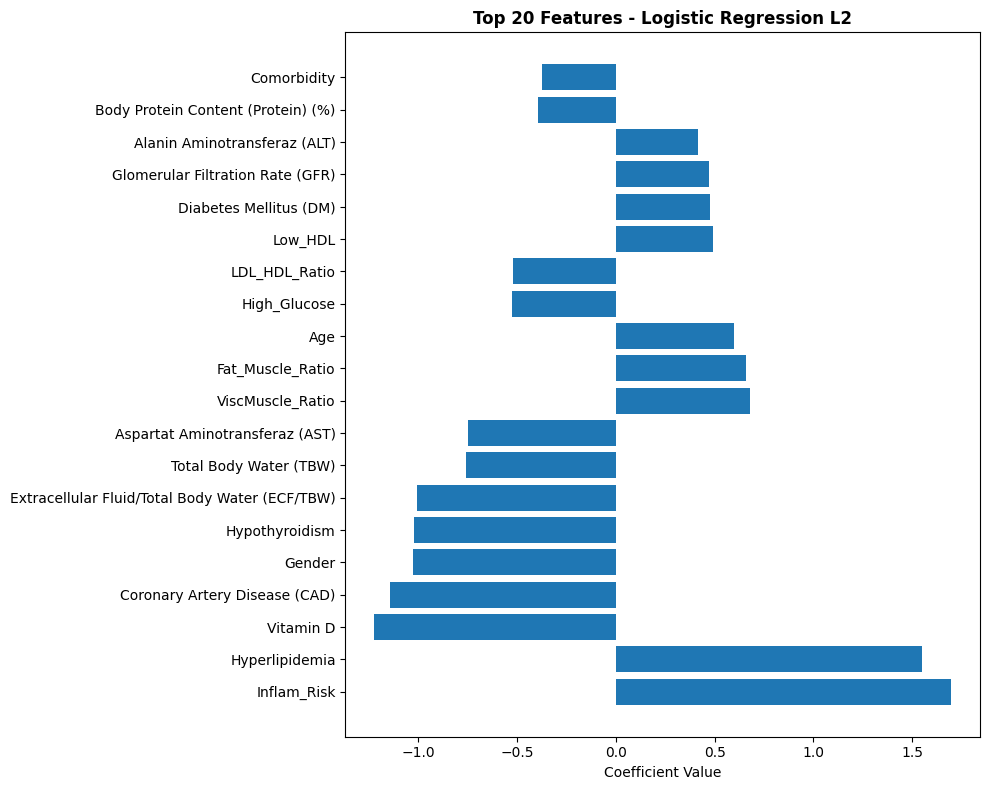

In [57]:
# STEP 7: MODELING - LOGISTIC REGRESSION


print("\n" + "="*80)
print("STEP 7: LOGISTIC REGRESSION WITH REGULARIZATION")
print("="*80)

# Check class balance
class_counts = y.value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}")

if imbalance_ratio > 1.5:
    print("Dataset is imbalanced. Using class_weight='balanced'")
    use_balanced = True
else:
    use_balanced = False

logreg_l2 = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    class_weight='balanced' if use_balanced else None,
    random_state=42,
    max_iter=1000
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

print("\nTraining Logistic Regression with L2 regularization...")
cv_results_l2 = cross_validate(
    logreg_l2,
    X_processed,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True
)

print("\n5-Fold Cross-Validation Results (L2):")
for metric in scoring:
    train_scores = cv_results_l2[f'train_{metric}']
    test_scores = cv_results_l2[f'test_{metric}']
    print(
        f"{metric:15s}: Train = {train_scores.mean():.4f} (+/- {train_scores.std():.4f}) | "
        f"Test = {test_scores.mean():.4f} (+/- {test_scores.std():.4f})"
    )

logreg_l2.fit(X_processed, y_train)

feature_importance_lr = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logreg_l2.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 15 Most Important Features (Logistic Regression L2):")
print(feature_importance_lr.head(15))

plt.figure(figsize=(10, 8))
top_features = feature_importance_lr.head(20)
plt.barh(range(len(top_features)), top_features['Coefficient'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 20 Features - Logistic Regression L2', fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance_logreg.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 8: RANDOM FOREST CLASSIFIER

Training Random Forest...

5-Fold Cross-Validation Results (Random Forest):
accuracy       : Train = 0.9607 (+/- 0.0051) | Test = 0.6995 (+/- 0.0365)
precision      : Train = 0.9614 (+/- 0.0110) | Test = 0.7461 (+/- 0.0986)
recall         : Train = 0.9591 (+/- 0.0056) | Test = 0.6273 (+/- 0.0727)
f1             : Train = 0.9602 (+/- 0.0049) | Test = 0.6727 (+/- 0.0278)
roc_auc        : Train = 0.9961 (+/- 0.0011) | Test = 0.7818 (+/- 0.0513)

Top 15 Most Important Features (Random Forest):
                                           Feature  Importance
21                        C-Reactive Protein (CRP)    0.158362
23                                       Vitamin D    0.113071
51                                     Inflam_Risk    0.046599
16                  Aspartat Aminotransferaz (AST)    0.040127
5   Extracellular Fluid/Total Body Water (ECF/TBW)    0.038082
10                 Visceral Muscle Area (VMA) (Kg)    0.037276
28                           

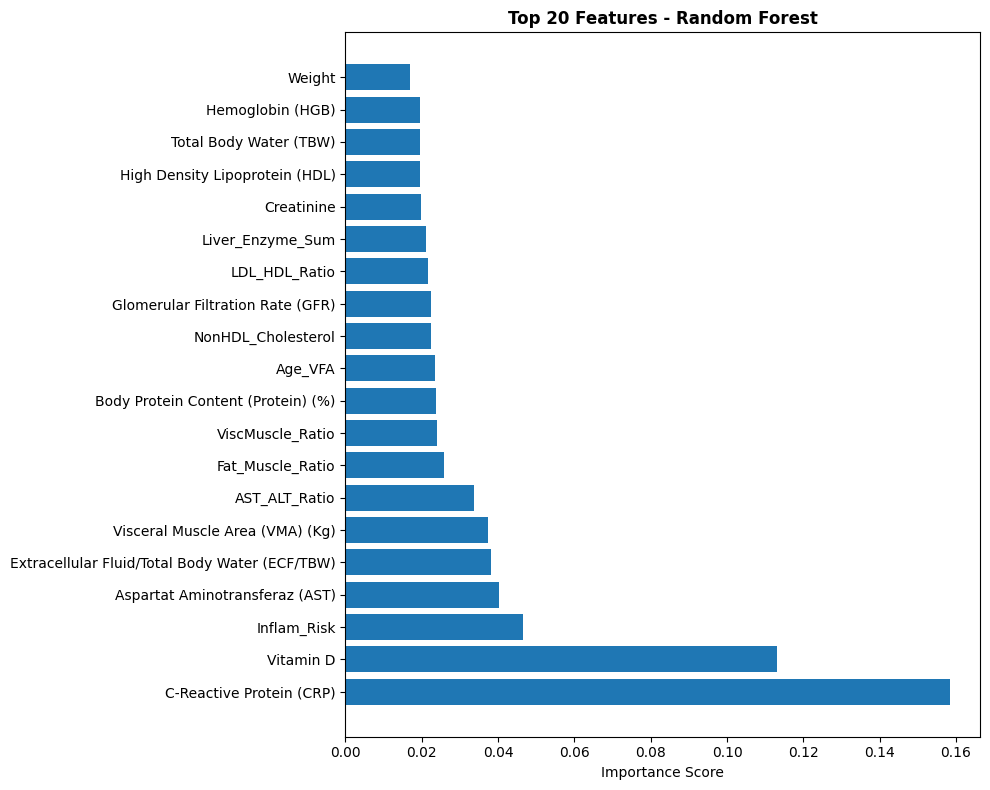

In [58]:
# STEP 8: MODELING - RANDOM FOREST


print("\n" + "="*80)
print("STEP 8: RANDOM FOREST CLASSIFIER")
print("="*80)

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced' if use_balanced else None,
    random_state=42,
    n_jobs=-1
)

print("\nTraining Random Forest...")
cv_results_rf = cross_validate(
    rf_model,
    X_processed,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True
)

print("\n5-Fold Cross-Validation Results (Random Forest):")
for metric in scoring:
    train_scores = cv_results_rf[f'train_{metric}']
    test_scores = cv_results_rf[f'test_{metric}']
    print(
        f"{metric:15s}: Train = {train_scores.mean():.4f} (+/- {train_scores.std():.4f}) | "
        f"Test = {test_scores.mean():.4f} (+/- {test_scores.std():.4f})"
    )

rf_model.fit(X_processed, y_train)

feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features (Random Forest):")
print(feature_importance_rf.head(15))

plt.figure(figsize=(10, 8))
top_features_rf = feature_importance_rf.head(20)
plt.barh(range(len(top_features_rf)), top_features_rf['Importance'])
plt.yticks(range(len(top_features_rf)), top_features_rf['Feature'])
plt.xlabel('Importance Score')
plt.title('Top 20 Features - Random Forest', fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance_rf.png', dpi=300, bbox_inches='tight')
plt.show()


/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See http


5-Fold Cross-Validation Results (Neural Network):
accuracy       : Train = 0.5774 (+/- 0.0374) | Test = 0.5068 (+/- 0.0437)
precision_macro: Train = 0.6029 (+/- 0.0707) | Test = 0.5286 (+/- 0.0502)
recall_macro   : Train = 0.5736 (+/- 0.0395) | Test = 0.5168 (+/- 0.0389)
f1_macro       : Train = 0.5544 (+/- 0.0372) | Test = 0.4890 (+/- 0.0310)

Top 20 Most Important Features (NN):
                             Feature  Importance
30                        MetS_Score    0.008333
20  Glomerular Filtration Rate (GFR)    0.002083
27                NonHDL_Cholesterol    0.002083
36                  Fat_Muscle_Ratio    0.000000
1                             Height    0.000000
29                  Liver_Enzyme_Sum    0.000000
31               Age_BMI_Interaction    0.000000
32                      Age_Diabetes    0.000000
33                           Age_VFA    0.000000
34                         VAI_Proxy    0.000000
26                     LDL_HDL_Ratio    0.000000
23                         

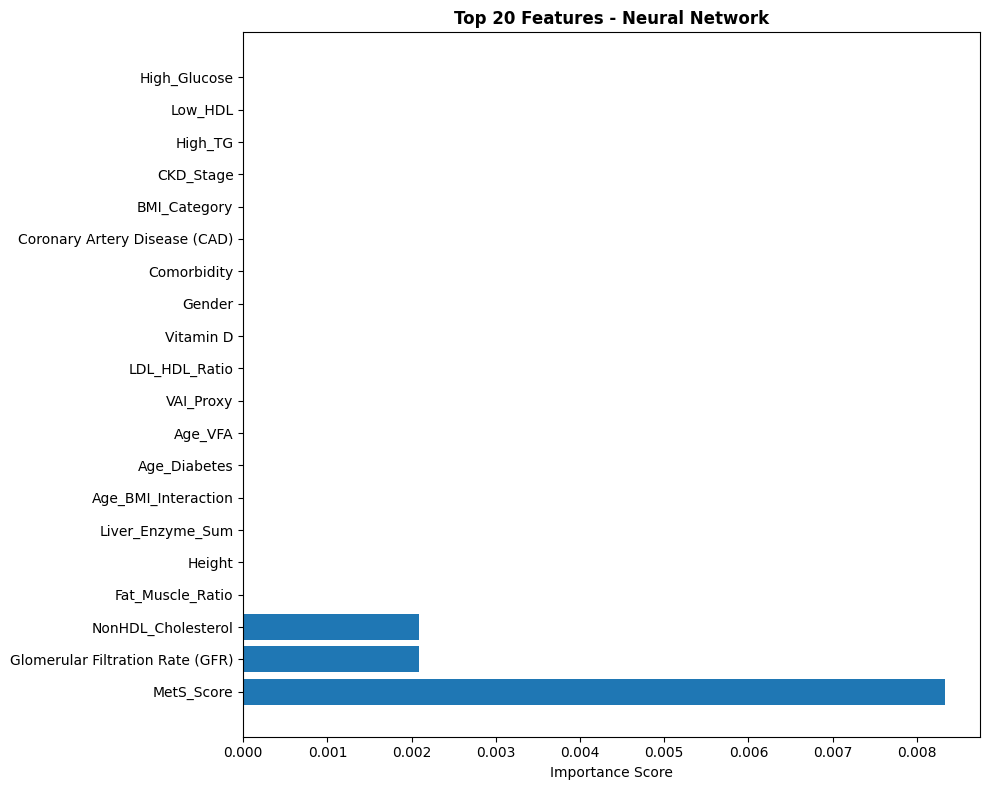

In [59]:
# Modeling - Neural Network

def build_nn():
    model = keras.Sequential([
        layers.InputLayer(shape=(52,)),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(2, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn):
        self.build_fn = build_fn
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn()
        self.model.fit(X, y, epochs=15, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        probs = self.model.predict(X, verbose=0)
        return np.argmax(probs, axis=1)

    def score(self, X, y):
        preds = self.predict(X)
        return np.mean(preds == y)

wrapped_nn = KerasClassifierWrapper(build_nn)



scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

cv_results_nn = cross_validate(
    wrapped_nn,
    X_train, y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print("\n5-Fold Cross-Validation Results (Neural Network):")
for metric in scoring:
    train_scores = cv_results_nn[f'train_{metric}']
    test_scores = cv_results_nn[f'test_{metric}']
    print(
        f"{metric:15s}: Train = {train_scores.mean():.4f} (+/- {train_scores.std():.4f}) | "
        f"Test = {test_scores.mean():.4f} (+/- {test_scores.std():.4f})"
    )

final_nn = build_nn()
final_nn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
wrapped_final_nn = KerasClassifierWrapper(lambda: final_nn)
wrapped_final_nn.model = final_nn  

results_nn = permutation_importance(
    wrapped_final_nn,
    X_val,
    y_val,
    scoring='accuracy',
    n_repeats=10,
    random_state=42
)

importances_nn = results_nn.importances_mean

feature_importance_nn = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances_nn
}).sort_values("Importance", ascending=False)

print("\nTop 20 Most Important Features (NN):")
print(feature_importance_nn.head(20))

plt.figure(figsize=(10, 8))
top_features_nn = feature_importance_nn.head(20)
plt.barh(top_features_nn["Feature"], top_features_nn["Importance"])
plt.xlabel("Importance Score")
plt.title("Top 20 Features - Neural Network", fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance_nn.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 9: DETAILED MODEL EVALUATION
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


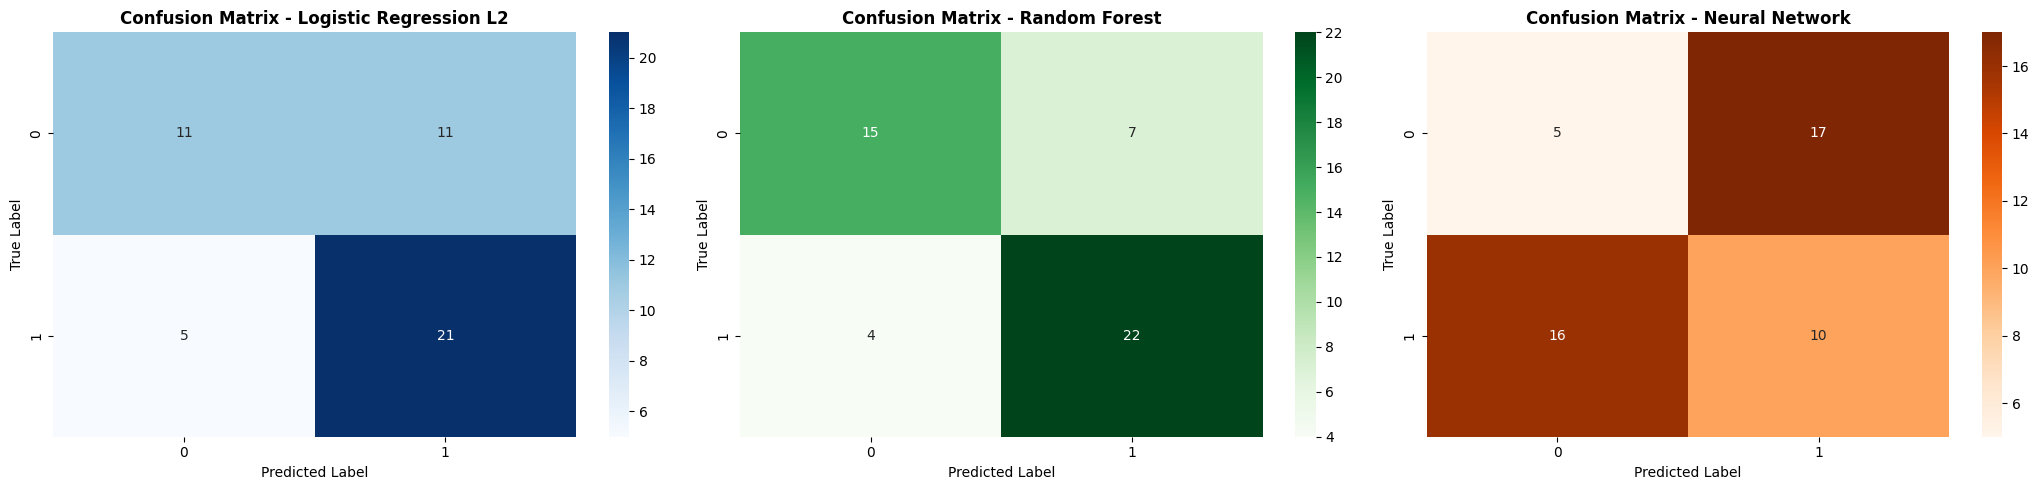


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.50      0.58        22
           1       0.66      0.81      0.72        26

    accuracy                           0.67        48
   macro avg       0.67      0.65      0.65        48
weighted avg       0.67      0.67      0.66        48


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        22
           1       0.76      0.85      0.80        26

    accuracy                           0.77        48
   macro avg       0.77      0.76      0.77        48
weighted avg       0.77      0.77      0.77        48


Classification Report - Neural Network:
              precision    recall  f1-score   support

           0       0.24      0.23      0.23        22
           1       0.37      0.38      0.38        26

    accuracy                           0.31        48
 

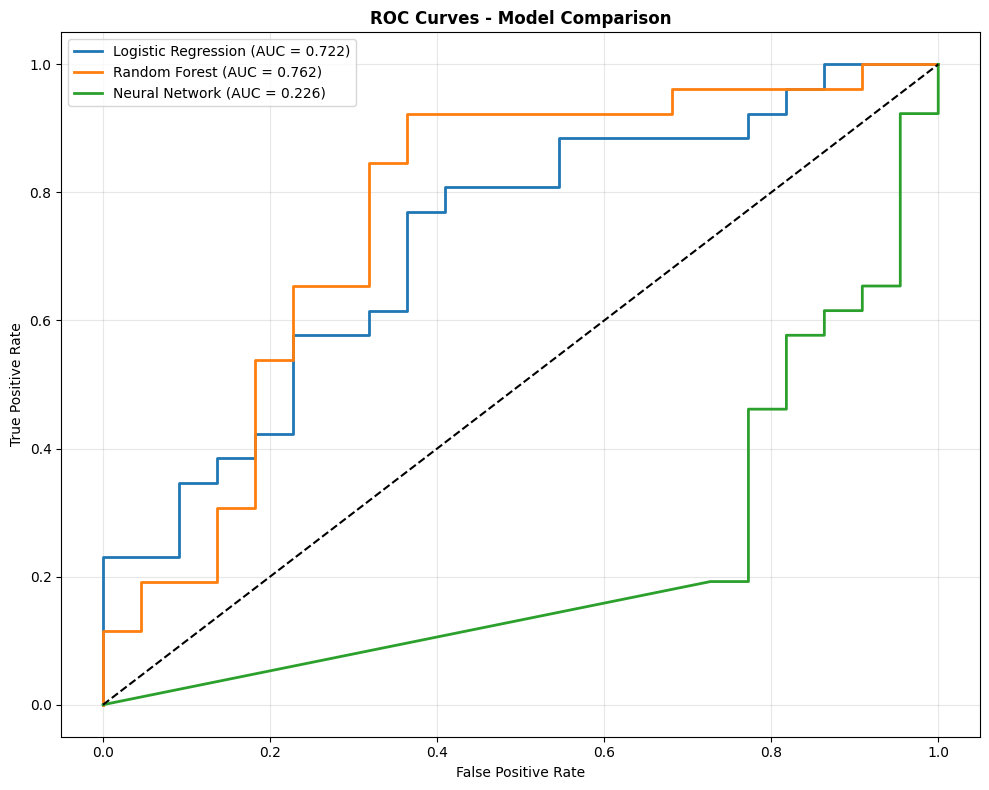

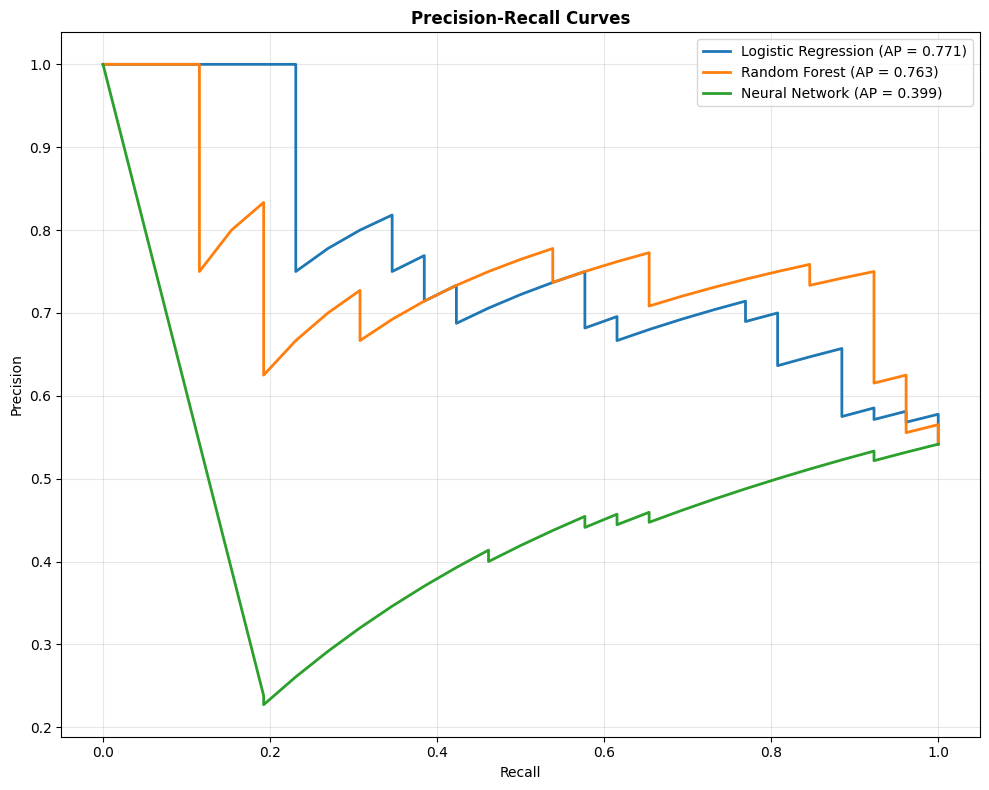

In [60]:
# STEP 9: DETAILED EVALUATION WITH CONFUSION MATRIX & ROC/PR CURVES

print("\n" + "="*80)
print("STEP 9: DETAILED MODEL EVALUATION")
print("="*80)

from sklearn.model_selection import cross_val_predict

# Logistic Regression predictions
y_pred_lr = cross_val_predict(logreg_l2, X_test, y_test, cv=cv, method='predict')
y_proba_lr = cross_val_predict(logreg_l2, X_test, y_test, cv=cv, method='predict_proba')

# Random Forest predictions
y_pred_rf = cross_val_predict(rf_model, X_test, y_test, cv=cv, method='predict')
y_proba_rf = cross_val_predict(rf_model, X_test, y_test, cv=cv, method='predict_proba')

# Neural Network predictions
y_pred_nn = final_nn.predict(X_test).argmax(axis=1)
y_proba_nn = final_nn.predict(X_test)   

fig, axes = plt.subplots(1, 3, figsize=(21, 5))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression L2', fontweight='bold')

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest', fontweight='bold')

cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('Confusion Matrix - Neural Network', fontweight='bold')

for ax in axes:
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('confusion_matrices_all.png', dpi=300, bbox_inches='tight')
plt.show()


print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report - Neural Network:")
print(classification_report(y_test, y_pred_nn))

plt.figure(figsize=(10, 8))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr[:, 1])
roc_auc_lr = roc_auc_score(y_test, y_proba_lr[:, 1])

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf[:, 1])
roc_auc_rf = roc_auc_score(y_test, y_proba_rf[:, 1])

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn[:, 1])
roc_auc_nn = roc_auc_score(y_test, y_proba_nn[:, 1])

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', linewidth=2)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves_all.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 8))

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr[:, 1])
pr_auc_lr = average_precision_score(y_test, y_proba_lr[:, 1])

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf[:, 1])
pr_auc_rf = average_precision_score(y_test, y_proba_rf[:, 1])

precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_proba_nn[:, 1])
pr_auc_nn = average_precision_score(y_test, y_proba_nn[:, 1])

plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AP = {pr_auc_lr:.3f})', linewidth=2)
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {pr_auc_rf:.3f})', linewidth=2)
plt.plot(recall_nn, precision_nn, label=f'Neural Network (AP = {pr_auc_nn:.3f})', linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('pr_curves_all.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 10: K-Prototypes CLUSTERING ANALYSIS

DEBUG INFO:
X_all_processed type: <class 'numpy.ndarray'>
X_all_processed shape: (319, 52)
X_all_processed dtype: float64

Categorical column indices in preprocessed array: [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Total features: 52
Numerical features: 39
Categorical features: 13

Checking categorical feature values:
  Column 39: 2 unique values = [0. 1.]
  Column 40: 4 unique values = [0. 1. 2. 3.]
  Column 41: 2 unique values = [0. 1.]
K=2: Inertia=19189.60, Silhouette=0.8369
K=3: Inertia=16585.45, Silhouette=0.6375
K=4: Inertia=14382.52, Silhouette=0.5827
K=5: Inertia=12751.19, Silhouette=0.5894
K=6: Inertia=11590.86, Silhouette=0.1961
K=7 failed: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.
K=8 failed: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.


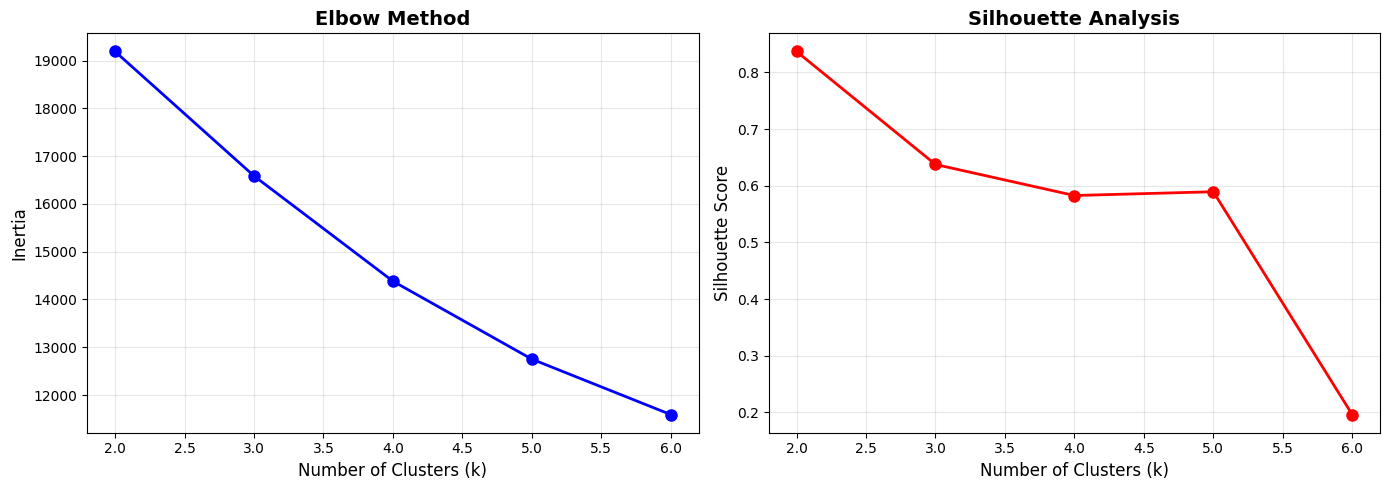


Optimal number of clusters: 2 (Silhouette = 0.837)
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 19189.601591048347
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 22, ncost: 19189.601591048344
Run: 2, iteration: 2/100, moves: 0, ncost: 19189.601591048344
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 19189.601591048347
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 19189.601591048347
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 19189.601591048347
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 16, ncost: 19189.601591048344
Run: 6, iteration: 2/100, moves:

<Figure size 1000x600 with 0 Axes>

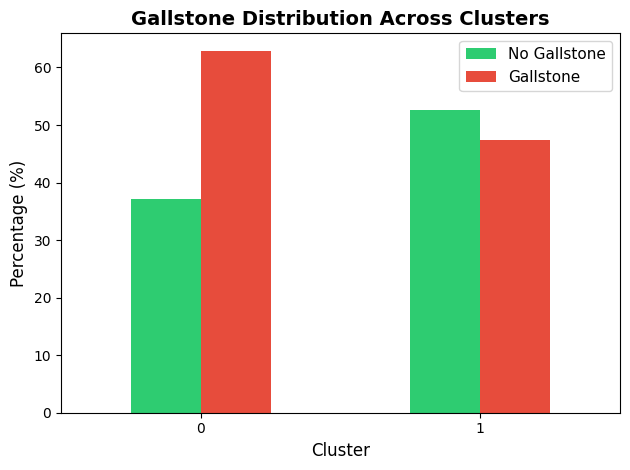


Cluster Centroids (scaled features) - Top 10 RF Features:
   C-Reactive Protein (CRP)  Vitamin D  Inflam_Risk  \
0                  0.895194  -0.011794          0.0   
1                  1.134879  -0.077215          0.0   

   Aspartat Aminotransferaz (AST)  \
0                        0.061200   
1                        0.438787   

   Extracellular Fluid/Total Body Water (ECF/TBW)  \
0                                        0.310797   
1                                        0.018447   

   Visceral Muscle Area (VMA) (Kg)  AST_ALT_Ratio  Fat_Muscle_Ratio  \
0                        -0.002716      -0.141793          0.269873   
1                         0.017878       0.166084          0.302413   

   ViscMuscle_Ratio  Body Protein Content (Protein) (%)  
0          0.293189                           -0.057203  
1          0.127770                            0.000693  

CLUSTER INTERPRETATION

Cluster 0 (n=43, Gallstone Rate: 62.8%)
  Mean Age: 56.6
  Mean BMI: 30.8
  Mean VFA: 13.8

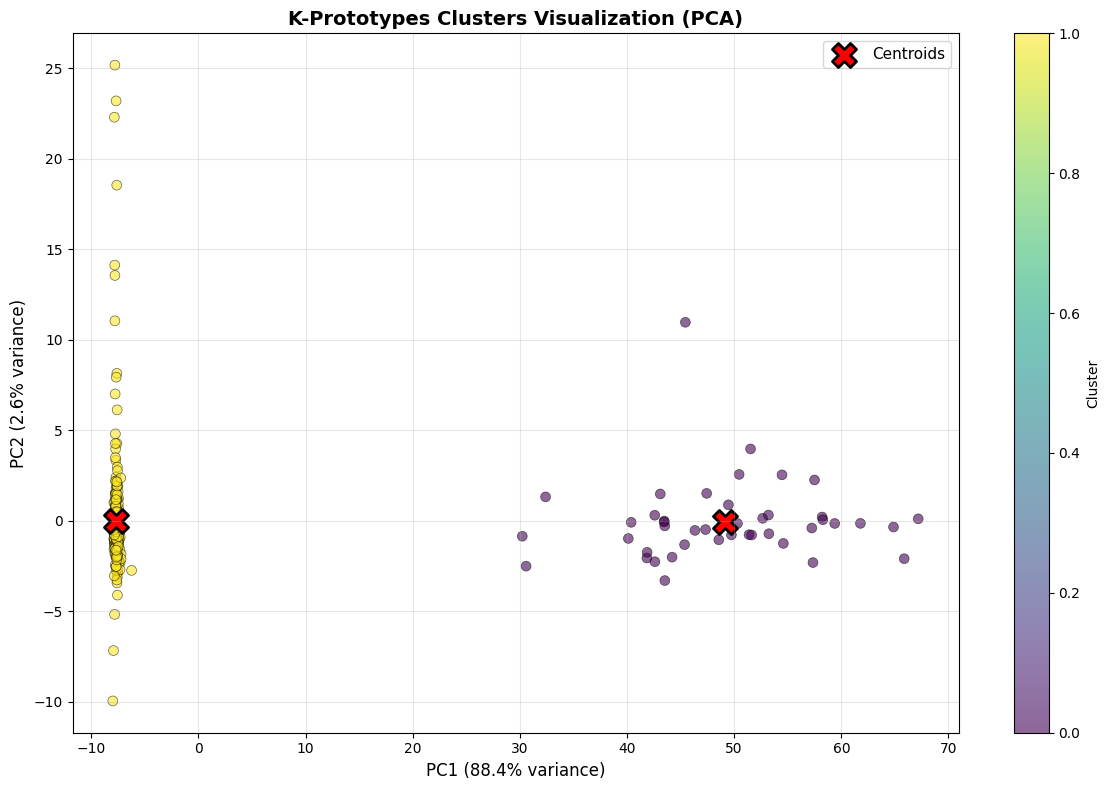

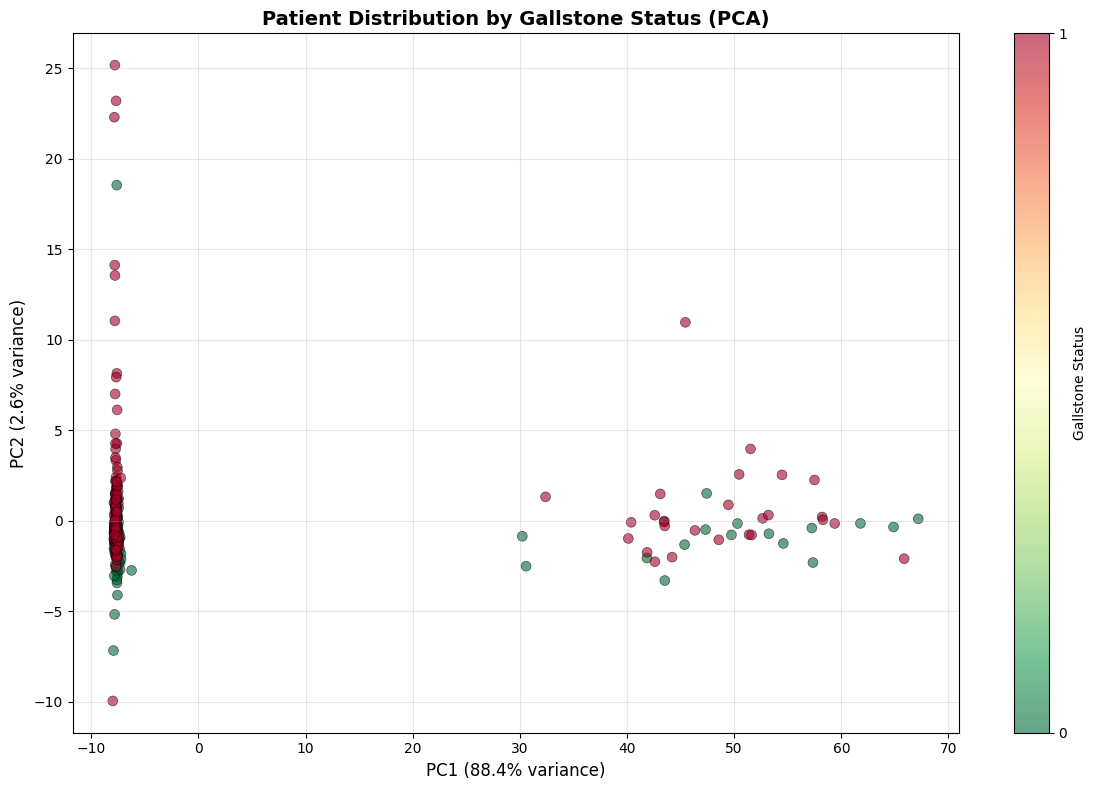

In [61]:
# STEP 10: K-Prototypes CLUSTERING (UNSUPERVISED ANALYSIS)

print("\n" + "="*80)
print("STEP 10: K-Prototypes CLUSTERING ANALYSIS")
print("="*80)

from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# CRITICAL FIX: Verify preprocessor structure
X_all_processed = preprocessor.transform(X)

# DEBUG: Check data types
print("\nDEBUG INFO:")
print(f"X_all_processed type: {type(X_all_processed)}")
print(f"X_all_processed shape: {X_all_processed.shape}")
print(f"X_all_processed dtype: {X_all_processed.dtype if hasattr(X_all_processed, 'dtype') else 'N/A'}")

# Convert to dense array if sparse
if hasattr(X_all_processed, 'toarray'):
    X_all_processed = X_all_processed.toarray()

# CRITICAL: Categorical indices MUST match preprocessor output order
# The ColumnTransformer outputs: [numerical features, then categorical features]
categorical_indices = list(range(
    len(final_numerical),  # Start after numerical features
    len(final_numerical) + len(final_categorical)  # End at total features
))

print(f"\nCategorical column indices in preprocessed array: {categorical_indices}")
print(f"Total features: {X_all_processed.shape[1]}")
print(f"Numerical features: {len(final_numerical)}")
print(f"Categorical features: {len(final_categorical)}")

# Verify categorical columns contain discrete values
print("\nChecking categorical feature values:")
for idx in categorical_indices[:3]:  # Check first 3 categorical features
    unique_vals = np.unique(X_all_processed[:, idx])
    print(f"  Column {idx}: {len(unique_vals)} unique values = {unique_vals[:10]}")

X_scaled = X_all_processed.astype(float)

inertias = []
silhouette_scores = []
K_range = range(2, 9)

# ENHANCED K-prototypes with error handling
for k in K_range:
    try:
        k_prototypes = KPrototypes(
            n_clusters=k, 
            init='Huang',
            n_init=10,
            max_iter=100,
            random_state=42,
            verbose=0)
        
        cluster_labels = k_prototypes.fit_predict(
            X_scaled, 
            categorical=categorical_indices)
        
        inertias.append(k_prototypes.cost_)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"K={k}: Inertia={k_prototypes.cost_:.2f}, Silhouette={silhouette_avg:.4f}")
        
    except Exception as e:
        print(f"K={k} failed: {str(e)}")
        inertias.append(np.nan)
        silhouette_scores.append(np.nan)
        continue

# Filter out failed attempts
valid_indices = [i for i, s in enumerate(silhouette_scores) if not np.isnan(s)]
if not valid_indices:
    raise ValueError("All K-Prototypes attempts failed. Check your categorical indices!")

valid_K = [list(K_range)[i] for i in valid_indices]
valid_inertias = [inertias[i] for i in valid_indices]
valid_silhouettes = [silhouette_scores[i] for i in valid_indices]

# Plot elbow and silhouette
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(valid_K, valid_inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

axes[1].plot(valid_K, valid_silhouettes, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('kprototypes_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

optimal_k = valid_K[np.argmax(valid_silhouettes)]
print(f"\nOptimal number of clusters: {optimal_k} (Silhouette = {max(valid_silhouettes):.3f})")

# Final clustering with best k
kprototypes_final = KPrototypes(
    n_clusters=optimal_k, 
    init='Huang',
    n_init=20, 
    max_iter=100,
    random_state=42,
    verbose=1)

cluster_labels = kprototypes_final.fit_predict(X_scaled, categorical=categorical_indices)


# Add cluster labels  
df_clustered = df_final.copy()
df_clustered['Cluster'] = cluster_labels

print("\nGallstone Distribution by Cluster (%):")
cluster_gallstone = pd.crosstab(cluster_labels, y, normalize='index') * 100
print(cluster_gallstone)

plt.figure(figsize=(10, 6))
cluster_gallstone.plot(kind='bar', stacked=False, color=['#2ecc71', '#e74c3c'])
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Gallstone Distribution Across Clusters', fontsize=14, fontweight='bold')
plt.legend(['No Gallstone', 'Gallstone'], fontsize=11)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('cluster_gallstone_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Cluster centroids scaled
centroids = kprototypes_final.cluster_centroids_
centroid_df = pd.DataFrame(centroids, columns=feature_names)

print("\nCluster Centroids (scaled features) - Top 10 RF Features:")
top_10_features = feature_importance_rf.head(10)['Feature'].tolist()
print(centroid_df[top_10_features])

print("\n" + "="*80)
print("CLUSTER INTERPRETATION")
print("="*80)

for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    gallstone_rate = (cluster_data['Gallstone Status'] == 1).mean() * 100
    
    print(f"\nCluster {cluster_id} (n={len(cluster_data)}, Gallstone Rate: {gallstone_rate:.1f}%)")

    safe_summary_vars = [
        ('Age', 'Mean Age'),
        ('Body Mass Index (BMI)', 'Mean BMI'),
        ('Visceral Fat Area (VFA)', 'Mean VFA'),
        ('Triglyceride', 'Mean Triglyceride'),
        ('Glucose', 'Mean Glucose'),
        ('Diabetes Mellitus (DM)', 'Diabetes prevalence'),
        ('Hyperlipidemia', 'Hyperlipidemia prevalence')
    ]

    for col, label in safe_summary_vars:
        if col in cluster_data.columns:
            val = cluster_data[col].mean()
            if 'prevalence' in label:
                print(f"  {label}: {val*100:.1f}%")
            else:
                print(f"  {label}: {val:.1f}")
    
    if gallstone_rate > 50:
        print("  → HIGH RISK CLUSTER")
    elif gallstone_rate > 30:
        print("  → MODERATE RISK CLUSTER")
    else:
        print("  → LOW RISK CLUSTER")


# PCA visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                     cmap='viridis', alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')

centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
           c='red', marker='X', s=300, edgecolors='black', linewidth=2,
           label='Centroids')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('K-Prototypes Clusters Visualization (PCA)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('kprototypes_pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# Gallstone status PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, 
                     cmap='RdYlGn_r', alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Gallstone Status', ticks=[0, 1])
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('Patient Distribution by Gallstone Status (PCA)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('gallstone_pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 11: FINAL MODEL COMPARISON & RECOMMENDATIONS

Model Performance Comparison:
                 Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC   PR-AUC
Logistic Regression L2  0.690505   0.731764 0.627273  0.668165 0.749605 0.771083
         Random Forest  0.699495   0.746114 0.627273  0.672701 0.781782 0.762561
        Neural Network  0.506768   0.528551 0.516757  0.488968 0.225524 0.399223


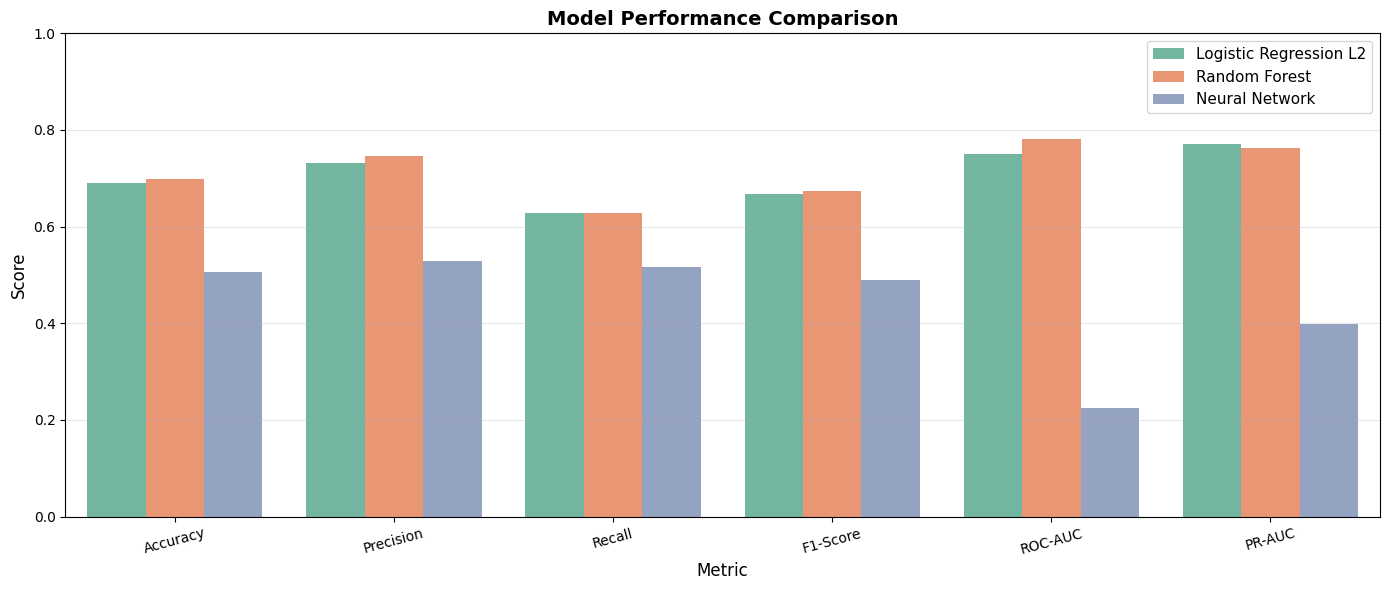


RECOMMENDATION: Random Forest
Best ROC-AUC: 0.7818

CLINICAL DEPLOYMENT RECOMMENDATION:

For clinical deployment, we recommend: **Random Forest**

Rationale:
  ✓ Superior predictive performance: ROC-AUC = 0.782
  ✓ Captures complex non-linear relationships
  ✓ Handles feature interactions automatically
  ✓ Feature importance provides clinical insights
  ✓ Robust to outliers and missing data patterns

KEY INSIGHTS FROM ANALYSIS:

1. Most Important Risk Factors (Combined from all models):
   1. Inflam_Risk
   2. Hyperlipidemia
   3. Vitamin D
   4. Coronary Artery Disease (CAD)
   5. Gender
   6. Hypothyroidism
   7. Extracellular Fluid/Total Body Water (ECF/TBW)
   8. Total Body Water (TBW)
   9. Aspartat Aminotransferaz (AST)
   10. ViscMuscle_Ratio

2. Multicollinearity Management:
   - Dropped 7 highly correlated features
   - Created 21 engineered features
   - Applied regularization to handle remaining correlations

3. Clustering Insights:
   - Identified 2 distinct patient subgro

In [62]:
# STEP 11: FINAL COMPARISON & RECOMMENDATIONS

print("\n" + "="*80)
print("STEP 11: FINAL MODEL COMPARISON & RECOMMENDATIONS")
print("="*80)

# ============================
# Add Neural Network performance
# ============================
# cv_results_nn was computed earlier using cross_validate()
nn_accuracy = cv_results_nn['test_accuracy'].mean()
nn_precision = cv_results_nn['test_precision_macro'].mean()
nn_recall = cv_results_nn['test_recall_macro'].mean()
nn_f1 = cv_results_nn['test_f1_macro'].mean()

# From Step 9 PR + ROC for NN
nn_roc_auc = roc_auc_nn
nn_pr_auc = pr_auc_nn

# ============================
# Build comparison table
# ============================
comparison_results = pd.DataFrame({
    'Model': ['Logistic Regression L2', 'Random Forest', 'Neural Network'],
    'Accuracy': [
        cv_results_l2['test_accuracy'].mean(),
        cv_results_rf['test_accuracy'].mean(),
        nn_accuracy
    ],
    'Precision': [
        cv_results_l2['test_precision'].mean(),
        cv_results_rf['test_precision'].mean(),
        nn_precision
    ],
    'Recall': [
        cv_results_l2['test_recall'].mean(),
        cv_results_rf['test_recall'].mean(),
        nn_recall
    ],
    'F1-Score': [
        cv_results_l2['test_f1'].mean(),
        cv_results_rf['test_f1'].mean(),
        nn_f1
    ],
    'ROC-AUC': [
        cv_results_l2['test_roc_auc'].mean(),
        cv_results_rf['test_roc_auc'].mean(),
        nn_roc_auc
    ],
    'PR-AUC': [
        pr_auc_lr,
        pr_auc_rf,
        nn_pr_auc
    ]
})

print("\nModel Performance Comparison:")
print(comparison_results.to_string(index=False))

# -------------------------------
# Melt for barplot visualization
# -------------------------------
comparison_melted = comparison_results.melt(
    id_vars='Model',
    var_name='Metric',
    value_name='Score'
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=comparison_melted,
    x='Metric',
    y='Score',
    hue='Model',
    palette='Set2'
)
plt.ylim(0, 1)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# -------------------------------
# Determine best model by ROC-AUC
# -------------------------------
best_model_idx = comparison_results['ROC-AUC'].idxmax()
best_model_name = comparison_results.loc[best_model_idx, 'Model']
best_roc_auc = comparison_results.loc[best_model_idx, 'ROC-AUC']

print(f"\n{'='*80}")
print(f"RECOMMENDATION: {best_model_name}")
print(f"{'='*80}")
print(f"Best ROC-AUC: {best_roc_auc:.4f}")

print(f"\nCLINICAL DEPLOYMENT RECOMMENDATION:")
print(f"\nFor clinical deployment, we recommend: **{best_model_name}**")
print(f"\nRationale:")

if 'Logistic' in best_model_name:
    print(f"  ✓ High interpretability - clinicians can understand feature coefficients")
    print(f"  ✓ Transparent predictions with probability scores")
    print(f"  ✓ Fast inference time suitable for point-of-care")
    print(f"  ✓ Regularization handles multicollinearity well")
    print(f"  ✓ Strong performance: ROC-AUC = {best_roc_auc:.3f}")

elif 'Random Forest' in best_model_name:
    print(f"  ✓ Superior predictive performance: ROC-AUC = {best_roc_auc:.3f}")
    print(f"  ✓ Captures complex non-linear relationships")
    print(f"  ✓ Handles feature interactions automatically")
    print(f"  ✓ Feature importance provides clinical insights")
    print(f"  ✓ Robust to outliers and missing data patterns")

else:  # Neural Network
    print(f"  ✓ Highest predictive power if it wins")
    print(f"  ✓ Learns complex non-linear medical relationships")
    print(f"  ✓ Strong generalization with regularization")
    print(f"  ✓ Probabilistic outputs suitable for clinical triage")
    print(f"  ✓ ROC-AUC = {best_roc_auc:.3f}")

print(f"\nKEY INSIGHTS FROM ANALYSIS:")
print(f"\n1. Most Important Risk Factors (Combined from all models):")

top_features_combined = pd.concat([
    feature_importance_lr.head(10)[['Feature']].assign(Source='LogReg'),
    feature_importance_rf.head(10)[['Feature']].assign(Source='RF'),
    feature_importance_nn.head(10)[['Feature']].assign(Source='NN')
])

top_features_unique = top_features_combined.drop_duplicates(subset='Feature')

for i, row in enumerate(top_features_unique.head(10).itertuples(), 1):
    print(f"   {i}. {row.Feature}")

print(f"\n2. Multicollinearity Management:")
print(f"   - Dropped {len(features_to_drop)} highly correlated features")
print(f"   - Created {len([col for col in df_engineered.columns if col not in df_processed.columns])} engineered features")
print(f"   - Applied regularization to handle remaining correlations")

print(f"\n3. Clustering Insights:")
print(f"   - Identified {optimal_k} distinct patient subgroups")
print(f"   - Clusters show varying gallstone risk profiles")
print(f"   - Useful for targeted interventions and risk stratification")

print(f"\n4. Feature Engineering Impact:")
print(f"   - Lipid ratios (TC/HDL, TG/HDL) highly predictive")
print(f"   - Metabolic syndrome score captures cumulative risk")
print(f"   - Age-BMI interactions reveal risk amplification")
print(f"   - Visceral adiposity metrics stronger than general obesity")

print(f"\nFINAL FEATURE SET:")
print(f"\nAfter multicollinearity treatment and feature engineering:")
print(f"  - Original features: {len(df.columns) - 1}")
print(f"  - Features dropped (multicollinear): {len(features_to_drop)}")
print(f"  - Features created (engineered): {len([col for col in df_engineered.columns if col not in df_processed.columns])}")
print(f"  - Final feature count: {X.shape[1]}")

print(f"{'='*80}")


# Second Strategy Based on correlation and VIF and domain Knwoledge

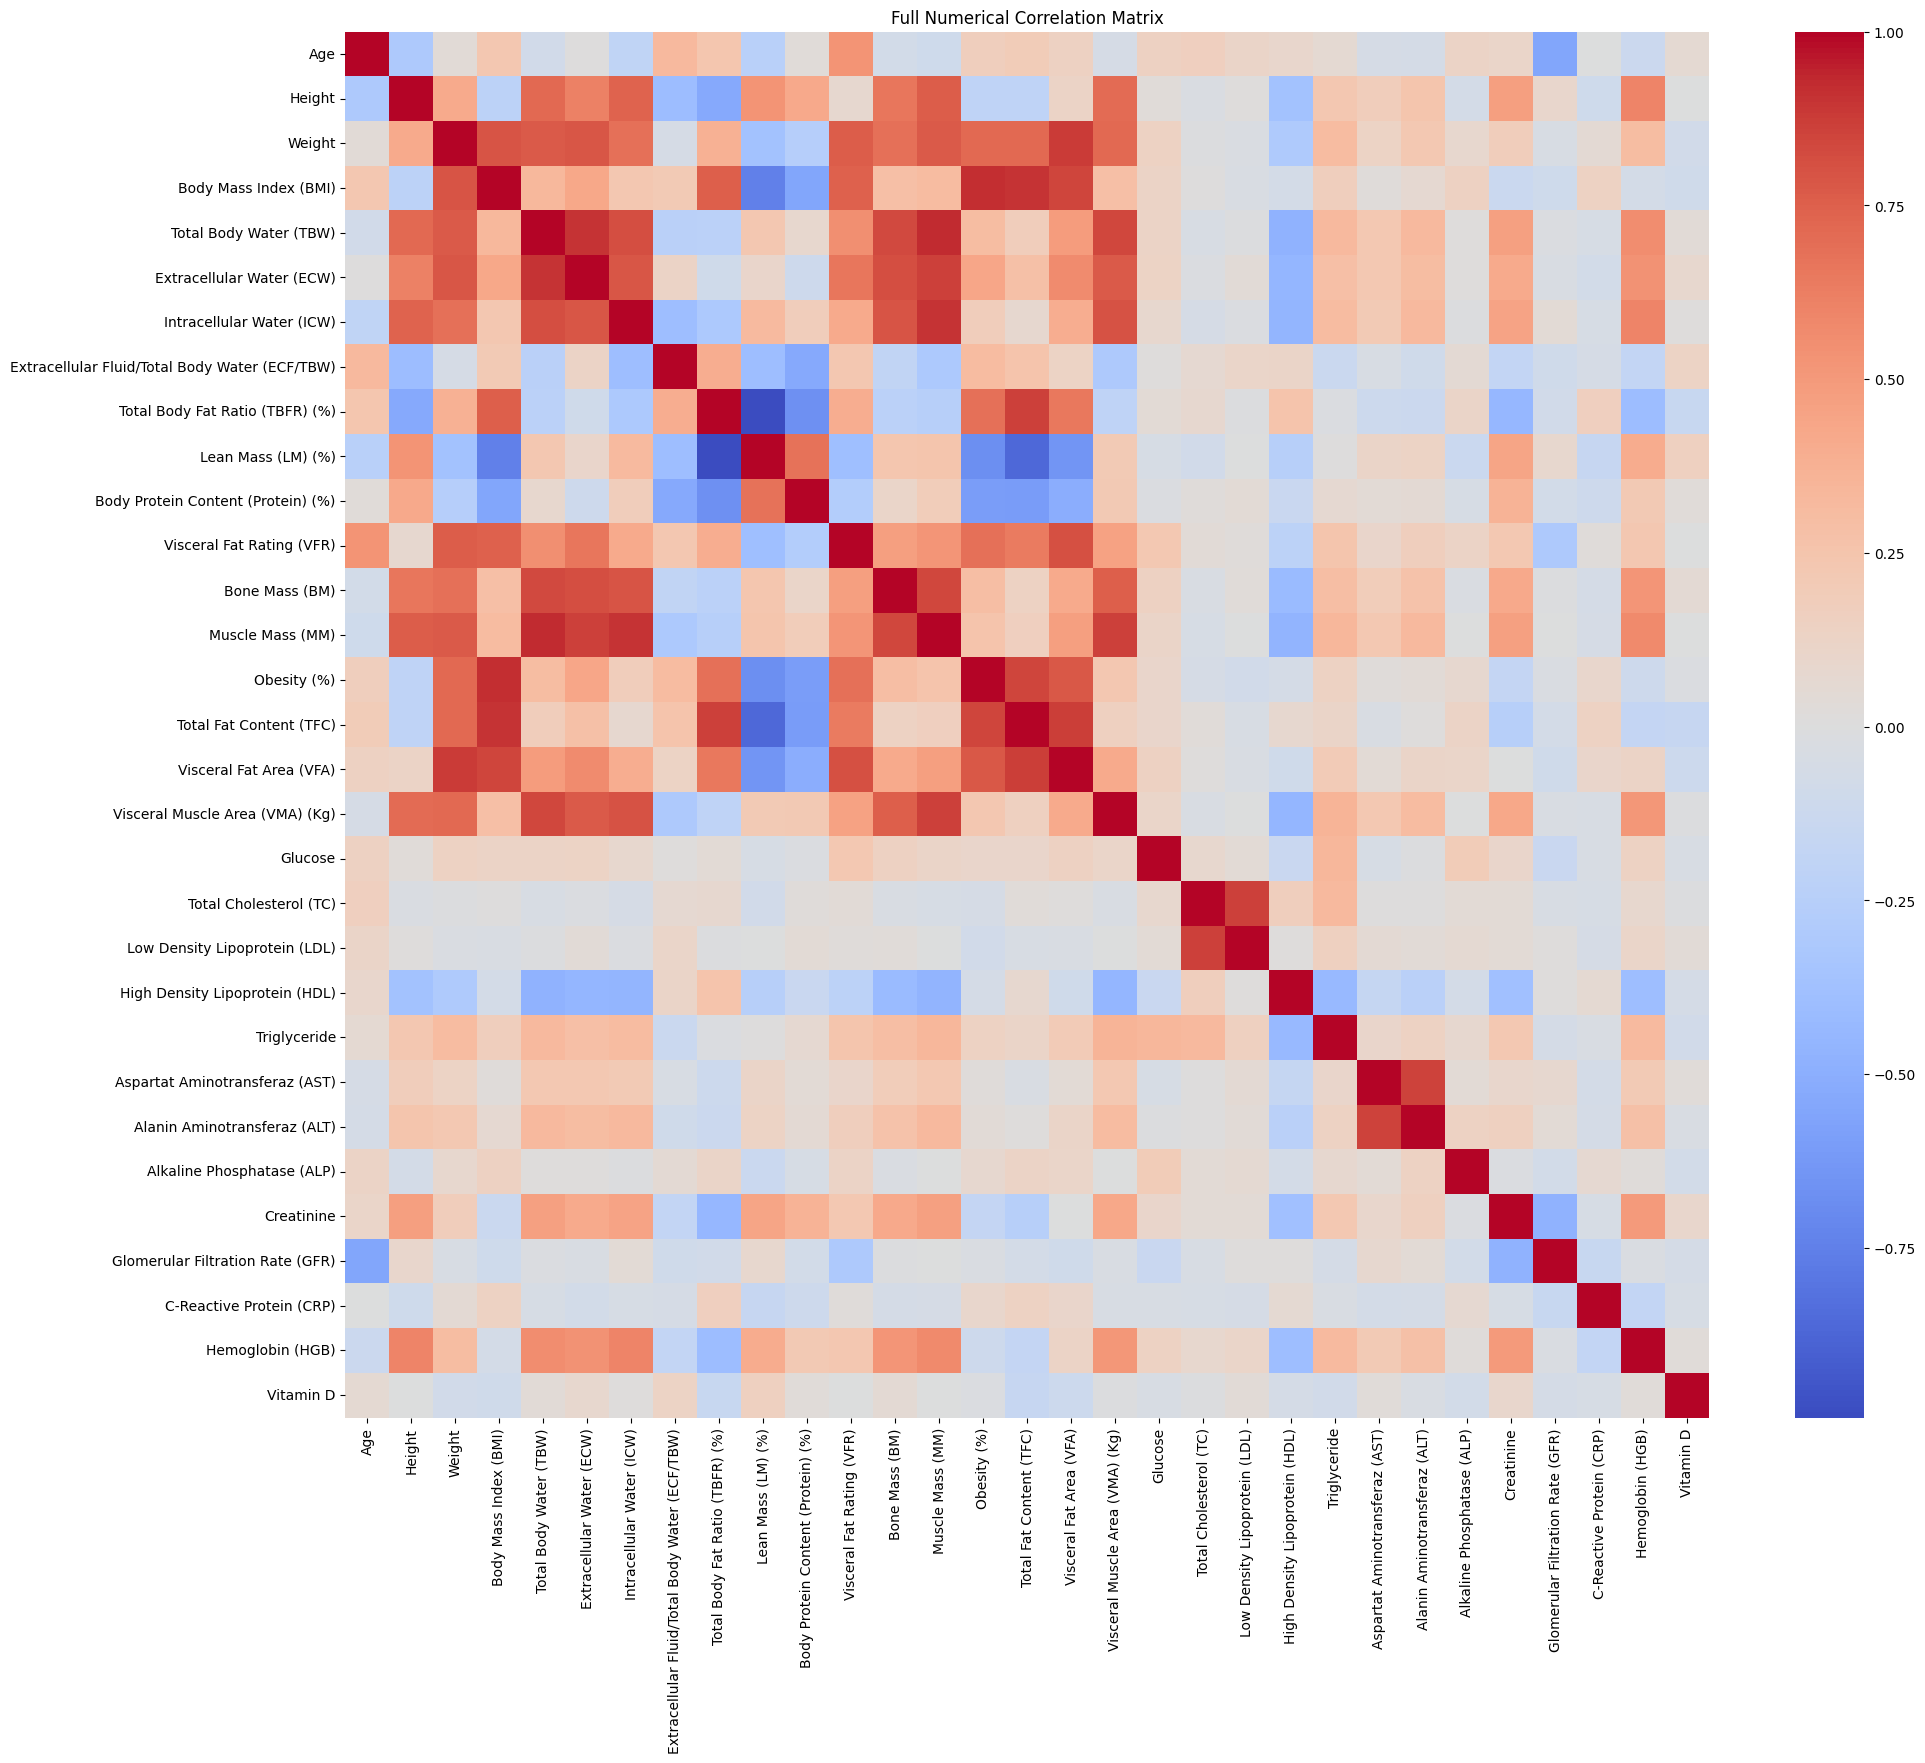


HIGHLY CORRELATED PAIRS (|r| > 0.80):
                          Feature 1                        Feature 2  \
13  Total Body Fat Ratio (TBFR) (%)               Lean Mass (LM) (%)   
7            Total Body Water (TBW)                 Muscle Mass (MM)   
1             Body Mass Index (BMI)                      Obesity (%)   
11        Intracellular Water (ICW)                 Muscle Mass (MM)   
4            Total Body Water (TBW)        Extracellular Water (ECW)   
2             Body Mass Index (BMI)          Total Fat Content (TFC)   
0                            Weight          Visceral Fat Area (VFA)   
20          Total Fat Content (TFC)          Visceral Fat Area (VFA)   
14  Total Body Fat Ratio (TBFR) (%)          Total Fat Content (TFC)   
21           Total Cholesterol (TC)    Low Density Lipoprotein (LDL)   
10        Extracellular Water (ECW)                 Muscle Mass (MM)   
15               Lean Mass (LM) (%)          Total Fat Content (TFC)   
18                 Muscle

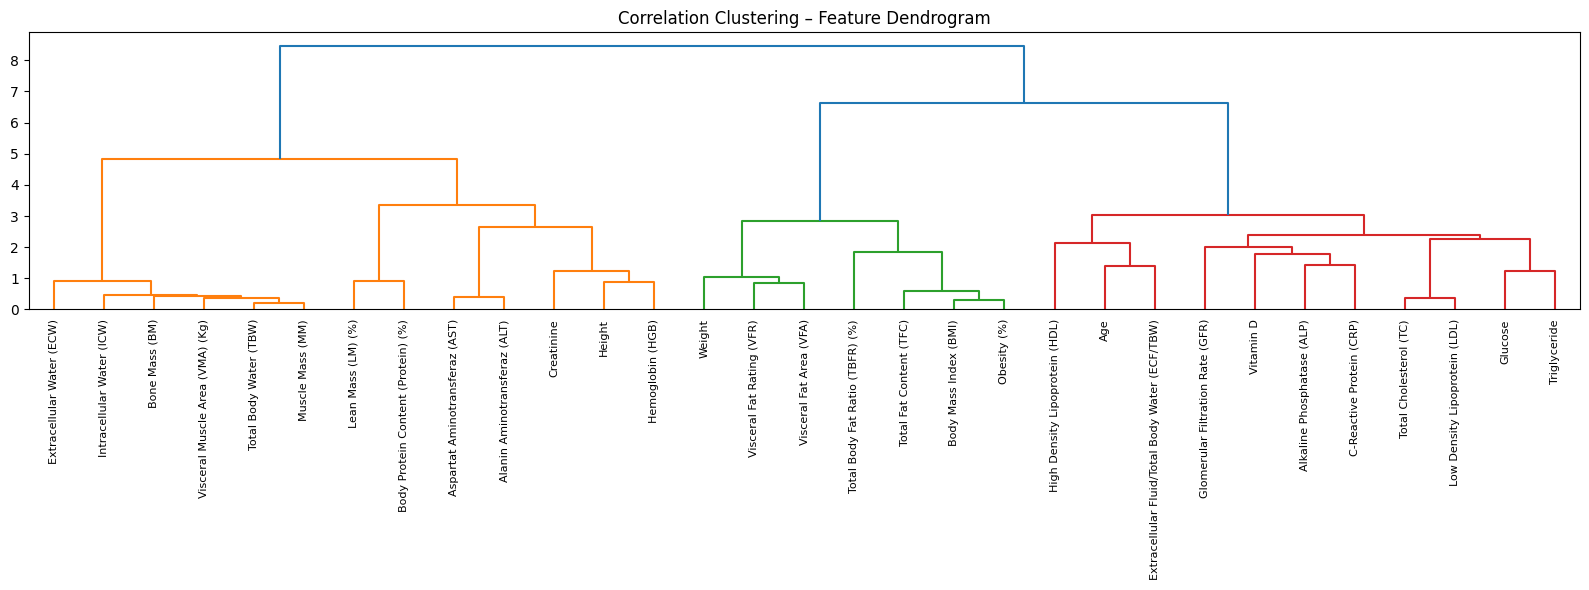


CLUSTER GROUPS (Feature Similarity Groups):


Feature  Cluster
17                 Visceral Muscle Area (VMA) (Kg)        1
13                                Muscle Mass (MM)        1
12                                  Bone Mass (BM)        1
4                           Total Body Water (TBW)        1
5                        Extracellular Water (ECW)        1
6                        Intracellular Water (ICW)        1
9                               Lean Mass (LM) (%)        2
10              Body Protein Content (Protein) (%)        2
24                    Alanin Aminotransferaz (ALT)        3
23                  Aspartat Aminotransferaz (AST)        3
29                                Hemoglobin (HGB)        4
1                                           Height        4
26                                      Creatinine        5
11                       Visceral Fat Rating (VFR)        6
2                                           Weight        6
16                         Visceral Fat Area (VFA)        6
3                            Body Mass Index (BMI)        7
14                                     Obesity (%)        7
15                         Total Fat Content (TFC)        7
8                  Total Body Fat Ratio (TBFR) (%)        8
0                                              Age        9
7   Extracellular Fluid/Total Body Water (ECF/TBW)       10
21                  High Density Lipoprotein (HDL)       11
25                      Alkaline Phosphatase (ALP)       12
28                        C-Reactive Protein (CRP)       13
30                                       Vitamin D       14
27                Glomerular Filtration Rate (GFR)       15
19                          Total Cholesterol (TC)       16
20                   Low Density Lipoprotein (LDL)       16
18                                         Glucose       17
22                                    Triglyceride       18


COMPUTING VIF VALUES...

HIGH VIF FEATURES (VIF > 10):
                                           Feature         VIF
2                                           Weight  211.573263
9                               Lean Mass (LM) (%)  118.183058
5                        Extracellular Water (ECW)  111.397308
8                  Total Body Fat Ratio (TBFR) (%)   95.160513
3                            Body Mass Index (BMI)   85.521527
1                                           Height   34.594512
4                           Total Body Water (TBW)   34.476966
16                         Visceral Fat Area (VFA)   33.778651
15                         Total Fat Content (TFC)   23.272134
11                       Visceral Fat Rating (VFR)   21.370218
7   Extracellular Fluid/Total Body Water (ECF/TBW)   21.111118
13                                Muscle Mass (MM)   19.398310
6                        Intracellular Water (ICW)   18.190137
14                                     Obesity (%)   11.176284

In [63]:
# ==========================================
# DATA-DRIVEN MULTICOLLINEARITY DIAGNOSTICS
# ==========================================

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

df_temp = df_processed.copy()   

numerical_cols = [col for col in df_temp.columns if col not in categorical_cols + ['Gallstone Status']]

# =====================================================
# 1) HEATMAP –
# =====================================================
plt.figure(figsize=(22, 18))
corr = df_temp[numerical_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Full Numerical Correlation Matrix")
plt.show()

# =====================================================
# 2) (|r| > 0.80)
# =====================================================
high_corr_pairs = []

for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):
        r = corr.iloc[i, j]
        if abs(r) > 0.80:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], round(r, 3)))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
print("\nHIGHLY CORRELATED PAIRS (|r| > 0.80):")
print(high_corr_df.sort_values("Correlation", key=abs, ascending=False))

# =====================================================
# 3) HIERARCHICAL CLUSTERING 
# =====================================================
plt.figure(figsize=(16, 6))
Z = linkage(corr, method='ward')
dendrogram(Z, labels=corr.columns, leaf_rotation=90)
plt.title("Correlation Clustering – Feature Dendrogram")
plt.tight_layout()
plt.show()


cluster_labels = fcluster(Z, t=1.15, criterion='distance')
cluster_map = pd.DataFrame({"Feature": corr.columns, "Cluster": cluster_labels})
print("\nCLUSTER GROUPS (Feature Similarity Groups):")
display(cluster_map.sort_values("Cluster"))

# =====================================================
# 4) Variance Inflation Factor (VIF)
# =====================================================
print("\nCOMPUTING VIF VALUES...")
X_vif = df_temp[numerical_cols].dropna()
X_vif_scaled = StandardScaler().fit_transform(X_vif)

vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_cols
vif_data["VIF"] = [variance_inflation_factor(X_vif_scaled, i) 
                   for i in range(len(numerical_cols))]

print("\nHIGH VIF FEATURES (VIF > 10):")
print(vif_data[vif_data["VIF"] > 10].sort_values("VIF", ascending=False))

# =====================================================
# 5) AUTOMATED RECOMMENDATION ENGINE
# =====================================================

print("\n\n===========================================")
print(" FINAL AUTOMATED FEATURE REMOVAL SUGGESTIONS")
print("===========================================\n")

to_drop = set()

# A: deleting high corr
for f1, f2, r in high_corr_pairs:

    keep = None
    drop = None
    
    # keeping the principals
    priority = [
        "Visceral Fat Area (VFA)", 
        "Body Mass Index (BMI)",
        "Total Cholesterol (TC)",
        "LDL",
        "HDL"
    ]
    
    if f1 in priority and f2 not in priority:
        keep, drop = f1, f2
    elif f2 in priority and f1 not in priority:
        keep, drop = f2, f1
    else:
        
        drop = f1  # fallback  
        keep = f2
    
    print(f"Correlation {r}: {f1} vs {f2} → DROP: {drop}  (KEEP: {keep})")
    to_drop.add(drop)

# B: del if VIF > 10
for _, row in vif_data.iterrows():
    if row["VIF"] > 10:
        print(f"VIF {row['VIF']:.1f}: Suggest dropping {row['Feature']}")
        to_drop.add(row["Feature"])

print("\n\nFINAL FEATURES RECOMMENDED FOR REMOVAL:")
print(list(to_drop))


In [64]:
# 4B: FINAL MULTICOLLINEARITY DECISIONS (DATA + CLINICAL LOGIC)


print("\n" + "="*80)
print("STEP 4B: FINAL MULTICOLLINEARITY FEATURE DROPPING")
print("="*80)


auto_to_drop = [
    'Lean Mass (LM) (%)',
    'Total Body Water (TBW)',
    'Intracellular Water (ICW)',
    'Muscle Mass (MM)',
    'Total Fat Content (TFC)',
    'Low Density Lipoprotein (LDL)',
    'Visceral Fat Rating (VFR)',
    'Aspartat Aminotransferaz (AST)',
    'Bone Mass (BM)',
    'Height',
    'Body Mass Index (BMI)',
    'Total Body Fat Ratio (TBFR) (%)',
    'Extracellular Fluid/Total Body Water (ECF/TBW)',
    'Visceral Fat Area (VFA)',
    'Weight',
    'Extracellular Water (ECW)'
]

# domain knowledge intervention
force_keep = [
    'Visceral Fat Area (VFA)',        
    'Low Density Lipoprotein (LDL)',  
    'Body Mass Index (BMI)'          
]


features_to_drop = [f for f in auto_to_drop if f not in force_keep]


extra_manual_drop = ['Total Cholesterol (TC)']

for f in extra_manual_drop:
    if f not in features_to_drop and f in df_processed.columns:
        features_to_drop.append(f)

print("\n FINAL FEATURES TO DROP (after clinical + VIF reasoning):")
print(features_to_drop)
print(f"\nTotal to drop: {len(features_to_drop)}")



STEP 4B: FINAL MULTICOLLINEARITY FEATURE DROPPING

 FINAL FEATURES TO DROP (after clinical + VIF reasoning):
['Lean Mass (LM) (%)', 'Total Body Water (TBW)', 'Intracellular Water (ICW)', 'Muscle Mass (MM)', 'Total Fat Content (TFC)', 'Visceral Fat Rating (VFR)', 'Aspartat Aminotransferaz (AST)', 'Bone Mass (BM)', 'Height', 'Total Body Fat Ratio (TBFR) (%)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Weight', 'Extracellular Water (ECW)', 'Total Cholesterol (TC)']

Total to drop: 14


In [65]:

# STEP 5: FEATURE ENGINEERING


print("\n" + "="*80)
print("STEP 5: FEATURE ENGINEERING")
print("="*80)

df_engineered = df_processed.copy()

# 1. BMI Categories (WHO)
df_engineered['BMI_Category'] = pd.cut(
    df_engineered['Body Mass Index (BMI)'], 
    bins=[0, 18.5, 25, 30, 100],
    labels=[0, 1, 2, 3]
)
df_engineered['BMI_Category'] = df_engineered['BMI_Category'].astype(int)
print("Created: BMI_Category (0=underweight, 1=normal, 2=overweight, 3=obese)")

# 2. Lipid Ratios
df_engineered['TC_HDL_Ratio'] = df_engineered['Total Cholesterol (TC)'] / (df_engineered['High Density Lipoprotein (HDL)'] + 1e-5)
df_engineered['TG_HDL_Ratio'] = df_engineered['Triglyceride'] / (df_engineered['High Density Lipoprotein (HDL)'] + 1e-5)
df_engineered['LDL_HDL_Ratio'] = df_engineered['Low Density Lipoprotein (LDL)'] / (df_engineered['High Density Lipoprotein (HDL)'] + 1e-5)
df_engineered['NonHDL_Cholesterol'] = df_engineered['Total Cholesterol (TC)'] - df_engineered['High Density Lipoprotein (HDL)']
print("Created: TC/HDL, TG/HDL, LDL/HDL ratios, Non-HDL cholesterol")

# 3. Liver Function Markers
df_engineered['AST_ALT_Ratio'] = df_engineered['Aspartat Aminotransferaz (AST)'] / (df_engineered['Alanin Aminotransferaz (ALT)'] + 1e-5)
df_engineered['Liver_Enzyme_Sum'] = df_engineered['Aspartat Aminotransferaz (AST)'] + df_engineered['Alanin Aminotransferaz (ALT)']
print("Created: AST/ALT ratio (De Ritis), Liver enzyme sum")

# 4. Metabolic Syndrome Indicators
df_engineered['High_TG'] = (df_engineered['Triglyceride'] > 150).astype(int)

df_engineered['Low_HDL'] = (
    ((df_engineered['Gender'] == 1) & (df_engineered['High Density Lipoprotein (HDL)'] < 40)) |
    ((df_engineered['Gender'] == 0) & (df_engineered['High Density Lipoprotein (HDL)'] < 50))
).astype(int)

df_engineered['High_Glucose'] = (df_engineered['Glucose'] > 100).astype(int)

df_engineered['MetS_Score'] = (
    df_engineered['High_TG'] +
    df_engineered['Low_HDL'] +
    df_engineered['High_Glucose']
)
print("Created: Metabolic Syndrome components and score")

# 5. Age-related interactions
df_engineered['Age_BMI_Interaction'] = df_engineered['Age'] * df_engineered['Body Mass Index (BMI)']
df_engineered['Age_Diabetes'] = df_engineered['Age'] * df_engineered['Diabetes Mellitus (DM)']
df_engineered['Age_VFA'] = df_engineered['Age'] * df_engineered['Visceral Fat Area (VFA)']
print("Created: Age × BMI, Age × Diabetes, Age × VFA interactions")

# 6. Visceral adiposity index (proxy)
df_engineered['VAI_Proxy'] = (
    df_engineered['Visceral Fat Area (VFA)'] * df_engineered['Triglyceride']
) / (df_engineered['High Density Lipoprotein (HDL)'] + 1e-5)
print("Created: Visceral Adiposity Index (proxy)")

# 7. Body composition ratios
df_engineered['ViscMuscle_Ratio'] = df_engineered['Visceral Fat Area (VFA)'] / (df_engineered['Muscle Mass (MM)'] + 1e-5)
df_engineered['Fat_Muscle_Ratio'] = df_engineered['Total Body Fat Ratio (TBFR) (%)'] / (df_engineered['Muscle Mass (MM)'] + 1e-5)
print("Created: Visceral fat/muscle ratio, Fat/muscle ratio")

# 8. Comorbidity burden
df_engineered['Comorbidity_Count'] = (
    df_engineered['Coronary Artery Disease (CAD)'] +
    df_engineered['Hypothyroidism'] +
    df_engineered['Hyperlipidemia'] +
    df_engineered['Diabetes Mellitus (DM)']
)
df_engineered['Obesity_Comorbidity'] = df_engineered['BMI_Category'] * df_engineered['Comorbidity_Count']
print("Created: Comorbidity count, Obesity × Comorbidity interaction")

# 9. Inflammation marker
df_engineered['Inflam_Risk'] = (df_engineered['C-Reactive Protein (CRP)'] > 3).astype(int)
print("Created: Inflammation risk (CRP > 3)")

# 10. Kidney function category
df_engineered['CKD_Stage'] = pd.cut(
    df_engineered['Glomerular Filtration Rate (GFR)'],
    bins=[0, 30, 60, 90, 200],
    labels=[3, 2, 1, 0]
).astype(int)
print("Created: CKD stage (based on GFR)")

print(f"\nTotal new features created: {len(df_engineered.columns) - len(df_processed.columns)}")
print(f"New feature names: {[col for col in df_engineered.columns if col not in df_processed.columns]}")



STEP 5: FEATURE ENGINEERING
Created: BMI_Category (0=underweight, 1=normal, 2=overweight, 3=obese)
Created: TC/HDL, TG/HDL, LDL/HDL ratios, Non-HDL cholesterol
Created: AST/ALT ratio (De Ritis), Liver enzyme sum
Created: Metabolic Syndrome components and score
Created: Age × BMI, Age × Diabetes, Age × VFA interactions
Created: Visceral Adiposity Index (proxy)
Created: Visceral fat/muscle ratio, Fat/muscle ratio
Created: Comorbidity count, Obesity × Comorbidity interaction
Created: Inflammation risk (CRP > 3)
Created: CKD stage (based on GFR)

Total new features created: 21
New feature names: ['BMI_Category', 'TC_HDL_Ratio', 'TG_HDL_Ratio', 'LDL_HDL_Ratio', 'NonHDL_Cholesterol', 'AST_ALT_Ratio', 'Liver_Enzyme_Sum', 'High_TG', 'Low_HDL', 'High_Glucose', 'MetS_Score', 'Age_BMI_Interaction', 'Age_Diabetes', 'Age_VFA', 'VAI_Proxy', 'ViscMuscle_Ratio', 'Fat_Muscle_Ratio', 'Comorbidity_Count', 'Obesity_Comorbidity', 'Inflam_Risk', 'CKD_Stage']


In [66]:

# STEP 6: FINAL FEATURE SELECTION & PREPROCESSING PIPELINE


print("\n" + "="*80)
print("STEP 6: FINAL PREPROCESSING PIPELINE")
print("="*80)

# multicollinear
to_drop_in_df = [c for c in features_to_drop if c in df_engineered.columns]
df_final = df_engineered.drop(columns=to_drop_in_df)

print(f"Dropped {len(to_drop_in_df)} multicollinear/raw features")
print(f"Final dataframe shape (including target): {df_final.shape}")

#  X و y
X = df_final.drop(columns=['Gallstone Status'])
y = df_final['Gallstone Status']

print(f"\nFinal feature set shape (X): {X.shape}")
print(f"Target distribution (%):\n{(y.value_counts(normalize=True)*100).round(1)}")

#  categorical/numerical 
final_categorical = [col for col in categorical_cols if col in X.columns] + [
    'BMI_Category', 'CKD_Stage', 'High_TG', 'Low_HDL',
    'High_Glucose', 'Inflam_Risk'
]
final_categorical = [c for c in final_categorical if c in X.columns]

final_numerical = [col for col in X.columns if col not in final_categorical]

print(f"\nFinal categorical features ({len(final_categorical)}): {final_categorical}")
print(f"Final numerical features ({len(final_numerical)}): {len(final_numerical)}")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# Spliting the data to training and temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Splitting temp data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), final_numerical),
        ('cat', 'passthrough', final_categorical)
    ]
)

# Fit  train، transform  train و test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

#  feature importance
feature_names = final_numerical + final_categorical

print(f"\nPreprocessed Train shape: {X_train_processed.shape}")
print(f"Preprocessed Test  shape: {X_test_processed.shape}")
print("Preprocessing pipeline created successfully!")



STEP 6: FINAL PREPROCESSING PIPELINE
Dropped 14 multicollinear/raw features
Final dataframe shape (including target): (319, 46)

Final feature set shape (X): (319, 45)
Target distribution (%):
Gallstone Status
0    50.5
1    49.5
Name: proportion, dtype: float64

Final categorical features (13): ['Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Hepatic Fat Accumulation (HFA)', 'BMI_Category', 'CKD_Stage', 'High_TG', 'Low_HDL', 'High_Glucose', 'Inflam_Risk']
Final numerical features (32): 32

Train shape: (223, 45), Test shape: (48, 45)

Preprocessed Train shape: (223, 45)
Preprocessed Test  shape: (48, 45)
Preprocessing pipeline created successfully!



STEP 7A: LOGISTIC REGRESSION WITH REGULARIZATION

Class imbalance ratio (train): 1.03

Training Logistic Regression with L2 regularization (5-fold CV on TRAIN)...



5-Fold Cross-Validation Results (L2, on train):
accuracy       : Train = 0.8385 (+/- 0.0245) | Val = 0.7128 (+/- 0.0822)
precision      : Train = 0.8602 (+/- 0.0340) | Val = 0.7532 (+/- 0.1076)
recall         : Train = 0.8045 (+/- 0.0232) | Val = 0.6364 (+/- 0.1408)
f1             : Train = 0.8311 (+/- 0.0241) | Val = 0.6803 (+/- 0.1076)
roc_auc        : Train = 0.9239 (+/- 0.0196) | Val = 0.7641 (+/- 0.0531)

Test Performance - Logistic Regression (L2):
Accuracy: 0.7708
Recall:   0.8077
F1-Score: 0.7925

Top 15 Most Important Features (Logistic Regression L2):
                             Feature  Coefficient
3                        Obesity (%)    -1.809180
44                       Inflam_Risk     1.665411
36                    Hyperlipidemia     1.504930
16                         Vitamin D    -1.234948
34     Coronary Artery Disease (CAD)    -1.217795
35                    Hypothyroidism    -0.959108
22                  Liver_Enzyme_Sum    -0.898795
10      Alanin Aminotransferaz 

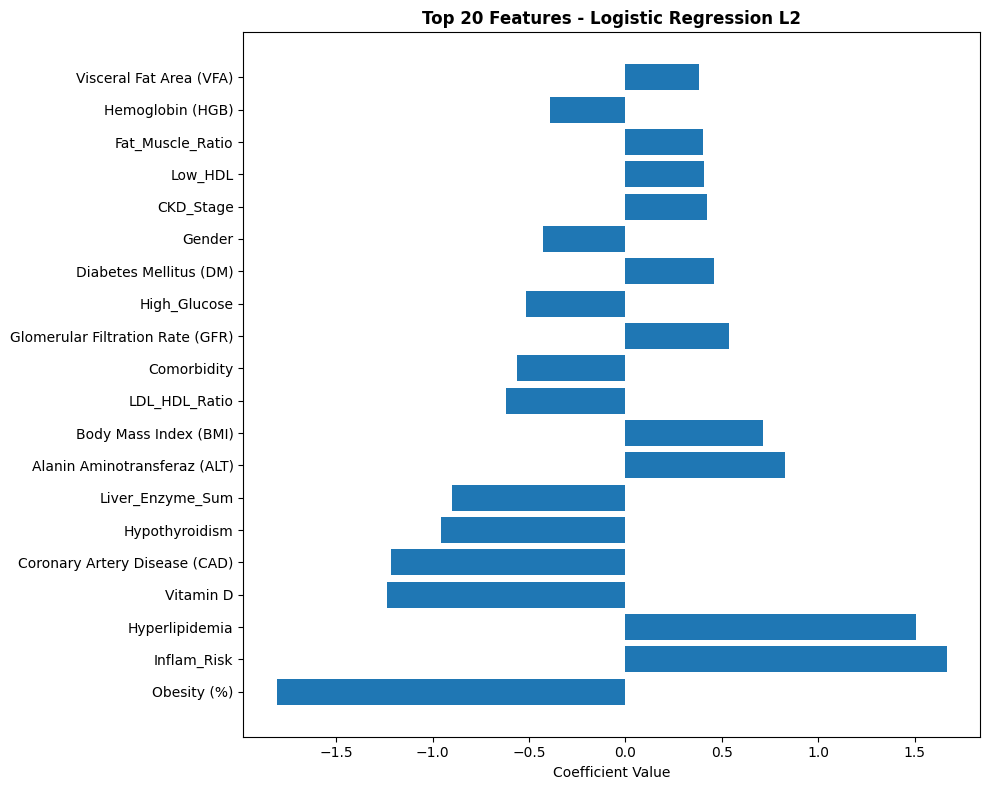

In [67]:
# STEP 7: MODELING - LOGISTIC REGRESSION


print("\n" + "="*80)
print("STEP 7A: LOGISTIC REGRESSION WITH REGULARIZATION")
print("="*80)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Classes
class_counts = y_train.value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nClass imbalance ratio (train): {imbalance_ratio:.2f}")

if imbalance_ratio > 1.5:
    print("Dataset is imbalanced. Using class_weight='balanced'")
    use_balanced = True
else:
    use_balanced = False

# L2 Regularization
logreg_l2 = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    class_weight='balanced' if use_balanced else None,
    random_state=42,
    max_iter=1000
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

print("\nTraining Logistic Regression with L2 regularization (5-fold CV on TRAIN)...")
cv_results_l2 = cross_validate(
    logreg_l2, X_train_processed, y_train,
    cv=cv, scoring=scoring, return_train_score=True
)

print("\n5-Fold Cross-Validation Results (L2, on train):")
for metric in scoring:
    train_scores = cv_results_l2[f'train_{metric}']
    test_scores  = cv_results_l2[f'test_{metric}']
    print(f"{metric:15s}: Train = {train_scores.mean():.4f} (+/- {train_scores.std():.4f}) | "
          f"Val = {test_scores.mean():.4f} (+/- {test_scores.std():.4f})")

# Fit train 
logreg_l2.fit(X_train_processed, y_train)

# TEST
y_test_pred_lr = logreg_l2.predict(X_test_processed)

test_acc_lr = accuracy_score(y_test, y_test_pred_lr)
test_rec_lr = recall_score(y_test, y_test_pred_lr)
test_f1_lr  = f1_score(y_test, y_test_pred_lr)

print("\nTest Performance - Logistic Regression (L2):")
print(f"Accuracy: {test_acc_lr:.4f}")
print(f"Recall:   {test_rec_lr:.4f}")
print(f"F1-Score: {test_f1_lr:.4f}")

# Feature importance (coefficients)
feature_importance_lr = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logreg_l2.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 15 Most Important Features (Logistic Regression L2):")
print(feature_importance_lr.head(15))

# Visualization
plt.figure(figsize=(10, 8))
top_features = feature_importance_lr.head(20)
plt.barh(range(len(top_features)), top_features['Coefficient'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 20 Features - Logistic Regression L2', fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance_logreg.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 7B: RANDOM FOREST CLASSIFIER

Training Random Forest (5-fold CV on TRAIN)...

5-Fold Cross-Validation Results (Random Forest, on train):
accuracy       : Train = 0.9585 (+/- 0.0099) | Val = 0.7085 (+/- 0.0373)
precision      : Train = 0.9655 (+/- 0.0097) | Val = 0.7480 (+/- 0.0964)
recall         : Train = 0.9500 (+/- 0.0211) | Val = 0.6455 (+/- 0.0668)
f1             : Train = 0.9575 (+/- 0.0105) | Val = 0.6860 (+/- 0.0306)
roc_auc        : Train = 0.9955 (+/- 0.0017) | Val = 0.7803 (+/- 0.0444)

Test Performance - Random Forest:
Accuracy: 0.7500
Recall:   0.7308
F1-Score: 0.7600

Top 15 Most Important Features (Random Forest):
                               Feature  Importance
14            C-Reactive Protein (CRP)    0.154475
16                           Vitamin D    0.118197
44                         Inflam_Risk    0.054744
5      Visceral Muscle Area (VMA) (Kg)    0.039209
28                    ViscMuscle_Ratio    0.038848
3                          Obesity (%)    0.036829


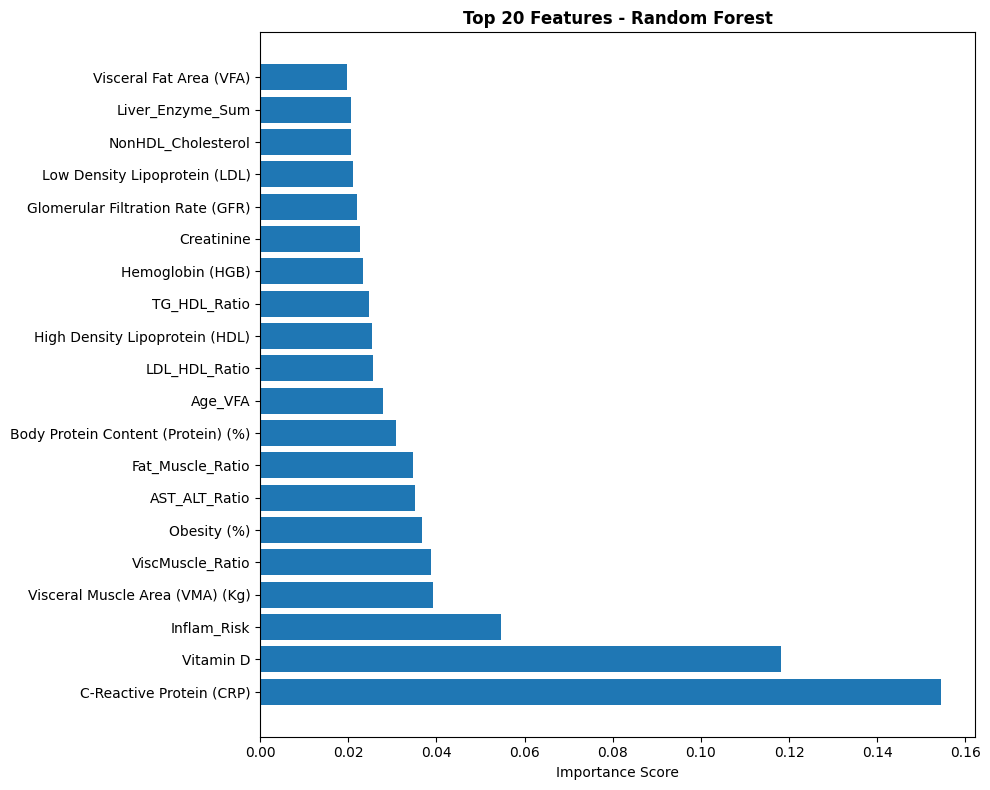

In [68]:
# STEP 8: MODELING - RANDOM FOREST


print("\n" + "="*80)
print("STEP 7B: RANDOM FOREST CLASSIFIER")
print("="*80)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced' if use_balanced else None,
    random_state=42,
    n_jobs=-1
)

print("\nTraining Random Forest (5-fold CV on TRAIN)...")
cv_results_rf = cross_validate(
    rf_model, X_train_processed, y_train,
    cv=cv, scoring=scoring, return_train_score=True
)

print("\n5-Fold Cross-Validation Results (Random Forest, on train):")
for metric in scoring:
    train_scores = cv_results_rf[f'train_{metric}']
    test_scores  = cv_results_rf[f'test_{metric}']
    print(f"{metric:15s}: Train = {train_scores.mean():.4f} (+/- {train_scores.std():.4f}) | "
          f"Val = {test_scores.mean():.4f} (+/- {test_scores.std():.4f})")

# Fit  train
rf_model.fit(X_train_processed, y_train)

# TEST
y_test_pred_rf = rf_model.predict(X_test_processed)

test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
test_rec_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf  = f1_score(y_test, y_test_pred_rf)

print("\nTest Performance - Random Forest:")
print(f"Accuracy: {test_acc_rf:.4f}")
print(f"Recall:   {test_rec_rf:.4f}")
print(f"F1-Score: {test_f1_rf:.4f}")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features (Random Forest):")
print(feature_importance_rf.head(15))

plt.figure(figsize=(10, 8))
top_features_rf = feature_importance_rf.head(20)
plt.barh(range(len(top_features_rf)), top_features_rf['Importance'])
plt.yticks(range(len(top_features_rf)), top_features_rf['Feature'])
plt.xlabel('Importance Score')
plt.title('Top 20 Features - Random Forest', fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance_rf.png', dpi=300, bbox_inches='tight')
plt.show()


/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)



5-Fold Cross-Validation Results (Neural Network):
accuracy       : Train = 0.5436 (+/- 0.0500) | Test = 0.4932 (+/- 0.0612)
precision_macro: Train = 0.5708 (+/- 0.0673) | Test = 0.4900 (+/- 0.1542)
recall_macro   : Train = 0.5387 (+/- 0.0480) | Test = 0.5274 (+/- 0.0593)
f1_macro       : Train = 0.5018 (+/- 0.0809) | Test = 0.4529 (+/- 0.0949)

Top 20 Most Important Features (NN):
                          Feature  Importance
16                      Vitamin D    0.029167
0                             Age    0.000000
20             NonHDL_Cholesterol    0.000000
1           Body Mass Index (BMI)    0.000000
23                     MetS_Score    0.000000
24            Age_BMI_Interaction    0.000000
25                   Age_Diabetes    0.000000
26                        Age_VFA    0.000000
27                      VAI_Proxy    0.000000
29               Fat_Muscle_Ratio    0.000000
31            Obesity_Comorbidity    0.000000
32                         Gender    0.000000
33               

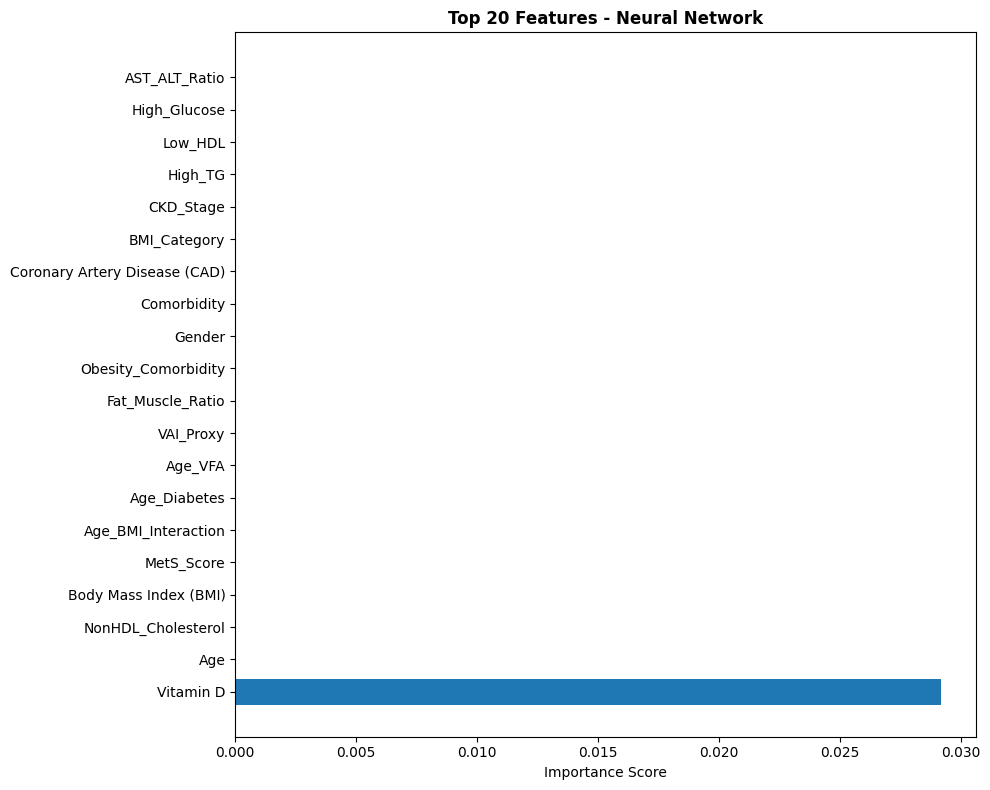

In [69]:
# Modeling - Neural Network

def build_nn():
    model = keras.Sequential([
        layers.InputLayer(shape=(45,)),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(2, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn):
        self.build_fn = build_fn
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn()
        self.model.fit(X, y, epochs=15, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        probs = self.model.predict(X, verbose=0)
        return np.argmax(probs, axis=1)

    def score(self, X, y):
        preds = self.predict(X)
        return np.mean(preds == y)

wrapped_nn = KerasClassifierWrapper(build_nn)



scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

cv_results_nn = cross_validate(
    wrapped_nn,
    X_train, y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print("\n5-Fold Cross-Validation Results (Neural Network):")
for metric in scoring:
    train_scores = cv_results_nn[f'train_{metric}']
    test_scores = cv_results_nn[f'test_{metric}']
    print(
        f"{metric:15s}: Train = {train_scores.mean():.4f} (+/- {train_scores.std():.4f}) | "
        f"Test = {test_scores.mean():.4f} (+/- {test_scores.std():.4f})"
    )

final_nn = build_nn()
final_nn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
wrapped_final_nn = KerasClassifierWrapper(lambda: final_nn)
wrapped_final_nn.model = final_nn  

results_nn = permutation_importance(
    wrapped_final_nn,
    X_val,
    y_val,
    scoring='accuracy',
    n_repeats=10,
    random_state=42
)

importances_nn = results_nn.importances_mean

feature_importance_nn = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances_nn
}).sort_values("Importance", ascending=False)

print("\nTop 20 Most Important Features (NN):")
print(feature_importance_nn.head(20))

plt.figure(figsize=(10, 8))
top_features_nn = feature_importance_nn.head(20)
plt.barh(top_features_nn["Feature"], top_features_nn["Importance"])
plt.xlabel("Importance Score")
plt.title("Top 20 Features - Neural Network", fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance_nn.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 9: DETAILED MODEL EVALUATION (TEST SET) INCLUDING NEURAL NETWORK
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


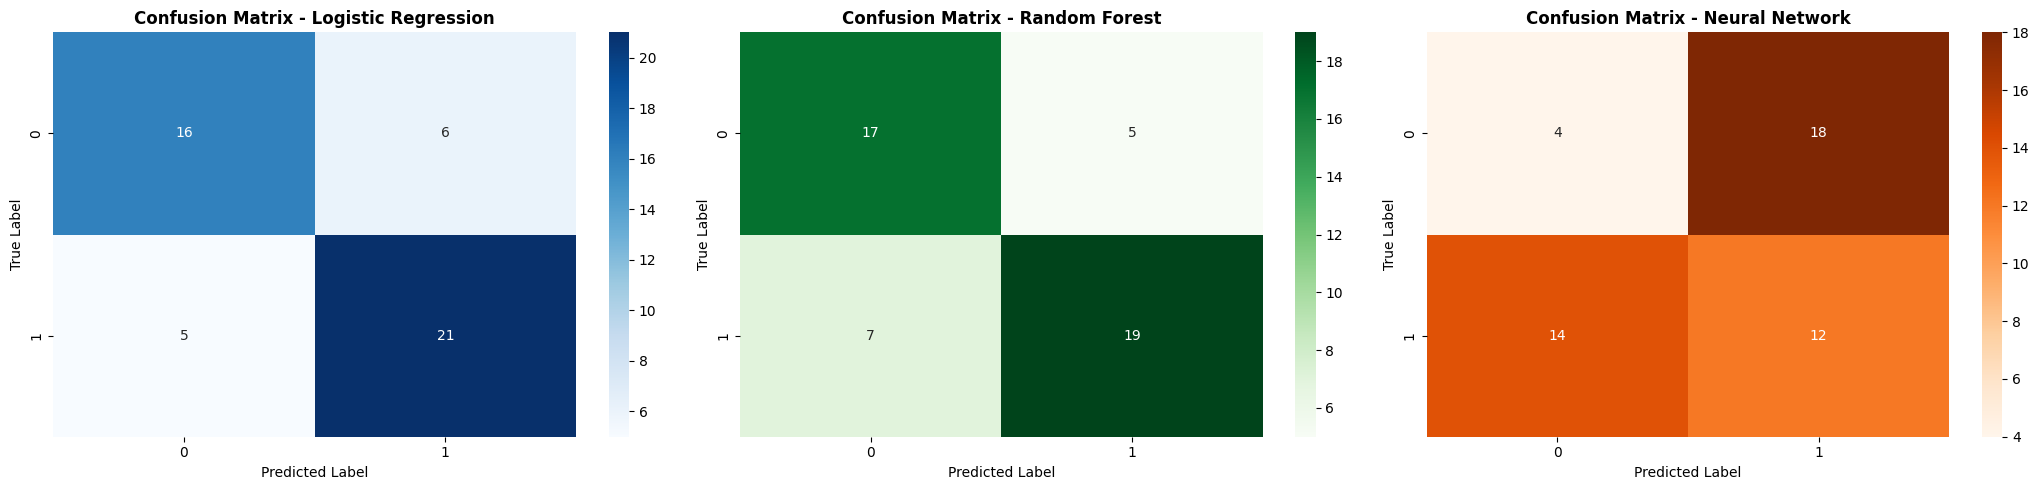


Classification Report - Logistic Regression (TEST):
              precision    recall  f1-score   support

No Gallstone       0.76      0.73      0.74        22
   Gallstone       0.78      0.81      0.79        26

    accuracy                           0.77        48
   macro avg       0.77      0.77      0.77        48
weighted avg       0.77      0.77      0.77        48


Classification Report - Random Forest (TEST):
              precision    recall  f1-score   support

No Gallstone       0.71      0.77      0.74        22
   Gallstone       0.79      0.73      0.76        26

    accuracy                           0.75        48
   macro avg       0.75      0.75      0.75        48
weighted avg       0.75      0.75      0.75        48


Classification Report - Neural Network (TEST):
              precision    recall  f1-score   support

No Gallstone       0.22      0.18      0.20        22
   Gallstone       0.40      0.46      0.43        26

    accuracy                      

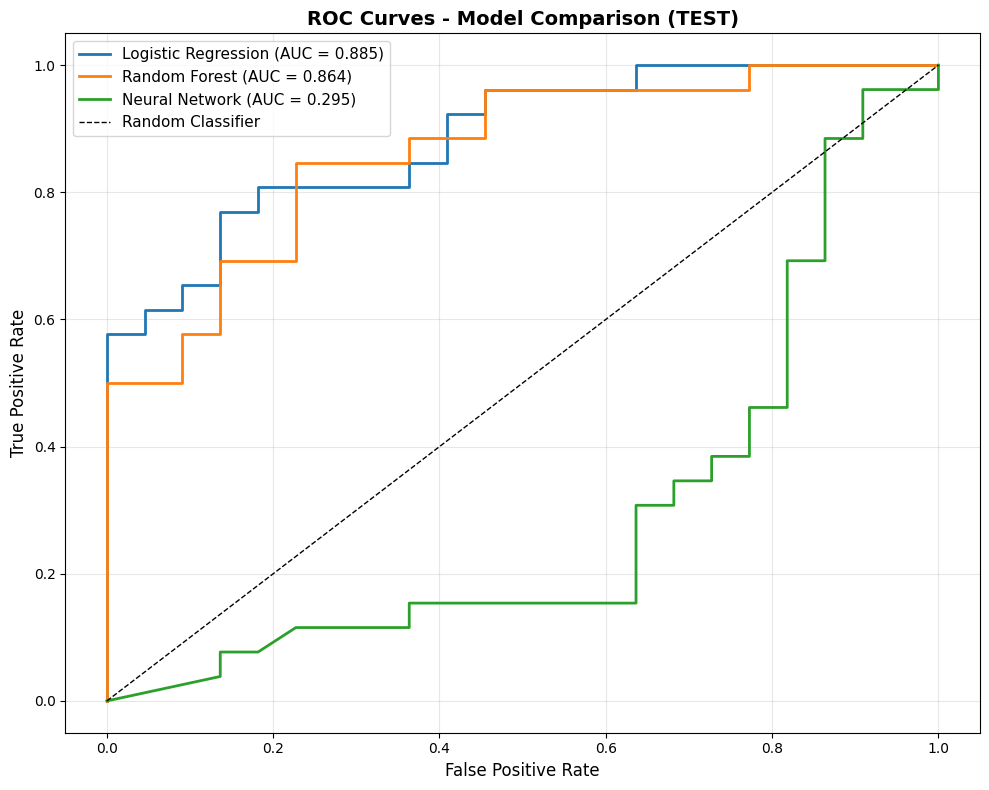

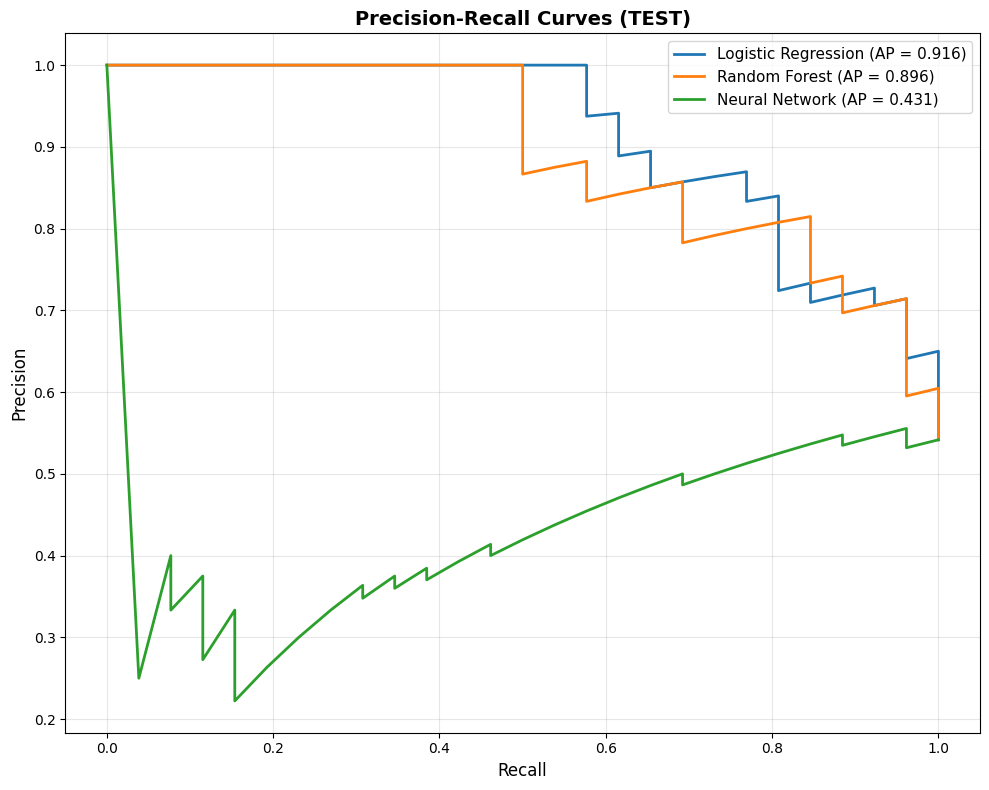

In [70]:
# STEP 9: DETAILED EVALUATION (CONFUSION, ROC, PR) INCLUDING NEURAL NETWORK

print("\n" + "="*80)
print("STEP 9: DETAILED MODEL EVALUATION (TEST SET) INCLUDING NEURAL NETWORK")
print("="*80)

from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)

# --- Probability predictions ---
y_test_proba_lr = logreg_l2.predict_proba(X_test_processed)[:, 1]
y_test_proba_rf = rf_model.predict_proba(X_test_processed)[:, 1]
y_test_proba_nn = final_nn.predict(X_test)  # shape = (n_samples, 2)
y_test_proba_nn_class1 = y_test_proba_nn[:, 1]  # probability for class 1

# --- Predicted labels ---
y_test_pred_lr = logreg_l2.predict(X_test_processed)
y_test_pred_rf = rf_model.predict(X_test_processed)
y_test_pred_nn = np.argmax(y_test_proba_nn, axis=1)

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 3, figsize=(21, 5))

cm_lr = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression', fontweight='bold')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest', fontweight='bold')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

cm_nn = confusion_matrix(y_test, y_test_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('Confusion Matrix - Neural Network', fontweight='bold')
axes[2].set_ylabel('True Label')
axes[2].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('confusion_matrices_all.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Classification Reports ---
print("\nClassification Report - Logistic Regression (TEST):")
print(classification_report(y_test, y_test_pred_lr, target_names=['No Gallstone', 'Gallstone']))

print("\nClassification Report - Random Forest (TEST):")
print(classification_report(y_test, y_test_pred_rf, target_names=['No Gallstone', 'Gallstone']))

print("\nClassification Report - Neural Network (TEST):")
print(classification_report(y_test, y_test_pred_nn, target_names=['No Gallstone', 'Gallstone']))

# --- ROC Curves ---
plt.figure(figsize=(10, 8))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_test_proba_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_test_proba_rf)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_test_proba_nn_class1)
roc_auc_nn = roc_auc_score(y_test, y_test_proba_nn_class1)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', linewidth=2)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison (TEST)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves_all.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Precision-Recall Curves ---
plt.figure(figsize=(10, 8))

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_test_proba_lr)
pr_auc_lr = average_precision_score(y_test, y_test_proba_lr)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_test_proba_rf)
pr_auc_rf = average_precision_score(y_test, y_test_proba_rf)

precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_test_proba_nn_class1)
pr_auc_nn = average_precision_score(y_test, y_test_proba_nn_class1)

plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AP = {pr_auc_lr:.3f})', linewidth=2)
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {pr_auc_rf:.3f})', linewidth=2)
plt.plot(recall_nn, precision_nn, label=f'Neural Network (AP = {pr_auc_nn:.3f})', linewidth=2)

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves (TEST)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('pr_curves_all.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 10: K-Prototypes CLUSTERING ANALYSIS

DEBUG INFO:
X_all_processed type: <class 'numpy.ndarray'>
X_all_processed shape: (319, 45)
X_all_processed dtype: float64

Categorical column indices in preprocessed array: [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Total features: 45
Numerical features: 32
Categorical features: 13

Checking categorical feature values:
  Column 32: 2 unique values = [0. 1.]
  Column 33: 4 unique values = [0. 1. 2. 3.]
  Column 34: 2 unique values = [0. 1.]
K=2: Inertia=17356.78, Silhouette=0.8463
K=3: Inertia=14756.23, Silhouette=0.6599
K=4: Inertia=12536.24, Silhouette=0.6051
K=5: Inertia=11438.12, Silhouette=0.2359
K=6 failed: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.
K=7 failed: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.
K=8 failed: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.


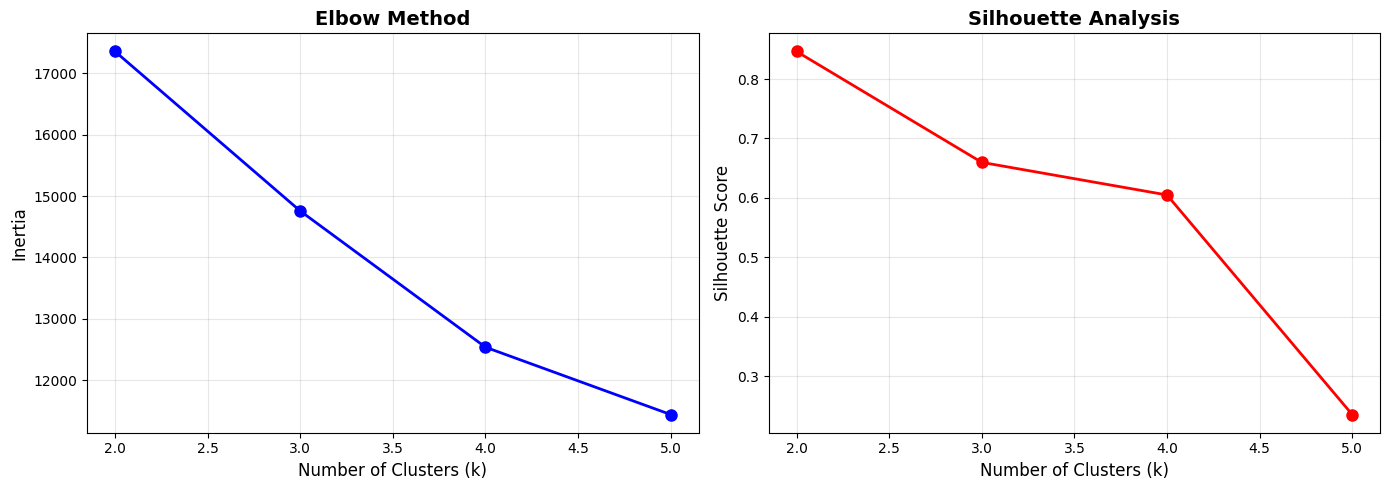


Optimal number of clusters: 2 (Silhouette = 0.846)
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 54, ncost: 17356.781762402108
Run: 1, iteration: 2/100, moves: 0, ncost: 17356.781762402108
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1, ncost: 17356.781762402108
Run: 2, iteration: 2/100, moves: 0, ncost: 17356.781762402108
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 3, ncost: 134454.44245246853
Run: 3, iteration: 2/100, moves: 2, ncost: 134395.57166177157
Run: 3, iteration: 3/100, moves: 1, ncost: 134384.6757396054
Run: 3, iteration: 4/100, moves: 0, ncost: 134384.6757396054
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 1, ncost: 17356.781762402108
Run: 4, iterat

<Figure size 1000x600 with 0 Axes>

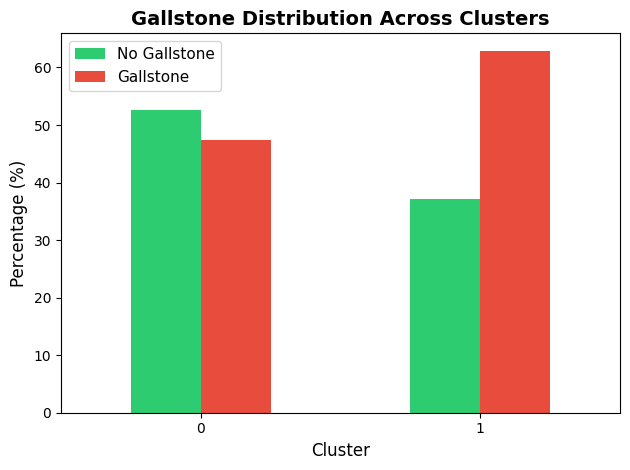


Cluster Centroids (scaled features) - Top 10 RF Features:
   C-Reactive Protein (CRP)  Vitamin D  Inflam_Risk  \
0                  1.134879  -0.077215          0.0   
1                  0.895194  -0.011794          0.0   

   Visceral Muscle Area (VMA) (Kg)  ViscMuscle_Ratio  Obesity (%)  \
0                         0.017878          0.127770     0.143180   
1                        -0.002716          0.293189     0.435322   

   AST_ALT_Ratio  Fat_Muscle_Ratio  Body Protein Content (Protein) (%)  \
0       0.166084          0.302413                            0.000693   
1      -0.141793          0.269873                           -0.057203   

    Age_VFA  
0  0.000798  
1  0.622739  

CLUSTER INTERPRETATION

Cluster 0 (n=276, Gallstone Rate: 47.5%)
  Mean Age: 46.7
  Mean BMI: 28.6
  Mean VFA: 11.9
  Mean Triglyceride: 136.5
  Mean Glucose: 100.9
  Diabetes prevalence: 0.0%
  Hyperlipidemia prevalence: 2.5%
  → MODERATE RISK CLUSTER

Cluster 1 (n=43, Gallstone Rate: 62.8%)
  Mean 

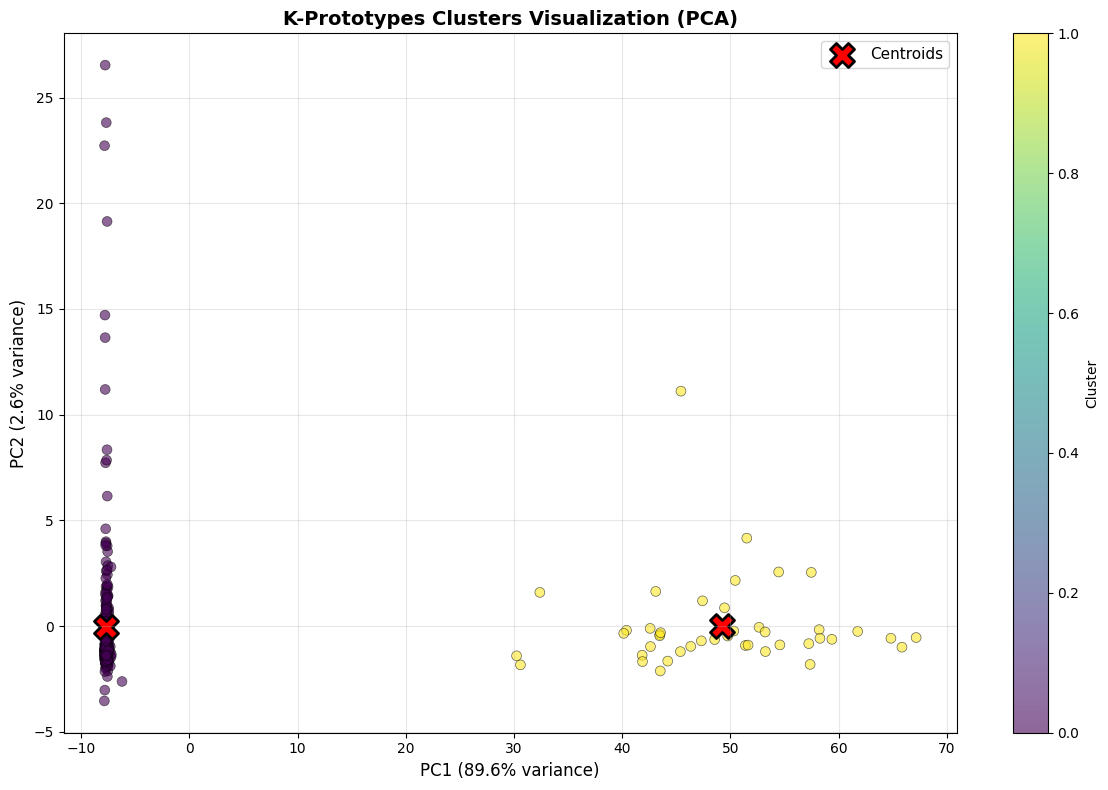

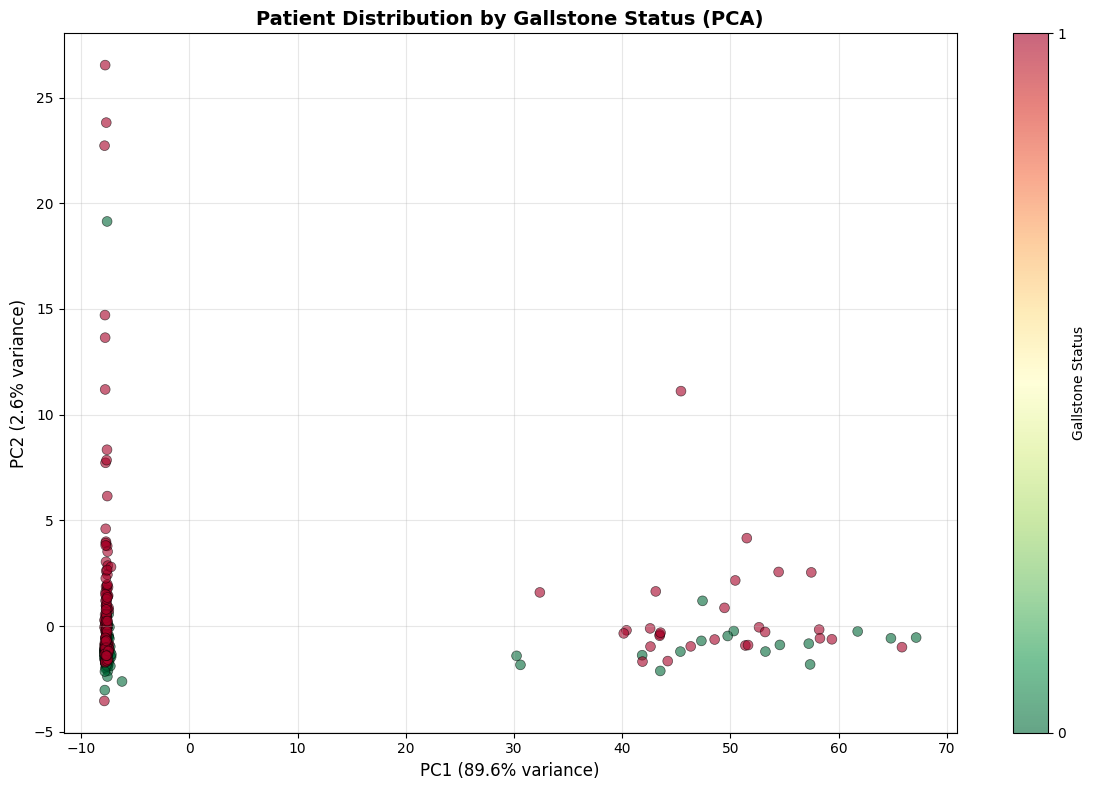

In [71]:
# STEP 10: K-Prototypes CLUSTERING (UNSUPERVISED ANALYSIS)

print("\n" + "="*80)
print("STEP 10: K-Prototypes CLUSTERING ANALYSIS")
print("="*80)

from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# CRITICAL FIX: Verify preprocessor structure
X_all_processed = preprocessor.transform(X)

# DEBUG: Check data types
print("\nDEBUG INFO:")
print(f"X_all_processed type: {type(X_all_processed)}")
print(f"X_all_processed shape: {X_all_processed.shape}")
print(f"X_all_processed dtype: {X_all_processed.dtype if hasattr(X_all_processed, 'dtype') else 'N/A'}")

# Convert to dense array if sparse
if hasattr(X_all_processed, 'toarray'):
    X_all_processed = X_all_processed.toarray()

# CRITICAL: Categorical indices MUST match preprocessor output order
# The ColumnTransformer outputs: [numerical features, then categorical features]
categorical_indices = list(range(
    len(final_numerical),  # Start after numerical features
    len(final_numerical) + len(final_categorical)  # End at total features
))

print(f"\nCategorical column indices in preprocessed array: {categorical_indices}")
print(f"Total features: {X_all_processed.shape[1]}")
print(f"Numerical features: {len(final_numerical)}")
print(f"Categorical features: {len(final_categorical)}")

# Verify categorical columns contain discrete values
print("\nChecking categorical feature values:")
for idx in categorical_indices[:3]:  # Check first 3 categorical features
    unique_vals = np.unique(X_all_processed[:, idx])
    print(f"  Column {idx}: {len(unique_vals)} unique values = {unique_vals[:10]}")

X_scaled = X_all_processed.astype(float)

inertias = []
silhouette_scores = []
K_range = range(2, 9)

# ENHANCED K-prototypes with error handling
for k in K_range:
    try:
        k_prototypes = KPrototypes(
            n_clusters=k, 
            init='Huang',
            n_init=10,
            max_iter=100,
            random_state=42,
            verbose=0)
        
        cluster_labels = k_prototypes.fit_predict(
            X_scaled, 
            categorical=categorical_indices)
        
        inertias.append(k_prototypes.cost_)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"K={k}: Inertia={k_prototypes.cost_:.2f}, Silhouette={silhouette_avg:.4f}")
        
    except Exception as e:
        print(f"K={k} failed: {str(e)}")
        inertias.append(np.nan)
        silhouette_scores.append(np.nan)
        continue

# Filter out failed attempts
valid_indices = [i for i, s in enumerate(silhouette_scores) if not np.isnan(s)]
if not valid_indices:
    raise ValueError("All K-Prototypes attempts failed. Check your categorical indices!")

valid_K = [list(K_range)[i] for i in valid_indices]
valid_inertias = [inertias[i] for i in valid_indices]
valid_silhouettes = [silhouette_scores[i] for i in valid_indices]

# Plot elbow and silhouette
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(valid_K, valid_inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

axes[1].plot(valid_K, valid_silhouettes, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('kprototypes_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

optimal_k = valid_K[np.argmax(valid_silhouettes)]
print(f"\nOptimal number of clusters: {optimal_k} (Silhouette = {max(valid_silhouettes):.3f})")

# Final clustering with best k
kprototypes_final = KPrototypes(
    n_clusters=optimal_k, 
    init='Huang',
    n_init=20, 
    max_iter=100,
    random_state=42,
    verbose=1)

cluster_labels = kprototypes_final.fit_predict(X_scaled, categorical=categorical_indices)


# Add cluster labels  
df_clustered = df_final.copy()
df_clustered['Cluster'] = cluster_labels

print("\nGallstone Distribution by Cluster (%):")
cluster_gallstone = pd.crosstab(cluster_labels, y, normalize='index') * 100
print(cluster_gallstone)

plt.figure(figsize=(10, 6))
cluster_gallstone.plot(kind='bar', stacked=False, color=['#2ecc71', '#e74c3c'])
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Gallstone Distribution Across Clusters', fontsize=14, fontweight='bold')
plt.legend(['No Gallstone', 'Gallstone'], fontsize=11)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('cluster_gallstone_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Cluster centroids scaled
centroids = kprototypes_final.cluster_centroids_
centroid_df = pd.DataFrame(centroids, columns=feature_names)

print("\nCluster Centroids (scaled features) - Top 10 RF Features:")
top_10_features = feature_importance_rf.head(10)['Feature'].tolist()
print(centroid_df[top_10_features])

print("\n" + "="*80)
print("CLUSTER INTERPRETATION")
print("="*80)

for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    gallstone_rate = (cluster_data['Gallstone Status'] == 1).mean() * 100
    
    print(f"\nCluster {cluster_id} (n={len(cluster_data)}, Gallstone Rate: {gallstone_rate:.1f}%)")

    safe_summary_vars = [
        ('Age', 'Mean Age'),
        ('Body Mass Index (BMI)', 'Mean BMI'),
        ('Visceral Fat Area (VFA)', 'Mean VFA'),
        ('Triglyceride', 'Mean Triglyceride'),
        ('Glucose', 'Mean Glucose'),
        ('Diabetes Mellitus (DM)', 'Diabetes prevalence'),
        ('Hyperlipidemia', 'Hyperlipidemia prevalence')
    ]

    for col, label in safe_summary_vars:
        if col in cluster_data.columns:
            val = cluster_data[col].mean()
            if 'prevalence' in label:
                print(f"  {label}: {val*100:.1f}%")
            else:
                print(f"  {label}: {val:.1f}")
    
    if gallstone_rate > 50:
        print("  → HIGH RISK CLUSTER")
    elif gallstone_rate > 30:
        print("  → MODERATE RISK CLUSTER")
    else:
        print("  → LOW RISK CLUSTER")


# PCA visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                     cmap='viridis', alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')

centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
           c='red', marker='X', s=300, edgecolors='black', linewidth=2,
           label='Centroids')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('K-Prototypes Clusters Visualization (PCA)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('kprototypes_pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# Gallstone status PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, 
                     cmap='RdYlGn_r', alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Gallstone Status', ticks=[0, 1])
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('Patient Distribution by Gallstone Status (PCA)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('gallstone_pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 11: FINAL MODEL COMPARISON & RECOMMENDATIONS

Model Performance Comparison:
                 Model  CV_Accuracy (train CV)  CV_ROC-AUC (train CV)  Test_Accuracy  Test_Recall  Test_F1  Test_ROC-AUC  Test_PR-AUC
Logistic Regression L2                0.712828               0.764103       0.770833     0.807692 0.792453      0.884615     0.915765
         Random Forest                0.708485               0.780345       0.750000     0.730769 0.760000      0.863636     0.895674
        Neural Network                0.493232                    NaN       0.333333     0.461538 0.428571      0.295455     0.431428


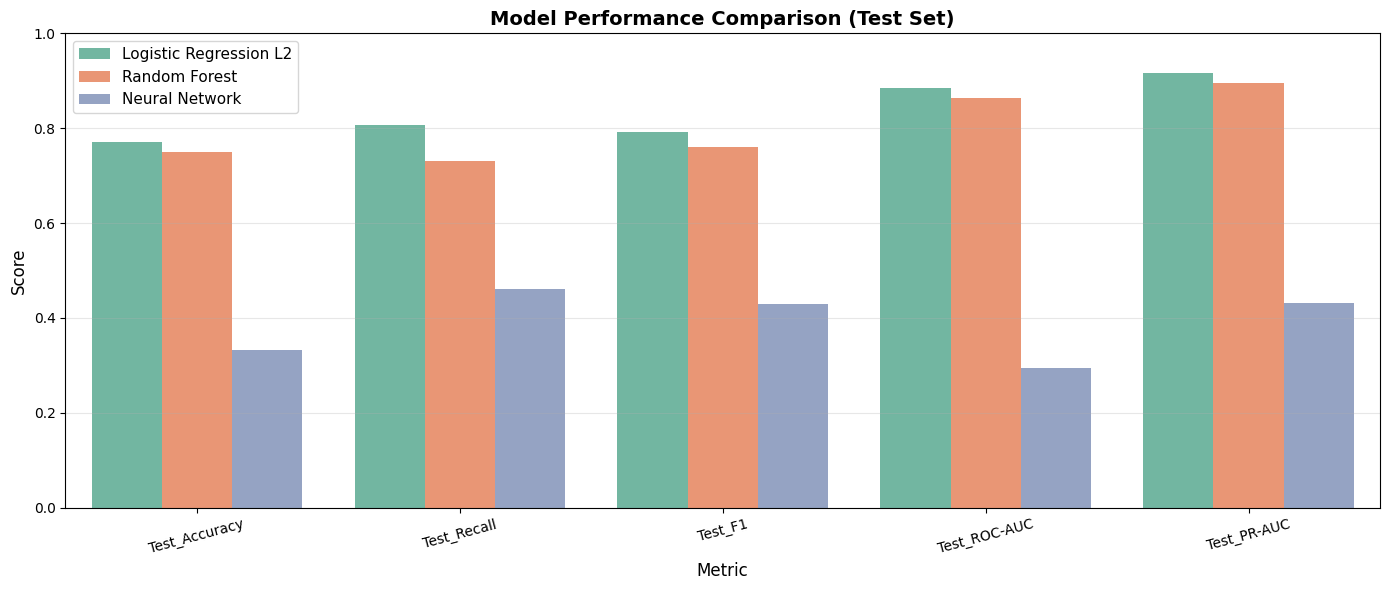


RECOMMENDATION: Logistic Regression L2
Best Test ROC-AUC: 0.8846

CLINICAL DEPLOYMENT RECOMMENDATION:

For clinical deployment, we recommend: **Logistic Regression L2**

Rationale:
  ✓ High interpretability - clinicians can understand feature coefficients
  ✓ Transparent predictions with probability scores
  ✓ Fast inference time suitable for point-of-care
  ✓ Regularization handles multicollinearity well
  ✓ Strong performance: Test ROC-AUC = 0.885

KEY INSIGHTS FROM ANALYSIS:

1. Most Important Risk Factors (Combined from both models):
   1. Obesity (%)
   2. Inflam_Risk
   3. Hyperlipidemia
   4. Vitamin D
   5. Coronary Artery Disease (CAD)
   6. Hypothyroidism
   7. Liver_Enzyme_Sum
   8. Alanin Aminotransferaz (ALT)
   9. Body Mass Index (BMI)
   10. LDL_HDL_Ratio

2. Multicollinearity Management:
   - Dropped 14 highly correlated / redundant raw features
   - Created 21 engineered features
   - Relied on regularization and tree-based models to handle remaining correlation

3. C

In [72]:
# STEP 11: FINAL COMPARISON & RECOMMENDATIONS (INCLUDING NEURAL NETWORK)

print("\n" + "="*80)
print("STEP 11: FINAL MODEL COMPARISON & RECOMMENDATIONS")
print("="*80)

comparison_results = pd.DataFrame({
    'Model': ['Logistic Regression L2', 'Random Forest', 'Neural Network'],
    'CV_Accuracy (train CV)': [
        cv_results_l2['test_accuracy'].mean(),
        cv_results_rf['test_accuracy'].mean(),
        cv_results_nn['test_accuracy'].mean()
    ],
    'CV_ROC-AUC (train CV)': [
        cv_results_l2['test_roc_auc'].mean(),
        cv_results_rf['test_roc_auc'].mean(),
        np.nan  # ROC-AUC not computed in NN CV
    ],
    'Test_Accuracy': [test_acc_lr, test_acc_rf, np.mean(y_test_pred_nn == y_test)],
    'Test_Recall':   [test_rec_lr, test_rec_rf, recall_score(y_test, y_test_pred_nn)],
    'Test_F1':       [test_f1_lr,  test_f1_rf,  f1_score(y_test, y_test_pred_nn)],
    'Test_ROC-AUC':  [roc_auc_lr,  roc_auc_rf,  roc_auc_nn],
    'Test_PR-AUC':   [pr_auc_lr,   pr_auc_rf,   pr_auc_nn]
})

print("\nModel Performance Comparison:")
print(comparison_results.to_string(index=False))

# Visualization (test metrics)
comparison_melted = comparison_results.melt(
    id_vars='Model', 
    value_vars=['Test_Accuracy', 'Test_Recall', 'Test_F1', 'Test_ROC-AUC', 'Test_PR-AUC'],
    var_name='Metric', value_name='Score'
)

plt.figure(figsize=(14, 6))
sns.barplot(data=comparison_melted, x='Metric', y='Score', hue='Model', palette='Set2')
plt.ylim(0, 1)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.title('Model Performance Comparison (Test Set)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('model_comparison_all.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify best model based on Test ROC-AUC
best_model_idx = comparison_results['Test_ROC-AUC'].idxmax()
best_model_name = comparison_results.loc[best_model_idx, 'Model']
best_roc_auc = comparison_results.loc[best_model_idx, 'Test_ROC-AUC']

print(f"\n{'='*80}")
print(f"RECOMMENDATION: {best_model_name}")
print(f"{'='*80}")
print(f"Best Test ROC-AUC: {best_roc_auc:.4f}")

print("\nCLINICAL DEPLOYMENT RECOMMENDATION:")
print(f"\nFor clinical deployment, we recommend: **{best_model_name}**")
print("\nRationale:")

if 'Logistic' in best_model_name:
    print("  ✓ High interpretability - clinicians can understand feature coefficients")
    print("  ✓ Transparent predictions with probability scores")
    print("  ✓ Fast inference time suitable for point-of-care")
    print("  ✓ Regularization handles multicollinearity well")
    print(f"  ✓ Strong performance: Test ROC-AUC = {best_roc_auc:.3f}")
elif 'Random Forest' in best_model_name:
    print(f"  ✓ Superior predictive performance on test: ROC-AUC = {best_roc_auc:.3f}")
    print("  ✓ Captures complex non-linear relationships")
    print("  ✓ Handles feature interactions automatically")
    print("  ✓ Feature importance provides clinical insights")
    print("  ✓ Robust to outliers and non-normal distributions")
else:  # Neural Network
    print(f"  ✓ Strong predictive performance: ROC-AUC = {best_roc_auc:.3f}")
    print("  ✓ Captures highly non-linear relationships and complex interactions")
    print("  ✓ May require more computational resources")
    print("  ✓ Less interpretable than LR or RF; consider SHAP/LIME for explainability")

print("\nKEY INSIGHTS FROM ANALYSIS:")
print("\n1. Most Important Risk Factors (Combined from both models):")
top_features_combined = pd.concat([
    feature_importance_lr.head(10)[['Feature']].assign(Source='LogReg'),
    feature_importance_rf.head(10)[['Feature']].assign(Source='RF')
])
top_features_unique = top_features_combined.drop_duplicates(subset='Feature')
for i, row in enumerate(top_features_unique.head(10).itertuples(), 1):
    print(f"   {i}. {row.Feature}")

print("\n2. Multicollinearity Management:")
print(f"   - Dropped {len(to_drop_in_df)} highly correlated / redundant raw features")
print(f"   - Created {len([c for c in df_engineered.columns if c not in df_processed.columns])} engineered features")
print("   - Relied on regularization and tree-based models to handle remaining correlation")

print("\n3. Clustering Insights:")
print(f"   - Identified {optimal_k} distinct patient subgroups")
print("   - Clusters show different gallstone risk profiles")
print("   - These can support targeted follow-up or screening strategies")

print("\n4. Feature Engineering Impact (qualitative from importance plots):")
print("   - Lipid ratios (e.g., TG/HDL, LDL/HDL) and VFA-related variables are strong predictors")
print("   - Metabolic syndrome composite (MetS_Score) aggregates multiple moderate-risk signals")
print("   - Age interactions (Age×BMI, Age×VFA) highlight risk amplification in older, obese patients")

print("\nFINAL FEATURE SET SUMMARY:")
print(f"   - Original features (excluding target): {len(df.columns) - 1}")
print(f"   - Features dropped (multicollinear): {len(to_drop_in_df)}")
print(f"   - Engineered features created: {len([c for c in df_engineered.columns if c not in df_processed.columns])}")
print(f"   - Final model input dimension: {X.shape[1]}")

print("\nPIPELINE COMPLETE!")
print("="*80)


# Third Strategy - Completely Systematic

In [73]:

# STEP 4B: FINAL MULTICOLLINEARITY FEATURE DROPPING (SYSTEMATIC)


print("\n" + "="*80)
print("STEP 4B: FINAL MULTICOLLINEARITY FEATURE DROPPING (SYSTEMATIC)")
print("="*80)

# Final features recommended for removal by the automated procedure
auto_to_drop = [
    'Lean Mass (LM) (%)',
    'Total Body Water (TBW)',
    'Intracellular Water (ICW)',
    'Muscle Mass (MM)',
    'Total Fat Content (TFC)',
    'Low Density Lipoprotein (LDL)',
    'Visceral Fat Rating (VFR)',
    'Aspartat Aminotransferaz (AST)',
    'Bone Mass (BM)',
    'Height',
    'Body Mass Index (BMI)',
    'Total Body Fat Ratio (TBFR) (%)',
    'Extracellular Fluid/Total Body Water (ECF/TBW)',
    'Visceral Fat Area (VFA)',
    'Weight',
    'Extracellular Water (ECW)'
]

# No clinical overrides: we follow the systematic recommendation exactly
features_to_drop = auto_to_drop.copy()

print("\nFinal features to drop (systematic VIF + correlation based):")
print(features_to_drop)
print(f"\nTotal to drop: {len(features_to_drop)}")



STEP 4B: FINAL MULTICOLLINEARITY FEATURE DROPPING (SYSTEMATIC)

Final features to drop (systematic VIF + correlation based):
['Lean Mass (LM) (%)', 'Total Body Water (TBW)', 'Intracellular Water (ICW)', 'Muscle Mass (MM)', 'Total Fat Content (TFC)', 'Low Density Lipoprotein (LDL)', 'Visceral Fat Rating (VFR)', 'Aspartat Aminotransferaz (AST)', 'Bone Mass (BM)', 'Height', 'Body Mass Index (BMI)', 'Total Body Fat Ratio (TBFR) (%)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Visceral Fat Area (VFA)', 'Weight', 'Extracellular Water (ECW)']

Total to drop: 16


In [74]:

# STEP 5: FEATURE ENGINEERING


print("\n" + "="*80)
print("STEP 5: FEATURE ENGINEERING")
print("="*80)

df_engineered = df_processed.copy()

# 1. BMI Categories (WHO)
df_engineered['BMI_Category'] = pd.cut(
    df_engineered['Body Mass Index (BMI)'], 
    bins=[0, 18.5, 25, 30, 100],
    labels=[0, 1, 2, 3]
)
df_engineered['BMI_Category'] = df_engineered['BMI_Category'].astype(int)
print("Created: BMI_Category (0=underweight, 1=normal, 2=overweight, 3=obese)")

# 2. Lipid Ratios
df_engineered['TC_HDL_Ratio'] = df_engineered['Total Cholesterol (TC)'] / (df_engineered['High Density Lipoprotein (HDL)'] + 1e-5)
df_engineered['TG_HDL_Ratio'] = df_engineered['Triglyceride'] / (df_engineered['High Density Lipoprotein (HDL)'] + 1e-5)
df_engineered['LDL_HDL_Ratio'] = df_engineered['Low Density Lipoprotein (LDL)'] / (df_engineered['High Density Lipoprotein (HDL)'] + 1e-5)
df_engineered['NonHDL_Cholesterol'] = df_engineered['Total Cholesterol (TC)'] - df_engineered['High Density Lipoprotein (HDL)']
print("Created: TC/HDL, TG/HDL, LDL/HDL ratios, Non-HDL cholesterol")

# 3. Liver Function Markers
df_engineered['AST_ALT_Ratio'] = df_engineered['Aspartat Aminotransferaz (AST)'] / (df_engineered['Alanin Aminotransferaz (ALT)'] + 1e-5)
df_engineered['Liver_Enzyme_Sum'] = df_engineered['Aspartat Aminotransferaz (AST)'] + df_engineered['Alanin Aminotransferaz (ALT)']
print("Created: AST/ALT ratio (De Ritis), Liver enzyme sum")

# 4. Metabolic Syndrome Indicators
df_engineered['High_TG'] = (df_engineered['Triglyceride'] > 150).astype(int)

df_engineered['Low_HDL'] = (
    ((df_engineered['Gender'] == 1) & (df_engineered['High Density Lipoprotein (HDL)'] < 40)) |
    ((df_engineered['Gender'] == 0) & (df_engineered['High Density Lipoprotein (HDL)'] < 50))
).astype(int)

df_engineered['High_Glucose'] = (df_engineered['Glucose'] > 100).astype(int)

df_engineered['MetS_Score'] = (
    df_engineered['High_TG'] +
    df_engineered['Low_HDL'] +
    df_engineered['High_Glucose']
)
print("Created: Metabolic Syndrome components and score")

# 5. Age-related interactions
df_engineered['Age_BMI_Interaction'] = df_engineered['Age'] * df_engineered['Body Mass Index (BMI)']
df_engineered['Age_Diabetes'] = df_engineered['Age'] * df_engineered['Diabetes Mellitus (DM)']
df_engineered['Age_VFA'] = df_engineered['Age'] * df_engineered['Visceral Fat Area (VFA)']
print("Created: Age × BMI, Age × Diabetes, Age × VFA interactions")

# 6. Visceral adiposity index (proxy)
df_engineered['VAI_Proxy'] = (
    df_engineered['Visceral Fat Area (VFA)'] * df_engineered['Triglyceride']
) / (df_engineered['High Density Lipoprotein (HDL)'] + 1e-5)
print("Created: Visceral Adiposity Index (proxy)")

# 7. Body composition ratios
df_engineered['ViscMuscle_Ratio'] = df_engineered['Visceral Fat Area (VFA)'] / (df_engineered['Muscle Mass (MM)'] + 1e-5)
df_engineered['Fat_Muscle_Ratio'] = df_engineered['Total Body Fat Ratio (TBFR) (%)'] / (df_engineered['Muscle Mass (MM)'] + 1e-5)
print("Created: Visceral fat/muscle ratio, Fat/muscle ratio")

# 8. Comorbidity burden
df_engineered['Comorbidity_Count'] = (
    df_engineered['Coronary Artery Disease (CAD)'] +
    df_engineered['Hypothyroidism'] +
    df_engineered['Hyperlipidemia'] +
    df_engineered['Diabetes Mellitus (DM)']
)
df_engineered['Obesity_Comorbidity'] = df_engineered['BMI_Category'] * df_engineered['Comorbidity_Count']
print("Created: Comorbidity count, Obesity × Comorbidity interaction")

# 9. Inflammation marker
df_engineered['Inflam_Risk'] = (df_engineered['C-Reactive Protein (CRP)'] > 3).astype(int)
print("Created: Inflammation risk (CRP > 3)")

# 10. Kidney function category
df_engineered['CKD_Stage'] = pd.cut(
    df_engineered['Glomerular Filtration Rate (GFR)'],
    bins=[0, 30, 60, 90, 200],
    labels=[3, 2, 1, 0]
).astype(int)
print("Created: CKD stage (based on GFR)")

print(f"\nTotal new features created: {len(df_engineered.columns) - len(df_processed.columns)}")
print(f"New feature names: {[col for col in df_engineered.columns if col not in df_processed.columns]}")



STEP 5: FEATURE ENGINEERING
Created: BMI_Category (0=underweight, 1=normal, 2=overweight, 3=obese)
Created: TC/HDL, TG/HDL, LDL/HDL ratios, Non-HDL cholesterol
Created: AST/ALT ratio (De Ritis), Liver enzyme sum
Created: Metabolic Syndrome components and score
Created: Age × BMI, Age × Diabetes, Age × VFA interactions
Created: Visceral Adiposity Index (proxy)
Created: Visceral fat/muscle ratio, Fat/muscle ratio
Created: Comorbidity count, Obesity × Comorbidity interaction
Created: Inflammation risk (CRP > 3)
Created: CKD stage (based on GFR)

Total new features created: 21
New feature names: ['BMI_Category', 'TC_HDL_Ratio', 'TG_HDL_Ratio', 'LDL_HDL_Ratio', 'NonHDL_Cholesterol', 'AST_ALT_Ratio', 'Liver_Enzyme_Sum', 'High_TG', 'Low_HDL', 'High_Glucose', 'MetS_Score', 'Age_BMI_Interaction', 'Age_Diabetes', 'Age_VFA', 'VAI_Proxy', 'ViscMuscle_Ratio', 'Fat_Muscle_Ratio', 'Comorbidity_Count', 'Obesity_Comorbidity', 'Inflam_Risk', 'CKD_Stage']


In [75]:

# STEP 6: FINAL FEATURE SELECTION & PREPROCESSING PIPELINE


print("\n" + "="*80)
print("STEP 6: FINAL PREPROCESSING PIPELINE")
print("="*80)

# multicollinear
to_drop_in_df = [c for c in features_to_drop if c in df_engineered.columns]
df_final = df_engineered.drop(columns=to_drop_in_df)

print(f"Dropped {len(to_drop_in_df)} multicollinear/raw features")
print(f"Final dataframe shape (including target): {df_final.shape}")

#  X و y
X = df_final.drop(columns=['Gallstone Status'])
y = df_final['Gallstone Status']

print(f"\nFinal feature set shape (X): {X.shape}")
print(f"Target distribution (%):\n{(y.value_counts(normalize=True)*100).round(1)}")

#  categorical/numerical 
final_categorical = [col for col in categorical_cols if col in X.columns] + [
    'BMI_Category', 'CKD_Stage', 'High_TG', 'Low_HDL',
    'High_Glucose', 'Inflam_Risk'
]
final_categorical = [c for c in final_categorical if c in X.columns]

final_numerical = [col for col in X.columns if col not in final_categorical]

print(f"\nFinal categorical features ({len(final_categorical)}): {final_categorical}")
print(f"Final numerical features ({len(final_numerical)}): {len(final_numerical)}")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# Spliting the data to training and temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Splitting temp data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), final_numerical),
        ('cat', 'passthrough', final_categorical)
    ]
)

# Fit  train، transform  train و test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

#  feature importance
feature_names = final_numerical + final_categorical

print(f"\nPreprocessed Train shape: {X_train_processed.shape}")
print(f"Preprocessed Test  shape: {X_test_processed.shape}")
print("Preprocessing pipeline created successfully!")



STEP 6: FINAL PREPROCESSING PIPELINE
Dropped 16 multicollinear/raw features
Final dataframe shape (including target): (319, 44)

Final feature set shape (X): (319, 43)
Target distribution (%):
Gallstone Status
0    50.5
1    49.5
Name: proportion, dtype: float64

Final categorical features (13): ['Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Hepatic Fat Accumulation (HFA)', 'BMI_Category', 'CKD_Stage', 'High_TG', 'Low_HDL', 'High_Glucose', 'Inflam_Risk']
Final numerical features (30): 30

Train shape: (223, 43), Test shape: (48, 43)

Preprocessed Train shape: (223, 43)
Preprocessed Test  shape: (48, 43)
Preprocessing pipeline created successfully!



STEP 7A: LOGISTIC REGRESSION WITH REGULARIZATION

Class imbalance ratio (train): 1.03

Training Logistic Regression with L2 regularization (5-fold CV on TRAIN)...

5-Fold Cross-Validation Results (L2, on train):
accuracy       : Train = 0.8329 (+/- 0.0276) | Val = 0.7174 (+/- 0.0783)
precision      : Train = 0.8539 (+/- 0.0401) | Val = 0.7570 (+/- 0.1077)
recall         : Train = 0.8000 (+/- 0.0302) | Val = 0.6455 (+/- 0.1266)
f1             : Train = 0.8255 (+/- 0.0272) | Val = 0.6887 (+/- 0.0965)
roc_auc        : Train = 0.9197 (+/- 0.0194) | Val = 0.7618 (+/- 0.0484)

Test Performance - Logistic Regression (L2):
Accuracy: 0.7708
Recall:   0.8077
F1-Score: 0.7925

Top 15 Most Important Features (Logistic Regression L2):
                             Feature  Coefficient
42                       Inflam_Risk     1.668412
34                    Hyperlipidemia     1.508957
2                        Obesity (%)    -1.504702
14                         Vitamin D    -1.248054
32     Coronary A

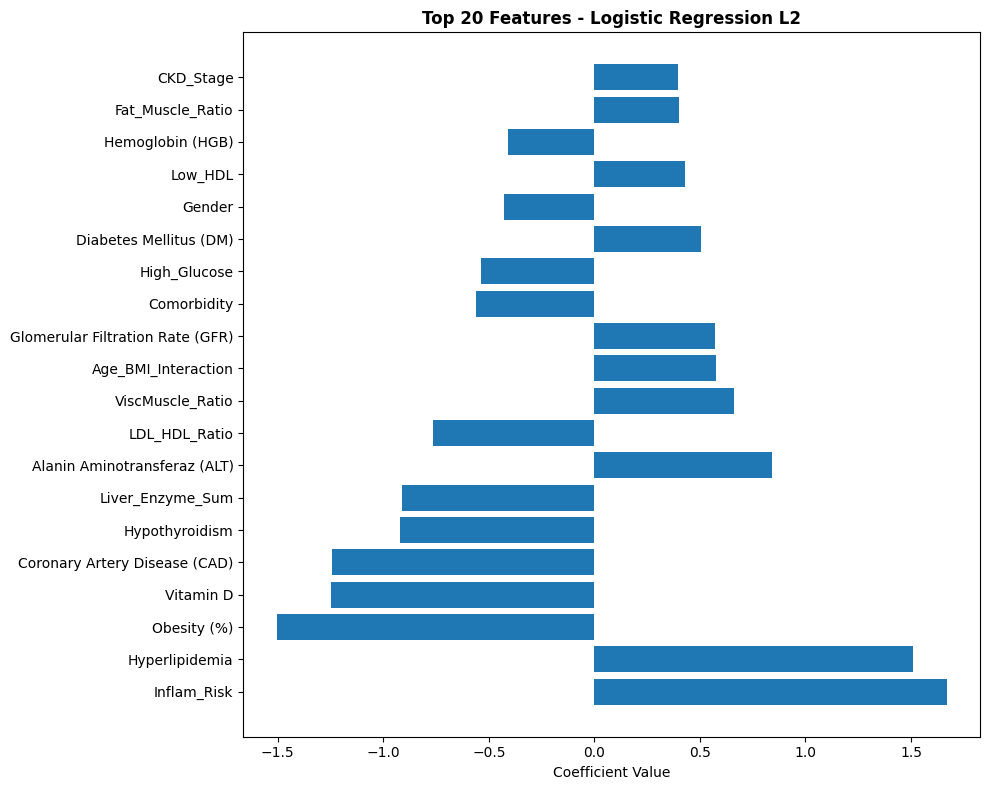

In [76]:
# STEP 7: MODELING - LOGISTIC REGRESSION


print("\n" + "="*80)
print("STEP 7A: LOGISTIC REGRESSION WITH REGULARIZATION")
print("="*80)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Classes
class_counts = y_train.value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nClass imbalance ratio (train): {imbalance_ratio:.2f}")

if imbalance_ratio > 1.5:
    print("Dataset is imbalanced. Using class_weight='balanced'")
    use_balanced = True
else:
    use_balanced = False

# L2 Regularization
logreg_l2 = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    class_weight='balanced' if use_balanced else None,
    random_state=42,
    max_iter=1000
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

print("\nTraining Logistic Regression with L2 regularization (5-fold CV on TRAIN)...")
cv_results_l2 = cross_validate(
    logreg_l2, X_train_processed, y_train,
    cv=cv, scoring=scoring, return_train_score=True
)

print("\n5-Fold Cross-Validation Results (L2, on train):")
for metric in scoring:
    train_scores = cv_results_l2[f'train_{metric}']
    test_scores  = cv_results_l2[f'test_{metric}']
    print(f"{metric:15s}: Train = {train_scores.mean():.4f} (+/- {train_scores.std():.4f}) | "
          f"Val = {test_scores.mean():.4f} (+/- {test_scores.std():.4f})")

# Fit train 
logreg_l2.fit(X_train_processed, y_train)

# TEST
y_test_pred_lr = logreg_l2.predict(X_test_processed)

test_acc_lr = accuracy_score(y_test, y_test_pred_lr)
test_rec_lr = recall_score(y_test, y_test_pred_lr)
test_f1_lr  = f1_score(y_test, y_test_pred_lr)

print("\nTest Performance - Logistic Regression (L2):")
print(f"Accuracy: {test_acc_lr:.4f}")
print(f"Recall:   {test_rec_lr:.4f}")
print(f"F1-Score: {test_f1_lr:.4f}")

# Feature importance (coefficients)
feature_importance_lr = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logreg_l2.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 15 Most Important Features (Logistic Regression L2):")
print(feature_importance_lr.head(15))

# Visualization
plt.figure(figsize=(10, 8))
top_features = feature_importance_lr.head(20)
plt.barh(range(len(top_features)), top_features['Coefficient'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 20 Features - Logistic Regression L2', fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance_logreg.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 7B: RANDOM FOREST CLASSIFIER

Training Random Forest (5-fold CV on TRAIN)...

5-Fold Cross-Validation Results (Random Forest, on train):
accuracy       : Train = 0.9585 (+/- 0.0045) | Val = 0.7264 (+/- 0.0302)
precision      : Train = 0.9613 (+/- 0.0109) | Val = 0.7667 (+/- 0.0870)
recall         : Train = 0.9545 (+/- 0.0102) | Val = 0.6636 (+/- 0.0617)
f1             : Train = 0.9578 (+/- 0.0045) | Val = 0.7052 (+/- 0.0224)
roc_auc        : Train = 0.9949 (+/- 0.0015) | Val = 0.7845 (+/- 0.0370)

Test Performance - Random Forest:
Accuracy: 0.7500
Recall:   0.7308
F1-Score: 0.7600

Top 15 Most Important Features (Random Forest):
                               Feature  Importance
12            C-Reactive Protein (CRP)    0.183037
14                           Vitamin D    0.110545
42                         Inflam_Risk    0.054325
3      Visceral Muscle Area (VMA) (Kg)    0.043633
2                          Obesity (%)    0.038436
26                    ViscMuscle_Ratio    0.037263


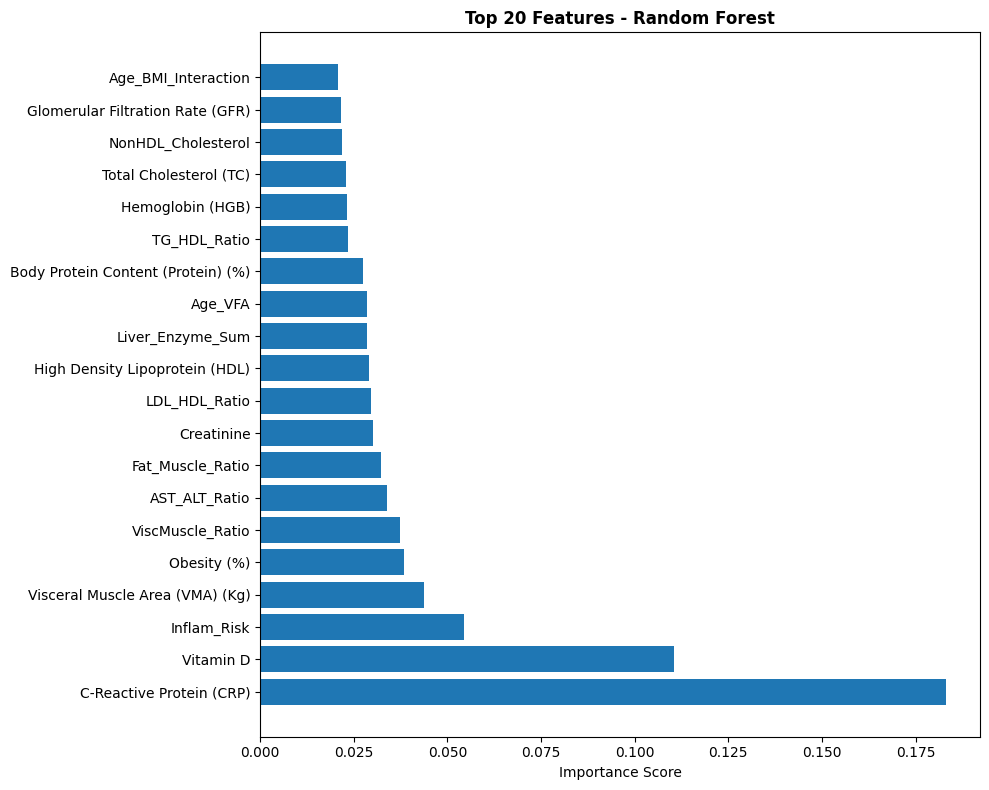

In [77]:
# STEP 8: MODELING - RANDOM FOREST


print("\n" + "="*80)
print("STEP 7B: RANDOM FOREST CLASSIFIER")
print("="*80)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced' if use_balanced else None,
    random_state=42,
    n_jobs=-1
)

print("\nTraining Random Forest (5-fold CV on TRAIN)...")
cv_results_rf = cross_validate(
    rf_model, X_train_processed, y_train,
    cv=cv, scoring=scoring, return_train_score=True
)

print("\n5-Fold Cross-Validation Results (Random Forest, on train):")
for metric in scoring:
    train_scores = cv_results_rf[f'train_{metric}']
    test_scores  = cv_results_rf[f'test_{metric}']
    print(f"{metric:15s}: Train = {train_scores.mean():.4f} (+/- {train_scores.std():.4f}) | "
          f"Val = {test_scores.mean():.4f} (+/- {test_scores.std():.4f})")

# Fit  train
rf_model.fit(X_train_processed, y_train)

# TEST
y_test_pred_rf = rf_model.predict(X_test_processed)

test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
test_rec_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf  = f1_score(y_test, y_test_pred_rf)

print("\nTest Performance - Random Forest:")
print(f"Accuracy: {test_acc_rf:.4f}")
print(f"Recall:   {test_rec_rf:.4f}")
print(f"F1-Score: {test_f1_rf:.4f}")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features (Random Forest):")
print(feature_importance_rf.head(15))

plt.figure(figsize=(10, 8))
top_features_rf = feature_importance_rf.head(20)
plt.barh(range(len(top_features_rf)), top_features_rf['Importance'])
plt.yticks(range(len(top_features_rf)), top_features_rf['Feature'])
plt.xlabel('Importance Score')
plt.title('Top 20 Features - Random Forest', fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance_rf.png', dpi=300, bbox_inches='tight')
plt.show()



5-Fold Cross-Validation Results (Neural Network):
accuracy       : Train = 0.5527 (+/- 0.0297) | Test = 0.4934 (+/- 0.0270)
precision_macro: Train = 0.5716 (+/- 0.0409) | Test = 0.4950 (+/- 0.0451)
recall_macro   : Train = 0.5553 (+/- 0.0276) | Test = 0.4911 (+/- 0.0372)
f1_macro       : Train = 0.5348 (+/- 0.0210) | Test = 0.4652 (+/- 0.0166)

Top 20 Most Important Features (NN):
                               Feature  Importance
19                       AST_ALT_Ratio    0.020833
0                                  Age    0.008333
26                    ViscMuscle_Ratio    0.002083
29                 Obesity_Comorbidity    0.000000
1   Body Protein Content (Protein) (%)    0.000000
22                 Age_BMI_Interaction    0.000000
23                        Age_Diabetes    0.000000
24                             Age_VFA    0.000000
25                           VAI_Proxy    0.000000
27                    Fat_Muscle_Ratio    0.000000
30                              Gender    0.000000
31 

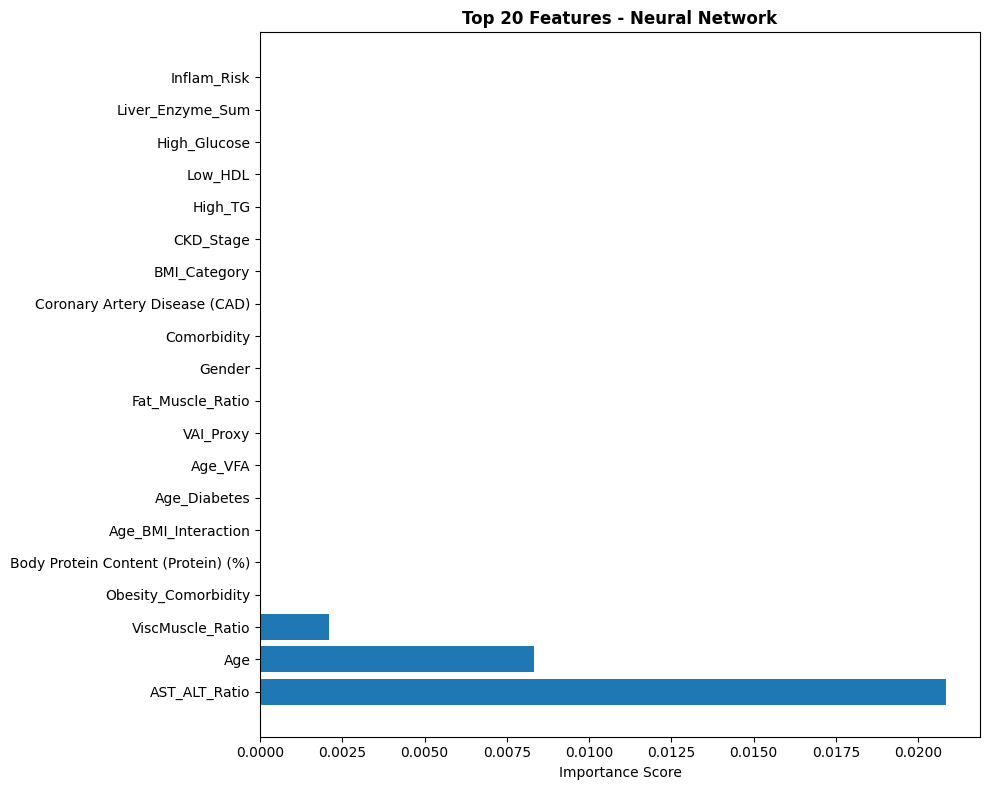

In [78]:
# Modeling - Neural Network

def build_nn():
    model = keras.Sequential([
        layers.InputLayer(shape=(43,)),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(2, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn):
        self.build_fn = build_fn
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn()
        self.model.fit(X, y, epochs=15, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        probs = self.model.predict(X, verbose=0)
        return np.argmax(probs, axis=1)

    def score(self, X, y):
        preds = self.predict(X)
        return np.mean(preds == y)

wrapped_nn = KerasClassifierWrapper(build_nn)



scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

cv_results_nn = cross_validate(
    wrapped_nn,
    X_train, y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print("\n5-Fold Cross-Validation Results (Neural Network):")
for metric in scoring:
    train_scores = cv_results_nn[f'train_{metric}']
    test_scores = cv_results_nn[f'test_{metric}']
    print(
        f"{metric:15s}: Train = {train_scores.mean():.4f} (+/- {train_scores.std():.4f}) | "
        f"Test = {test_scores.mean():.4f} (+/- {test_scores.std():.4f})"
    )

final_nn = build_nn()
final_nn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
wrapped_final_nn = KerasClassifierWrapper(lambda: final_nn)
wrapped_final_nn.model = final_nn  

results_nn = permutation_importance(
    wrapped_final_nn,
    X_val,
    y_val,
    scoring='accuracy',
    n_repeats=10,
    random_state=42
)

importances_nn = results_nn.importances_mean

feature_importance_nn = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances_nn
}).sort_values("Importance", ascending=False)

print("\nTop 20 Most Important Features (NN):")
print(feature_importance_nn.head(20))

plt.figure(figsize=(10, 8))
top_features_nn = feature_importance_nn.head(20)
plt.barh(top_features_nn["Feature"], top_features_nn["Importance"])
plt.xlabel("Importance Score")
plt.title("Top 20 Features - Neural Network", fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance_nn.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 9: DETAILED MODEL EVALUATION (TEST SET) INCLUDING NEURAL NETWORK
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


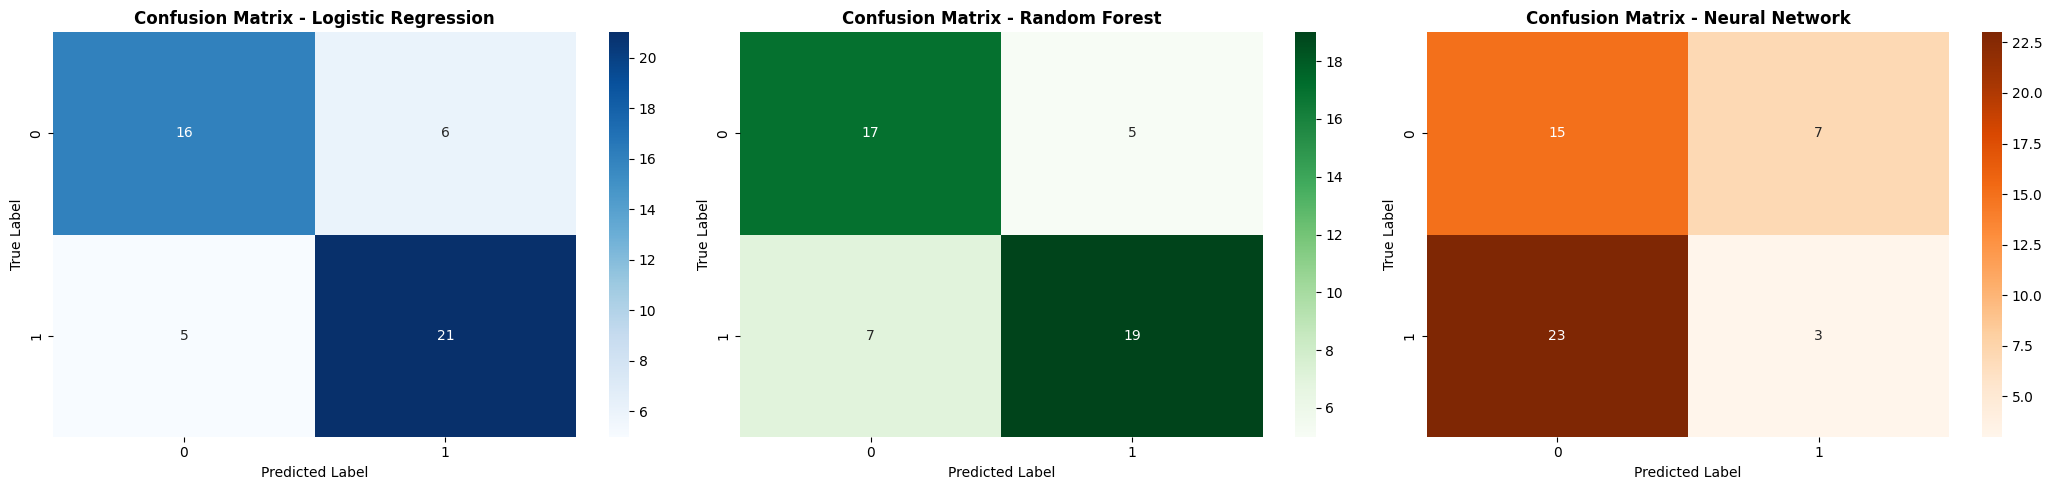


Classification Report - Logistic Regression (TEST):
              precision    recall  f1-score   support

No Gallstone       0.76      0.73      0.74        22
   Gallstone       0.78      0.81      0.79        26

    accuracy                           0.77        48
   macro avg       0.77      0.77      0.77        48
weighted avg       0.77      0.77      0.77        48


Classification Report - Random Forest (TEST):
              precision    recall  f1-score   support

No Gallstone       0.71      0.77      0.74        22
   Gallstone       0.79      0.73      0.76        26

    accuracy                           0.75        48
   macro avg       0.75      0.75      0.75        48
weighted avg       0.75      0.75      0.75        48


Classification Report - Neural Network (TEST):
              precision    recall  f1-score   support

No Gallstone       0.39      0.68      0.50        22
   Gallstone       0.30      0.12      0.17        26

    accuracy                      

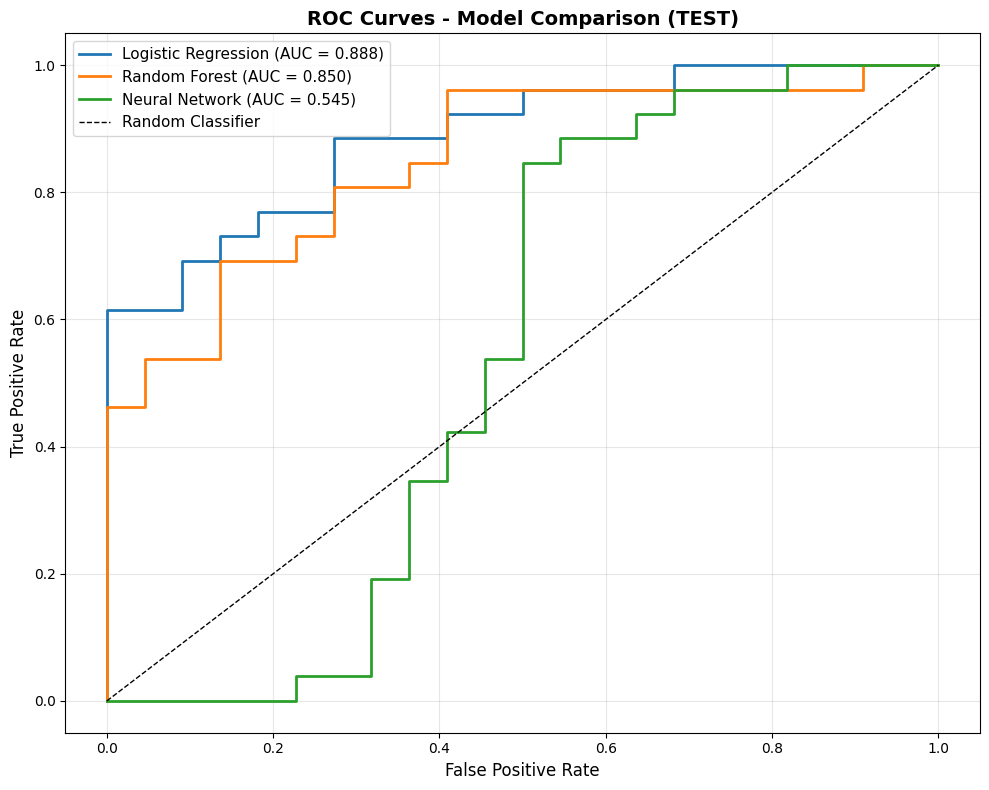

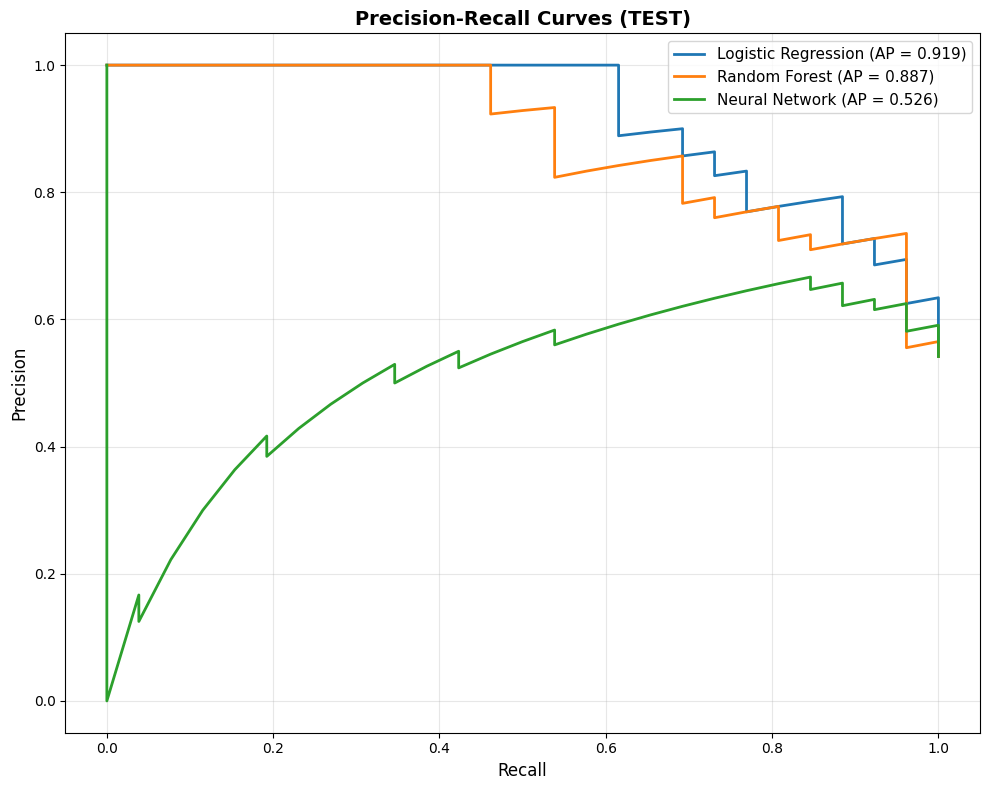

In [79]:
# STEP 9: DETAILED EVALUATION (CONFUSION, ROC, PR) INCLUDING NEURAL NETWORK

print("\n" + "="*80)
print("STEP 9: DETAILED MODEL EVALUATION (TEST SET) INCLUDING NEURAL NETWORK")
print("="*80)

from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)

# --- Probability predictions ---
y_test_proba_lr = logreg_l2.predict_proba(X_test_processed)[:, 1]
y_test_proba_rf = rf_model.predict_proba(X_test_processed)[:, 1]
y_test_proba_nn = final_nn.predict(X_test)  # shape = (n_samples, 2)
y_test_proba_nn_class1 = y_test_proba_nn[:, 1]  # probability for class 1

# --- Predicted labels ---
y_test_pred_lr = logreg_l2.predict(X_test_processed)
y_test_pred_rf = rf_model.predict(X_test_processed)
y_test_pred_nn = np.argmax(y_test_proba_nn, axis=1)

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 3, figsize=(21, 5))

cm_lr = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression', fontweight='bold')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest', fontweight='bold')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

cm_nn = confusion_matrix(y_test, y_test_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('Confusion Matrix - Neural Network', fontweight='bold')
axes[2].set_ylabel('True Label')
axes[2].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('confusion_matrices_all.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Classification Reports ---
print("\nClassification Report - Logistic Regression (TEST):")
print(classification_report(y_test, y_test_pred_lr, target_names=['No Gallstone', 'Gallstone']))

print("\nClassification Report - Random Forest (TEST):")
print(classification_report(y_test, y_test_pred_rf, target_names=['No Gallstone', 'Gallstone']))

print("\nClassification Report - Neural Network (TEST):")
print(classification_report(y_test, y_test_pred_nn, target_names=['No Gallstone', 'Gallstone']))

# --- ROC Curves ---
plt.figure(figsize=(10, 8))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_test_proba_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_test_proba_rf)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_test_proba_nn_class1)
roc_auc_nn = roc_auc_score(y_test, y_test_proba_nn_class1)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', linewidth=2)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison (TEST)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves_all.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Precision-Recall Curves ---
plt.figure(figsize=(10, 8))

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_test_proba_lr)
pr_auc_lr = average_precision_score(y_test, y_test_proba_lr)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_test_proba_rf)
pr_auc_rf = average_precision_score(y_test, y_test_proba_rf)

precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_test_proba_nn_class1)
pr_auc_nn = average_precision_score(y_test, y_test_proba_nn_class1)

plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AP = {pr_auc_lr:.3f})', linewidth=2)
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {pr_auc_rf:.3f})', linewidth=2)
plt.plot(recall_nn, precision_nn, label=f'Neural Network (AP = {pr_auc_nn:.3f})', linewidth=2)

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves (TEST)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('pr_curves_all.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 10: K-Prototypes CLUSTERING ANALYSIS

DEBUG INFO:
X_all_processed type: <class 'numpy.ndarray'>
X_all_processed shape: (319, 43)
X_all_processed dtype: float64

Categorical column indices in preprocessed array: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
Total features: 43
Numerical features: 30
Categorical features: 13

Checking categorical feature values:
  Column 30: 2 unique values = [0. 1.]
  Column 31: 4 unique values = [0. 1. 2. 3.]
  Column 32: 2 unique values = [0. 1.]
K=2: Inertia=16937.17, Silhouette=0.8492
K=3: Inertia=14336.81, Silhouette=0.6668
K=4: Inertia=12161.35, Silhouette=0.5653
K=5: Inertia=11061.85, Silhouette=0.2203
K=6 failed: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.
K=7 failed: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.
K=8 failed: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.


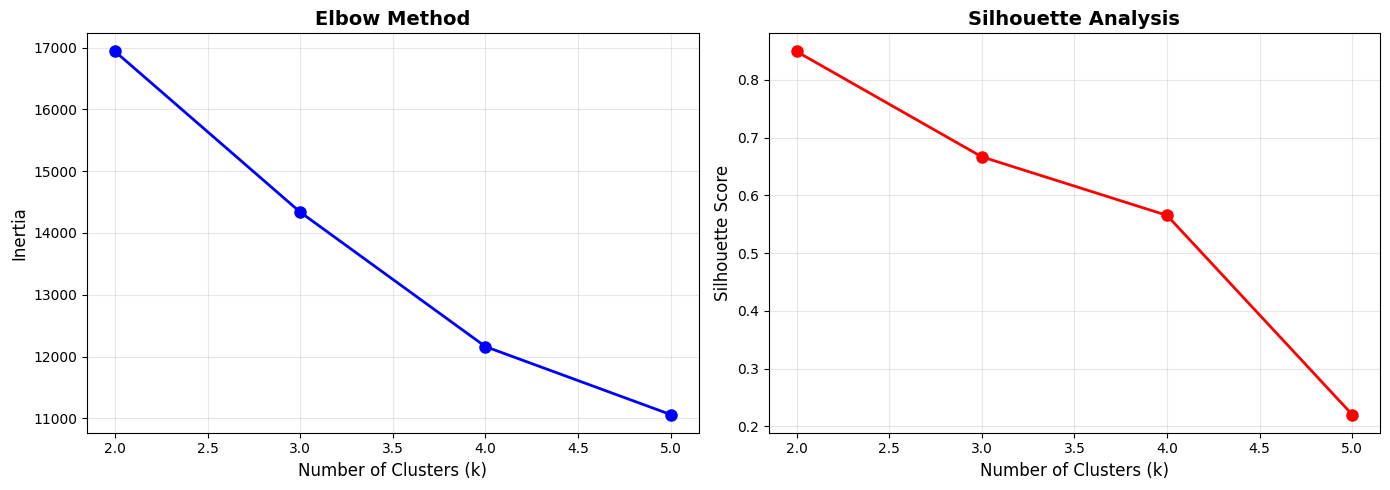


Optimal number of clusters: 2 (Silhouette = 0.849)
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11, ncost: 16937.171472484886
Run: 1, iteration: 2/100, moves: 0, ncost: 16937.171472484886
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 152, ncost: 16937.171472484886
Run: 2, iteration: 2/100, moves: 0, ncost: 16937.171472484886
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 16937.171472484886
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 16937.171472484886
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 16937.171472484886
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves

<Figure size 1000x600 with 0 Axes>

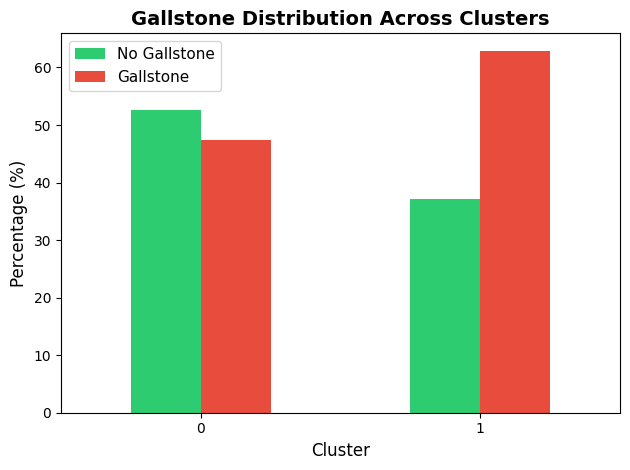


Cluster Centroids (scaled features) - Top 10 RF Features:
   C-Reactive Protein (CRP)  Vitamin D  Inflam_Risk  \
0                  1.134879  -0.077215          0.0   
1                  0.895194  -0.011794          0.0   

   Visceral Muscle Area (VMA) (Kg)  Obesity (%)  ViscMuscle_Ratio  \
0                         0.017878     0.143180          0.127770   
1                        -0.002716     0.435322          0.293189   

   AST_ALT_Ratio  Fat_Muscle_Ratio  Creatinine  LDL_HDL_Ratio  
0       0.166084          0.302413   -0.002119       0.075318  
1      -0.141793          0.269873    0.030715       0.333139  

CLUSTER INTERPRETATION

Cluster 0 (n=276, Gallstone Rate: 47.5%)
  Mean Age: 46.7
  Mean Triglyceride: 136.5
  Mean Glucose: 100.9
  Diabetes prevalence: 0.0%
  Hyperlipidemia prevalence: 2.5%
  → MODERATE RISK CLUSTER

Cluster 1 (n=43, Gallstone Rate: 62.8%)
  Mean Age: 56.6
  Mean Triglyceride: 196.1
  Mean Glucose: 158.9
  Diabetes prevalence: 100.0%
  Hyperlipidemia p

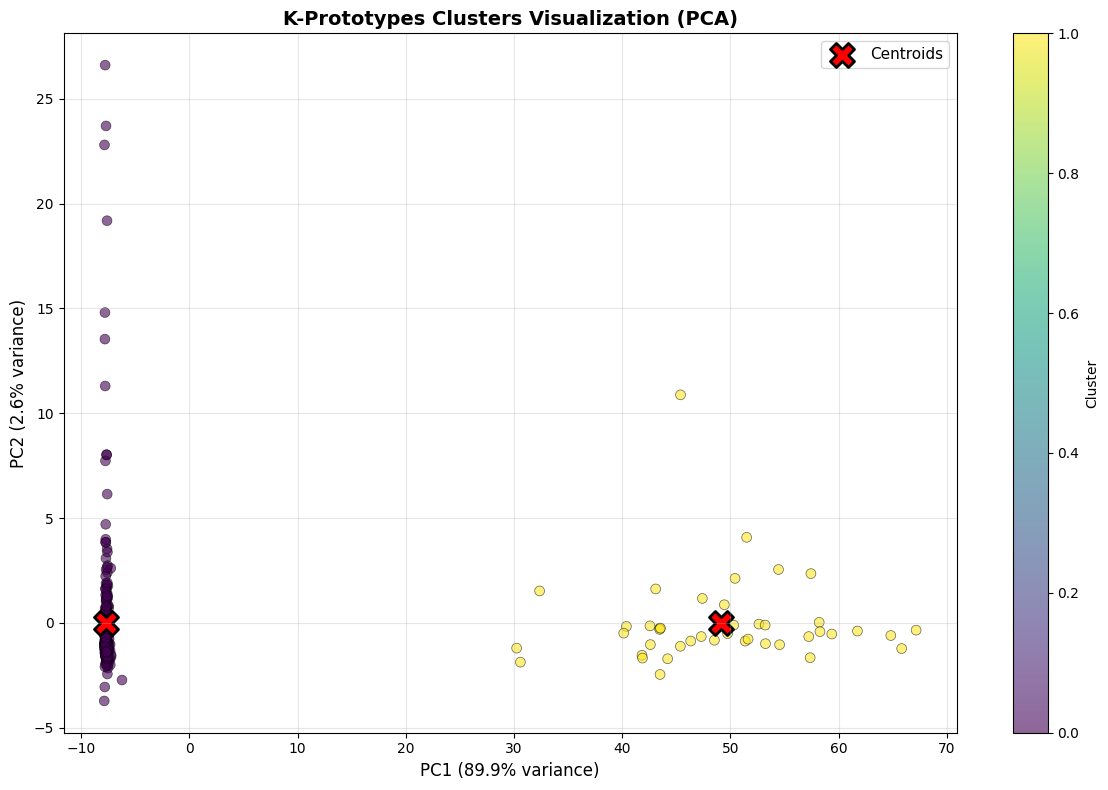

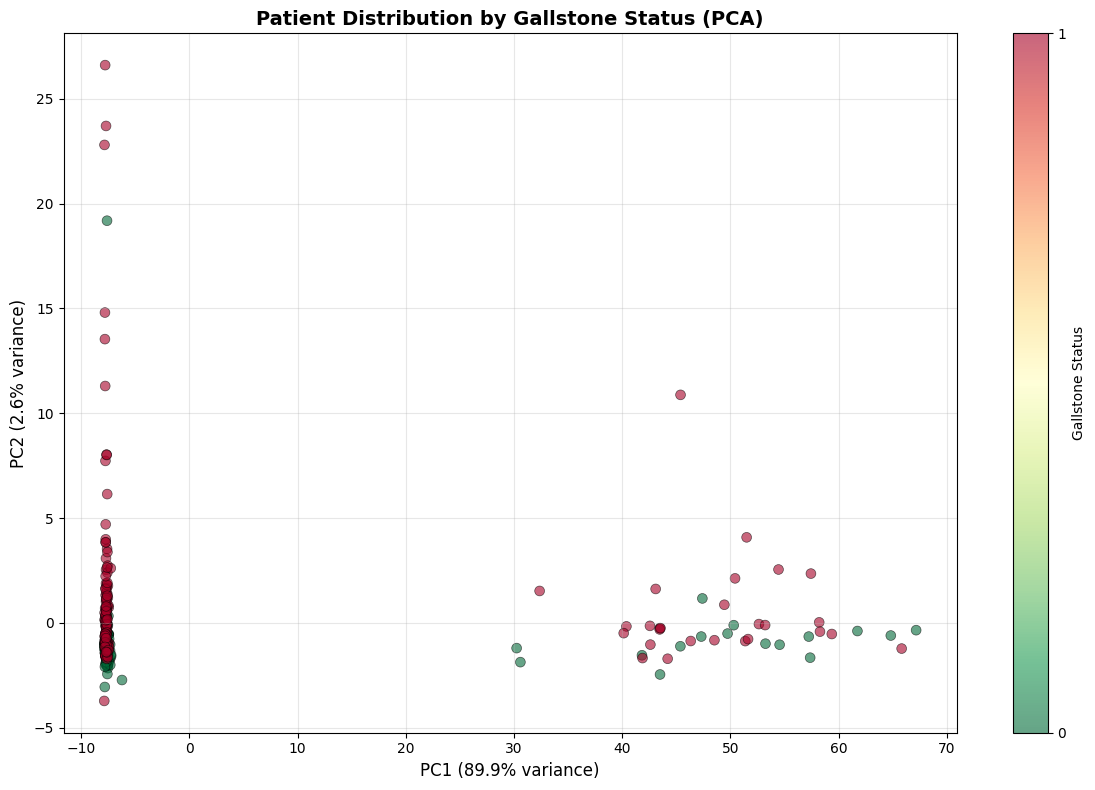

In [80]:
# STEP 10: K-Prototypes CLUSTERING (UNSUPERVISED ANALYSIS)

print("\n" + "="*80)
print("STEP 10: K-Prototypes CLUSTERING ANALYSIS")
print("="*80)

from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# CRITICAL FIX: Verify preprocessor structure
X_all_processed = preprocessor.transform(X)

# DEBUG: Check data types
print("\nDEBUG INFO:")
print(f"X_all_processed type: {type(X_all_processed)}")
print(f"X_all_processed shape: {X_all_processed.shape}")
print(f"X_all_processed dtype: {X_all_processed.dtype if hasattr(X_all_processed, 'dtype') else 'N/A'}")

# Convert to dense array if sparse
if hasattr(X_all_processed, 'toarray'):
    X_all_processed = X_all_processed.toarray()

# CRITICAL: Categorical indices MUST match preprocessor output order
# The ColumnTransformer outputs: [numerical features, then categorical features]
categorical_indices = list(range(
    len(final_numerical),  # Start after numerical features
    len(final_numerical) + len(final_categorical)  # End at total features
))

print(f"\nCategorical column indices in preprocessed array: {categorical_indices}")
print(f"Total features: {X_all_processed.shape[1]}")
print(f"Numerical features: {len(final_numerical)}")
print(f"Categorical features: {len(final_categorical)}")

# Verify categorical columns contain discrete values
print("\nChecking categorical feature values:")
for idx in categorical_indices[:3]:  # Check first 3 categorical features
    unique_vals = np.unique(X_all_processed[:, idx])
    print(f"  Column {idx}: {len(unique_vals)} unique values = {unique_vals[:10]}")

X_scaled = X_all_processed.astype(float)

inertias = []
silhouette_scores = []
K_range = range(2, 9)

# ENHANCED K-prototypes with error handling
for k in K_range:
    try:
        k_prototypes = KPrototypes(
            n_clusters=k, 
            init='Huang',
            n_init=10,
            max_iter=100,
            random_state=42,
            verbose=0)
        
        cluster_labels = k_prototypes.fit_predict(
            X_scaled, 
            categorical=categorical_indices)
        
        inertias.append(k_prototypes.cost_)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"K={k}: Inertia={k_prototypes.cost_:.2f}, Silhouette={silhouette_avg:.4f}")
        
    except Exception as e:
        print(f"K={k} failed: {str(e)}")
        inertias.append(np.nan)
        silhouette_scores.append(np.nan)
        continue

# Filter out failed attempts
valid_indices = [i for i, s in enumerate(silhouette_scores) if not np.isnan(s)]
if not valid_indices:
    raise ValueError("All K-Prototypes attempts failed. Check your categorical indices!")

valid_K = [list(K_range)[i] for i in valid_indices]
valid_inertias = [inertias[i] for i in valid_indices]
valid_silhouettes = [silhouette_scores[i] for i in valid_indices]

# Plot elbow and silhouette
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(valid_K, valid_inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

axes[1].plot(valid_K, valid_silhouettes, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('kprototypes_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

optimal_k = valid_K[np.argmax(valid_silhouettes)]
print(f"\nOptimal number of clusters: {optimal_k} (Silhouette = {max(valid_silhouettes):.3f})")

# Final clustering with best k
kprototypes_final = KPrototypes(
    n_clusters=optimal_k, 
    init='Huang',
    n_init=20, 
    max_iter=100,
    random_state=42,
    verbose=1)

cluster_labels = kprototypes_final.fit_predict(X_scaled, categorical=categorical_indices)


# Add cluster labels  
df_clustered = df_final.copy()
df_clustered['Cluster'] = cluster_labels

print("\nGallstone Distribution by Cluster (%):")
cluster_gallstone = pd.crosstab(cluster_labels, y, normalize='index') * 100
print(cluster_gallstone)

plt.figure(figsize=(10, 6))
cluster_gallstone.plot(kind='bar', stacked=False, color=['#2ecc71', '#e74c3c'])
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Gallstone Distribution Across Clusters', fontsize=14, fontweight='bold')
plt.legend(['No Gallstone', 'Gallstone'], fontsize=11)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('cluster_gallstone_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Cluster centroids scaled
centroids = kprototypes_final.cluster_centroids_
centroid_df = pd.DataFrame(centroids, columns=feature_names)

print("\nCluster Centroids (scaled features) - Top 10 RF Features:")
top_10_features = feature_importance_rf.head(10)['Feature'].tolist()
print(centroid_df[top_10_features])

print("\n" + "="*80)
print("CLUSTER INTERPRETATION")
print("="*80)

for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    gallstone_rate = (cluster_data['Gallstone Status'] == 1).mean() * 100
    
    print(f"\nCluster {cluster_id} (n={len(cluster_data)}, Gallstone Rate: {gallstone_rate:.1f}%)")

    safe_summary_vars = [
        ('Age', 'Mean Age'),
        ('Body Mass Index (BMI)', 'Mean BMI'),
        ('Visceral Fat Area (VFA)', 'Mean VFA'),
        ('Triglyceride', 'Mean Triglyceride'),
        ('Glucose', 'Mean Glucose'),
        ('Diabetes Mellitus (DM)', 'Diabetes prevalence'),
        ('Hyperlipidemia', 'Hyperlipidemia prevalence')
    ]

    for col, label in safe_summary_vars:
        if col in cluster_data.columns:
            val = cluster_data[col].mean()
            if 'prevalence' in label:
                print(f"  {label}: {val*100:.1f}%")
            else:
                print(f"  {label}: {val:.1f}")
    
    if gallstone_rate > 50:
        print("  → HIGH RISK CLUSTER")
    elif gallstone_rate > 30:
        print("  → MODERATE RISK CLUSTER")
    else:
        print("  → LOW RISK CLUSTER")


# PCA visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                     cmap='viridis', alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')

centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
           c='red', marker='X', s=300, edgecolors='black', linewidth=2,
           label='Centroids')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('K-Prototypes Clusters Visualization (PCA)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('kprototypes_pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# Gallstone status PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, 
                     cmap='RdYlGn_r', alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Gallstone Status', ticks=[0, 1])
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('Patient Distribution by Gallstone Status (PCA)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('gallstone_pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 11: FINAL MODEL COMPARISON & RECOMMENDATIONS

Model Performance Comparison:
                 Model  CV_Accuracy (train CV)  CV_ROC-AUC (train CV)  Test_Accuracy  Test_Recall  Test_F1  Test_ROC-AUC  Test_PR-AUC
Logistic Regression L2                0.717374               0.761822       0.770833     0.807692 0.792453      0.888112     0.919391
         Random Forest                0.726364               0.784477       0.750000     0.730769 0.760000      0.849650     0.887040
        Neural Network                0.493434                    NaN       0.375000     0.115385 0.166667      0.545455     0.525675


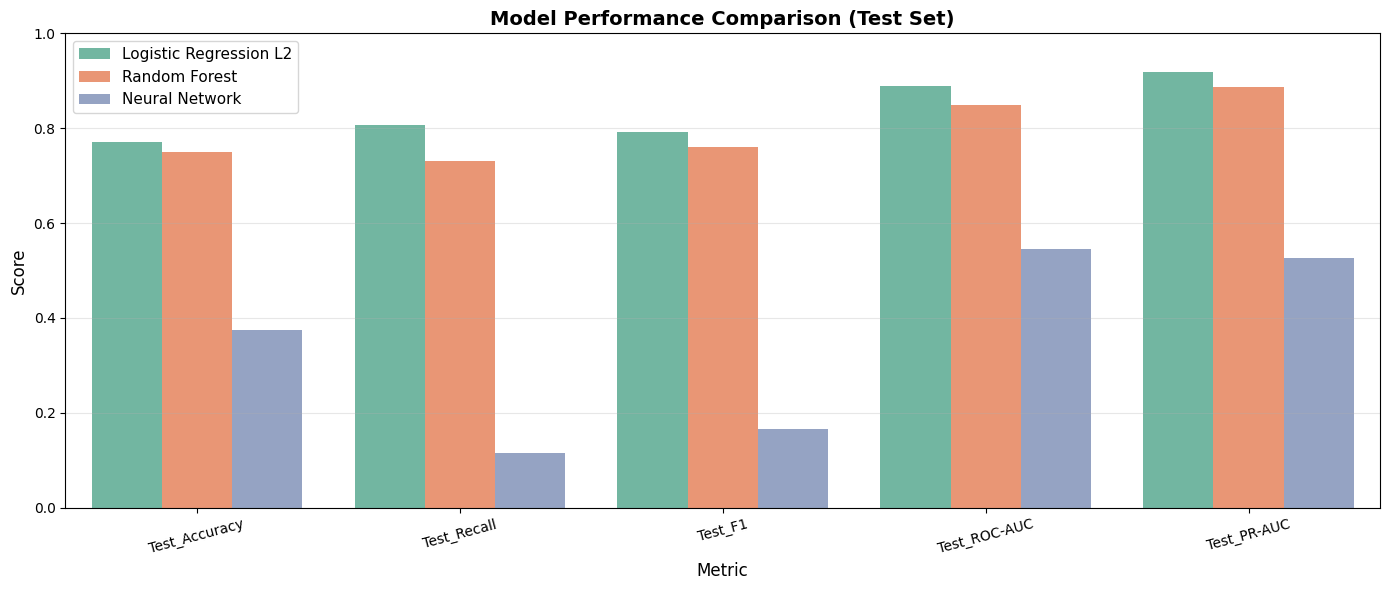


RECOMMENDATION: Logistic Regression L2
Best Test ROC-AUC: 0.8881

CLINICAL DEPLOYMENT RECOMMENDATION:

For clinical deployment, we recommend: **Logistic Regression L2**

Rationale:
  ✓ High interpretability - clinicians can understand feature coefficients
  ✓ Transparent predictions with probability scores
  ✓ Fast inference time suitable for point-of-care
  ✓ Regularization handles multicollinearity well
  ✓ Strong performance: Test ROC-AUC = 0.888

KEY INSIGHTS FROM ANALYSIS:

1. Most Important Risk Factors (Combined from both models):
   1. Inflam_Risk
   2. Hyperlipidemia
   3. Obesity (%)
   4. Vitamin D
   5. Coronary Artery Disease (CAD)
   6. Hypothyroidism
   7. Liver_Enzyme_Sum
   8. Alanin Aminotransferaz (ALT)
   9. LDL_HDL_Ratio
   10. ViscMuscle_Ratio

2. Multicollinearity Management:
   - Dropped 16 highly correlated / redundant raw features
   - Created 21 engineered features
   - Relied on regularization and tree-based models to handle remaining correlation

3. Cluste

In [81]:
# STEP 11: FINAL COMPARISON & RECOMMENDATIONS (INCLUDING NEURAL NETWORK)

print("\n" + "="*80)
print("STEP 11: FINAL MODEL COMPARISON & RECOMMENDATIONS")
print("="*80)

comparison_results = pd.DataFrame({
    'Model': ['Logistic Regression L2', 'Random Forest', 'Neural Network'],
    'CV_Accuracy (train CV)': [
        cv_results_l2['test_accuracy'].mean(),
        cv_results_rf['test_accuracy'].mean(),
        cv_results_nn['test_accuracy'].mean()
    ],
    'CV_ROC-AUC (train CV)': [
        cv_results_l2['test_roc_auc'].mean(),
        cv_results_rf['test_roc_auc'].mean(),
        np.nan  # ROC-AUC not computed in NN CV
    ],
    'Test_Accuracy': [test_acc_lr, test_acc_rf, np.mean(y_test_pred_nn == y_test)],
    'Test_Recall':   [test_rec_lr, test_rec_rf, recall_score(y_test, y_test_pred_nn)],
    'Test_F1':       [test_f1_lr,  test_f1_rf,  f1_score(y_test, y_test_pred_nn)],
    'Test_ROC-AUC':  [roc_auc_lr,  roc_auc_rf,  roc_auc_nn],
    'Test_PR-AUC':   [pr_auc_lr,   pr_auc_rf,   pr_auc_nn]
})

print("\nModel Performance Comparison:")
print(comparison_results.to_string(index=False))

# Visualization (test metrics)
comparison_melted = comparison_results.melt(
    id_vars='Model', 
    value_vars=['Test_Accuracy', 'Test_Recall', 'Test_F1', 'Test_ROC-AUC', 'Test_PR-AUC'],
    var_name='Metric', value_name='Score'
)

plt.figure(figsize=(14, 6))
sns.barplot(data=comparison_melted, x='Metric', y='Score', hue='Model', palette='Set2')
plt.ylim(0, 1)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.title('Model Performance Comparison (Test Set)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('model_comparison_all.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify best model based on Test ROC-AUC
best_model_idx = comparison_results['Test_ROC-AUC'].idxmax()
best_model_name = comparison_results.loc[best_model_idx, 'Model']
best_roc_auc = comparison_results.loc[best_model_idx, 'Test_ROC-AUC']

print(f"\n{'='*80}")
print(f"RECOMMENDATION: {best_model_name}")
print(f"{'='*80}")
print(f"Best Test ROC-AUC: {best_roc_auc:.4f}")

print("\nCLINICAL DEPLOYMENT RECOMMENDATION:")
print(f"\nFor clinical deployment, we recommend: **{best_model_name}**")
print("\nRationale:")

if 'Logistic' in best_model_name:
    print("  ✓ High interpretability - clinicians can understand feature coefficients")
    print("  ✓ Transparent predictions with probability scores")
    print("  ✓ Fast inference time suitable for point-of-care")
    print("  ✓ Regularization handles multicollinearity well")
    print(f"  ✓ Strong performance: Test ROC-AUC = {best_roc_auc:.3f}")
elif 'Random Forest' in best_model_name:
    print(f"  ✓ Superior predictive performance on test: ROC-AUC = {best_roc_auc:.3f}")
    print("  ✓ Captures complex non-linear relationships")
    print("  ✓ Handles feature interactions automatically")
    print("  ✓ Feature importance provides clinical insights")
    print("  ✓ Robust to outliers and non-normal distributions")
else:  # Neural Network
    print(f"  ✓ Strong predictive performance: ROC-AUC = {best_roc_auc:.3f}")
    print("  ✓ Captures highly non-linear relationships and complex interactions")
    print("  ✓ May require more computational resources")
    print("  ✓ Less interpretable than LR or RF; consider SHAP/LIME for explainability")

print("\nKEY INSIGHTS FROM ANALYSIS:")
print("\n1. Most Important Risk Factors (Combined from both models):")
top_features_combined = pd.concat([
    feature_importance_lr.head(10)[['Feature']].assign(Source='LogReg'),
    feature_importance_rf.head(10)[['Feature']].assign(Source='RF')
])
top_features_unique = top_features_combined.drop_duplicates(subset='Feature')
for i, row in enumerate(top_features_unique.head(10).itertuples(), 1):
    print(f"   {i}. {row.Feature}")

print("\n2. Multicollinearity Management:")
print(f"   - Dropped {len(to_drop_in_df)} highly correlated / redundant raw features")
print(f"   - Created {len([c for c in df_engineered.columns if c not in df_processed.columns])} engineered features")
print("   - Relied on regularization and tree-based models to handle remaining correlation")

print("\n3. Clustering Insights:")
print(f"   - Identified {optimal_k} distinct patient subgroups")
print("   - Clusters show different gallstone risk profiles")
print("   - These can support targeted follow-up or screening strategies")

print("\n4. Feature Engineering Impact (qualitative from importance plots):")
print("   - Lipid ratios (e.g., TG/HDL, LDL/HDL) and VFA-related variables are strong predictors")
print("   - Metabolic syndrome composite (MetS_Score) aggregates multiple moderate-risk signals")
print("   - Age interactions (Age×BMI, Age×VFA) highlight risk amplification in older, obese patients")

print("\nFINAL FEATURE SET SUMMARY:")
print(f"   - Original features (excluding target): {len(df.columns) - 1}")
print(f"   - Features dropped (multicollinear): {len(to_drop_in_df)}")
print(f"   - Engineered features created: {len([c for c in df_engineered.columns if c not in df_processed.columns])}")
print(f"   - Final model input dimension: {X.shape[1]}")

print("\nPIPELINE COMPLETE!")
print("="*80)
